## **DISTRIBUCIÓN DE CATEGORÍAS**
---

##### El objetivo de este análisis es poder **visualizar** la **distribución** de las **distintas** **categorías** en ambos datasets y poder **unificarlas en una tabla maestra**, permitiendo realizar análisis conjuntos y construir un esquema relacional que incluya categorías comunes.

##### Para poder lograr este objetivo primeramente se realizará una pequeña **normalización en los datos.**

- ##### **Dataset Yelp:**

    - ``business_id:`` Identificador único de un negocio en Yelp.

    - ``lista_categorias:`` Lista de categorías asignadas a cada negocio. Cada business_id puede tener múltiples categorías.

- ##### **Dataset Google:**

    - ``gmap_id:`` Identificador único de un sitio en Google Maps.

    - ``category:`` Categoría asignada a un sitio en Google. Cada sitio tiene una sola categoría por fila, aunque un gmap_id puede repetirse si tiene múltiples categorías.





In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download("stopwords")
nltk.download("punkt")

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marce\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marce\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### **CARGA DE DATOS - Normalización**

In [96]:
categorias_yelp = pd.read_parquet('C:\DYNAMO\PFinal\Proyecto_final\Datos\yelp\categories_business_yelp_todavia_nombres.parquet')
categorias_yelp

business_id               lista_categorias
0       Pns2l4eNsfO8kk83dixA6A                        Doctors
0       Pns2l4eNsfO8kk83dixA6A   Traditional Chinese Medicine
0       Pns2l4eNsfO8kk83dixA6A          Naturopathic/Holistic
0       Pns2l4eNsfO8kk83dixA6A                    Acupuncture
0       Pns2l4eNsfO8kk83dixA6A               Health & Medical
...                        ...                            ...
150344  mtGm22y5c2UHNXDFAjaPNw                          Bikes
150345  jV_XOycEzSlTx-65W906pg                  Beauty & Spas
150345  jV_XOycEzSlTx-65W906pg               Permanent Makeup
150345  jV_XOycEzSlTx-65W906pg                       Piercing
150345  jV_XOycEzSlTx-65W906pg                         Tattoo

[668695 rows x 2 columns]

In [3]:
categorias_google = pd.read_parquet('C:\DYNAMO\PFinal\Proyecto_final\Datos\google\categories_sitios_google_todavia_nombres.parquet')
categorias_google

gmap_id            category
0        0x88f16e41928ff687:0x883dad4fd048e8f8            Pharmacy
1        0x80c2c98c0e3c16fd:0x29ec8a728764fdf9    Textile exporter
2        0x80c2c778e3b73d33:0xbdc58662a4a97d49   Korean restaurant
3         0x80c2c89923b27a41:0x32041559418d447        Fabric store
4        0x80c2c632f933b073:0xc31785961fe826a6        Fabric store
...                                        ...                 ...
3025006  0x89c6c74f43a49b55:0x6be6995921c58b12  Seafood restaurant
3025007  0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc    Chevrolet dealer
3025008  0x89da6b9ce832726f:0xbd0d3630f1e3b42e        Veterinarian
3025009  0x88d9e872a9e39f3d:0x5de29f50507e5d73   Animal feed store
3025010  0x54956b3944b1654d:0x7797cead9a485c22             Lodging

[6228507 rows x 2 columns]

#### **ELIMINACIÓN DE NULLS Y DUPLICADOS**

In [97]:
# Verificar duplicados
duplicados_yelp = categorias_yelp.duplicated().sum()
duplicados_google = categorias_google.duplicated().sum()

# Verificar valores nulos
valores_nulos_yelp = categorias_yelp.isnull().sum()
valores_nulos_google = categorias_google.isnull().sum()

# Resultados
print(f'Duplicados en Yelp: {duplicados_yelp}\n')
print(f'Duplicados en Google: {duplicados_google}\n')

print('Valores nulos en Yelp:')
print(valores_nulos_yelp, '\n')

print('Valores nulos en Google:')
print(valores_nulos_google, '\n')

Duplicados en Yelp: 33

Duplicados en Google: 0

Valores nulos en Yelp:
business_id         0
lista_categorias    0
dtype: int64 

Valores nulos en Google:
gmap_id        0
category       0
category_id    0
dtype: int64 



In [98]:
# Filtrar las filas con categorías vacías
filas_vacias_yelp = categorias_yelp[categorias_yelp['lista_categorias'] == '']

# Contar cuántas filas están vacías
conteo_vacio = filas_vacias_yelp.shape[0]

print(f"Cantidad de filas con categorías vacías: {conteo_vacio}")


Cantidad de filas con categorías vacías: 103


In [100]:
# Filtrar las filas con categorías vacías
filas_vacias_google = categorias_google[categorias_google['category'] == '']

# Contar cuántas filas están vacías
conteo_vacio_g = filas_vacias_google.shape[0]

print(f"Cantidad de filas con categorías vacías: {conteo_vacio_g}")


Cantidad de filas con categorías vacías: 0


In [101]:
# Eliminar filas con categorías vacías
categorias_yelp = categorias_yelp[categorias_yelp['lista_categorias'] != '']

# Verificar que se eliminaron las filas vacías
print("Filas restantes en categorías de Yelp:")
print(categorias_yelp.shape[0])  # Cantidad de filas restantes


Filas restantes en categorías de Yelp:
668592


In [102]:
# Manejo de duplicados en Yelp
categorias_yelp = categorias_yelp.drop_duplicates()

In [103]:
# Manejo de valores nulos en Google
categorias_google = categorias_google.dropna(subset=['category'])

In [105]:
# 1. Recuento de categorías únicas
categorias_yelp_unicas = categorias_yelp['lista_categorias'].nunique()
print(f"Cantidad de categorías únicas en Yelp: {categorias_yelp_unicas}")

# Conteo de categorías únicas en Google
categorias_google_unicas = categorias_google['category'].nunique()
print(f"Número de categorías únicas en Google: {categorias_google_unicas}")

Cantidad de categorías únicas en Yelp: 2454
Número de categorías únicas en Google: 4470


### **CONSIDERACIONES** 

##### A pesar de que hay una gran cantidad de filas en ambos datasets, solo hay un número limitado de categorías en cada uno. La presencia de tantas filas en comparación con las categorías únicas indica que muchos negocios comparten las mismas categorías.

- ##### **En Yelp: 2454 categorías únicas.**
##### **Múltiples Negocios por Categoría:** Dado que cada ``business_id`` puede estar asociado a múltiples categorías, significa que varias empresas pueden compartir la misma categoría. Por ejemplo, diferentes restaurantes pueden ser clasificados bajo **"food"**, **"breakfast"**, lo que resulta en una cantidad significativa de filas para una categoría dada.
- ##### **En Google: 4470 categorías únicas.**
##### **Múltiples Categorías por Localización (gmap_id):** En Google Maps, cada ``gmap_id`` puede repetirse con diferentes categorías. Esto significa que un solo negocio puede ser clasificado de múltiples maneras, lo que refleja la versatilidad en cómo los negocios son percibidos o categorizados.

---

### **PRIMER PASO:** 
### **GRÁFICO DE CATEGORIAS TOP TEN (FRECUENCIA)**

##### Se visualizan las categorías que aparecen con mayor frecuencia tanto en el dataset de google como en el de yelp. El objetivo es poder identificar las categoría que son populares entre los usuarios. Esto nos permitirá influir en las decisiones o análisis posteriores, como identificar áreas de mercado saturadas o en crecimiento.

#### **Dominancia de ``Restaurants:``**

##### En Yelp, la categoría "Restaurants" lidera con más de 35.000 menciones, lo cual es significativo.
##### En Google, la categoría "Restaurant" tiene una cantidad aún mayor cerca de 100.000 menciones lo que sugiere que, en general, la búsqueda de restaurantes es mucho más común en Google.

#### **Categorías Similares:**

##### Ambos datasets muestran categorías relacionadas con la comida (``"Food"`` en Yelp y ``"Restaurant"`` en Google), indicando que hay un enfoque fuerte en la **gastronomía**.
##### Las **categorías de belleza** también aparecen en ambos, como ``"Beauty & Spas"`` en Yelp y ``"Beauty salon"`` y ``"Nail salon"`` en Google, lo que sugiere una demanda en estos servicios.

#### **Servicios Automotrices y Estaciones de Servicio en Google:**

##### Google incluye categorías como ``"Auto repair shop"`` y ``"Gas station"``, que no aparecen en Yelp. Esto puede reflejar la naturaleza de los negocios que los usuarios buscan en cada plataforma.

#### **Variedad en los Tipos de Negocios:**

##### Google tiene una gama más amplia de categorías en su top 10, mientras que Yelp parece estar más centrado en servicios relacionados con la comida y el entretenimiento.

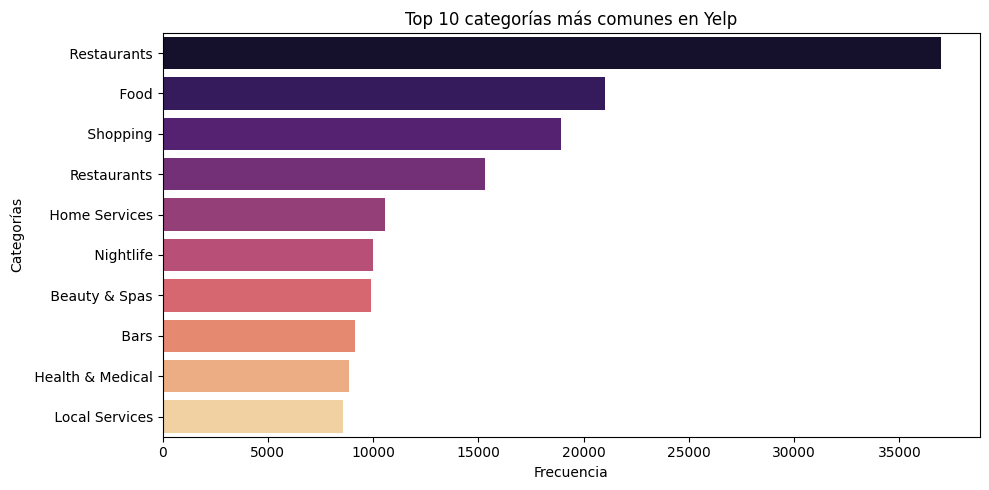

In [112]:
# Frecuencia de las categorías más comunes en Yelp
top_yelp = categorias_yelp['lista_categorias'].value_counts().head(10).sort_values(ascending=False)

# Crear gráfico de barras horizontal para Yelp
plt.figure(figsize=(10, 5))
sns.barplot(x=top_yelp.values, y=top_yelp.index, palette='magma')
plt.title('Top 10 categorías más comunes en Yelp')
plt.xlabel('Frecuencia')
plt.ylabel('Categorías')

# Visualización
plt.tight_layout()
plt.show()

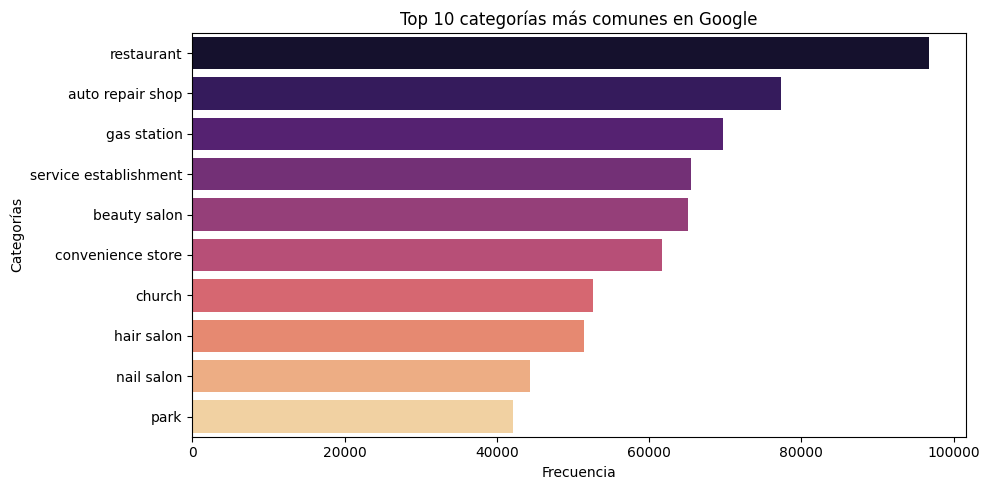

In [114]:
# Frecuencia de las categorías más comunes en Google
top_google = categorias_google['category'].value_counts().head(10).sort_values(ascending=False)

# Crear gráfico de barras horizontal para Google
plt.figure(figsize=(10, 5))
sns.barplot(x=top_google.values, y=top_google.index, palette='magma')
plt.title('Top 10 categorías más comunes en Google')
plt.xlabel('Frecuencia')
plt.ylabel('Categorías')

# Visualizción
plt.tight_layout()
plt.show()

### **CONCLUSIONES**

#### **Tendencias de Consumo:** 

- ##### La alta frecuencia de la categoría ``Restaurants`` respalda nuestro enfoque en analizar **restaurantes** y **hoteles**, destacando su relevancia en el mercado actual.

#### **Segmentación y Personalización:**
- ##### La diversidad de categorías en los datasets subraya la importancia de un sistema de recomendación personalizado, que ayude a los usuarios a descubrir nuevos lugares basados en sus preferencias.

#### **Impacto de las Reseñas:**
- ##### Las reseñas son cruciales para la toma de decisiones de los consumidores; analizar estos datos permitirá a las empresas optimizar sus servicios y mejorar su reputación.

#### **Adaptación Continua:**
- ##### La naturaleza dinámica de las reseñas implica que nuestras herramientas deben actualizarse en tiempo real, facilitando la adaptación a cambios en el comportamiento del consumidor.

---

### **SEGUNDO PASO:**
### **UNIFICACIÓN DE CATEGORÍAS (Yelp y Google)**

##### Se procede a agrupar las categorías a segmentos más generales para obtener una visión más amplia y clara de todas las categorías presentes, lo que nos ayudará a tomar decisiones informadas y mejor fundamentadas.

#### **Unificar y Normalizar Categorías**

##### A continuación, concatenamos las categorías de ambas tablas y eliminamos duplicados para crear una tabla maestra de categorías y se aplica un proceso de normalización que incluye la eliminación de espacios en blanco y la conversión a minúsculas.

##### También se aplica la normalización en los datasets originales.

In [26]:
# Paso 1: Unificar categorías y crear maestro de categorías
# Concatenar ambas tablas de categorías
categorias_unificadas = pd.concat([categorias_yelp['lista_categorias'], categorias_google['category']]).unique()

# Crear tabla maestra de categorías
categories = pd.DataFrame(categorias_unificadas, columns=['category'])
categories['category_id'] = categories.index + 1  # autoincremental


# Normalizar y limpiar categorías
def normalizar_categoria(cat):
    """Normaliza la categoría eliminando espacios y convirtiendo a minúsculas."""
    return cat.strip().lower()  # Remover espacios y convertir a minúsculas

# Aplicar normalización
categories['category'] = categories['category'].apply(normalizar_categoria)

# Eliminar duplicados tras la normalización
categories = categories.drop_duplicates(subset=['category']).reset_index(drop=True)

# Reasignar el category_id después de la limpieza
categories['category_id'] = categories.index + 1

# Guardar el CSV normalizado
categories.to_csv('categories_normalized.csv', index=False)


#### **Creación de Diccionario para mapear Ids**

##### Se procede a normalizar las categorías en las tablas originales para asegurar consistencia y se crea un diccionario que vincula las categorías a sus respectivos ``category_id``. Para ello se mapea y asigna el ``category_id`` a las categorías en **Yelp**.

##### De manera similar, asignamos el ``category_id`` a las categorías en **Google**. Finalmente se renombran las columnas para que sean más descriptivas y claras.

In [31]:
# Cargar las tablas originales y el maestro de categorías
# categorias_yelp = pd.read_parquet('Proyecto_final/Datos/yelp/categories_business_yelp_todavia_nombres.parquet')
# categorias_google = pd.read_parquet('Proyecto_final/Datos/google/categories_sitios_google_todavia_nombres.parquet')
categories = pd.read_csv('C:/DYNAMO/PFinal/Proyecto_final/notebooks/EDA/categories_normalized.csv')

# Paso 2: Normalizar y limpiar categorías en las tablas originales
categorias_yelp['lista_categorias'] = categorias_yelp['lista_categorias'].apply(normalizar_categoria)
categorias_google['category'] = categorias_google['category'].apply(normalizar_categoria)

# Paso 3: Crear un diccionario para mapear categorías a category_id
category_dict = pd.Series(categories.category_id.values, index=categories.category).to_dict()

# Paso 4: Mapear y asignar category_id en Yelp
categorias_yelp['category_id'] = categorias_yelp['lista_categorias'].map(category_dict)

# Paso 5: Mapear y asignar category_id en Google
categorias_google['category_id'] = categorias_google['category'].map(category_dict)

# Paso 6: Mantener solo las columnas necesarias
yelp_normalizado = categorias_yelp[['business_id', 'category_id']]
google_normalizado = categorias_google[['gmap_id', 'category_id']]

# Paso 7: Renombrar las columnas para mayor claridad
yelp_normalizado.rename(columns={'category_id': 'category_id_yelp'}, inplace=True)
google_normalizado.rename(columns={'category_id': 'category_id_google'}, inplace=True)

# Paso 8: Guardar las tablas normalizadas
yelp_normalizado.to_parquet('yelp_normalizado.parquet', index=False)
google_normalizado.to_parquet('google_normalizado.parquet', index=False)

In [41]:
print(categorias_yelp['category_id'].isnull().sum(), "categorías no mapeadas en Yelp.")
print(categorias_google['category_id'].isnull().sum(), "categorías no mapeadas en Google.")


0 categorías no mapeadas en Yelp.
0 categorías no mapeadas en Google.


#### **Verificación de registros en los conjuntos de datos normalizados** 

#### **Yelp**

#### A continuación, se identifican los duplicados en el conjunto de datos. Se busca por combinaciones de business_id y category_id_yelp, ya que estas son claves relevantes para detectar duplicaciones significativas.

In [16]:
categories = pd.read_csv('C:/DYNAMO/PFinal/Proyecto_final/notebooks/EDA/categories_normalized.csv')

In [2]:
yelp_normalizado = pd.read_parquet('yelp_normalizado.parquet')

#### Los ids se han cargado como floats, se los convierte a enteros.

In [9]:
yelp_normalizado['category_id_yelp'] = yelp_normalizado['category_id_yelp'].fillna(0).astype(int)

In [10]:
yelp_normalizado.head(50)

business_id  category_id_yelp
0   Pns2l4eNsfO8kk83dixA6A                 1
1   Pns2l4eNsfO8kk83dixA6A                 2
2   Pns2l4eNsfO8kk83dixA6A                 3
3   Pns2l4eNsfO8kk83dixA6A                 4
4   Pns2l4eNsfO8kk83dixA6A                 5
5   Pns2l4eNsfO8kk83dixA6A                 6
6   mpf3x-BjTdTEA3yCZrAYPw                 7
7   mpf3x-BjTdTEA3yCZrAYPw                 8
8   mpf3x-BjTdTEA3yCZrAYPw                 9
9   mpf3x-BjTdTEA3yCZrAYPw                10
10  mpf3x-BjTdTEA3yCZrAYPw                11
11  tUFrWirKiKi_TAnsVWINQQ                12
12  tUFrWirKiKi_TAnsVWINQQ                13
13  tUFrWirKiKi_TAnsVWINQQ                14
14  tUFrWirKiKi_TAnsVWINQQ                15
15  tUFrWirKiKi_TAnsVWINQQ                16
16  tUFrWirKiKi_TAnsVWINQQ                17
17  MTSW4McQd7CbVtyjqoe9mw                18
18  MTSW4McQd7CbVtyjqoe9mw                19
19  MTSW4McQd7CbVtyjqoe9mw                20
20  MTSW4McQd7CbVtyjqoe9mw                21
21  MTSW4McQd7CbVtyjqoe9mw                22
22  mWMc6_wTdE0EUBKIGXDVfA                23
23  mWMc6_wTdE0EUBKIGXDVfA                24
24  mWMc6_wTdE0EUBKIGXDVfA                19
25  CF33F8-E6oudUQ46HnavjQ                25
26  CF33F8-E6oudUQ46HnavjQ                26
27  CF33F8-E6oudUQ46HnavjQ                27
28  CF33F8-E6oudUQ46HnavjQ                19
29  CF33F8-E6oudUQ46HnavjQ                28
30  CF33F8-E6oudUQ46HnavjQ                18
31  n_0UpQx1hsNbnPUSlodU8w                29
32  n_0UpQx1hsNbnPUSlodU8w                14
33  n_0UpQx1hsNbnPUSlodU8w                30
34  n_0UpQx1hsNbnPUSlodU8w                13
35  n_0UpQx1hsNbnPUSlodU8w                31
36  n_0UpQx1hsNbnPUSlodU8w                32
37  qkRM_2X51Yqxk3btlwAQIg                33
38  qkRM_2X51Yqxk3btlwAQIg                34
39  k0hlBqXX-Bt0vf1op7Jr1w                35
40  k0hlBqXX-Bt0vf1op7Jr1w                18
41  k0hlBqXX-Bt0vf1op7Jr1w                36
42  k0hlBqXX-Bt0vf1op7Jr1w                37
43  k0hlBqXX-Bt0vf1op7Jr1w                38
44  k0hlBqXX-Bt0vf1op7Jr1w                39
45  k0hlBqXX-Bt0vf1op7Jr1w                40
46  bBDDEgkFA1Otx9Lfe7BZUQ                28
47  bBDDEgkFA1Otx9Lfe7BZUQ                26
48  bBDDEgkFA1Otx9Lfe7BZUQ                25
49  bBDDEgkFA1Otx9Lfe7BZUQ                18

#### **Duplicados Encontrados:** 
#### Se han identificado múltiples registros con el mismo business_id y category_id_yelp, indicando que un mismo negocio puede estar asociado a la misma categoría más de una vez.

#### Los duplicados están asociados con la categoría de "gas stations" id = 171 (según el archivo de categorías maestra)

In [17]:
duplicates_yelp = yelp_normalizado[yelp_normalizado.duplicated(subset=['business_id', 'category_id_yelp'])]
print(duplicates_yelp)


                   business_id  category_id_yelp
15731   5wnGMB8tXhNvGcbhPJeeVw               171
182363  60A570zht69eAj3Md81nsQ               171
266310  YLLWDhNYfP1ocOHC5KWBOQ               171
327462  JPmd9szvz_YI8_LtcwixFw               171
394359  91gDFsfejFglVwdQWnkOpg               171
402228  -Ot1Qa0V3wNVUroZmItMyQ               171
452669  zqAPDoI34MDtNjvCWe3WKA               171
534635  oRY9axuwOQSN4HbTu7obtg               171
628422  XwqwayHSA_TJDnk-13AyAw               171
651164  fBNAR1lquwEEqruuR16UqQ               171


In [52]:
category_info = categories[categories['category_id'] == 171]
print(category_info)


         category  category_id
170  gas stations          171


#### **Google**

#### A continuación, se identifican los duplicados en el conjunto de datos. 

In [49]:
google_normalizado = pd.read_parquet('google_normalizado.parquet')

In [50]:
google_normalizado.head(50)

gmap_id  category_id_google
0   0x88f16e41928ff687:0x883dad4fd048e8f8                 269
1   0x80c2c98c0e3c16fd:0x29ec8a728764fdf9                1313
2   0x80c2c778e3b73d33:0xbdc58662a4a97d49                1314
3    0x80c2c89923b27a41:0x32041559418d447                1315
4   0x80c2c632f933b073:0xc31785961fe826a6                1315
5   0x80c2cf163db6bc89:0x219484e2edbcfa41                1315
6   0x80dd2b4c8555edb7:0xfc33d65c4bdbef42                1316
7   0x87ec238afdd8837b:0x2f43f2b12142bff5                1317
8   0x87ec238afdd8837b:0x2f43f2b12142bff5                1318
9    0x87ec235c54d25b31:0x3b75fb5facc602f                1319
10   0x87ec235c54d25b31:0x3b75fb5facc602f                1320
11  0x87ee85ac3cb23b4d:0x4cd1435fddc046b1                1321
12  0x87ee85ac3cb23b4d:0x4cd1435fddc046b1                1322
13  0x87ec2394c2cd9d2d:0xd1119cfbee0da6f3                1323
14  0x87ec2394c2cd9d2d:0xd1119cfbee0da6f3                1324
15  0x87ec2394c2cd9d2d:0xd1119cfbee0da6f3                1325
16  0x87ee95d1e474531b:0xb432dd96285cdc6b                1326
17  0x87ee95d1e474531b:0xb432dd96285cdc6b                1327
18  0x87ec2481df6626b5:0xff5627745308ec2b                1328
19  0x80960c29f2e3bf29:0x4b291f0d275a5699                1329
20  0x80960c29f2e3bf29:0x4b291f0d275a5699                1330
21   0x88d9beb4fe0532c1:0xef0555c169299d6                1331
22  0x809adef58ae560bd:0x83412889e022ff70                1332
23  0x809adef58ae560bd:0x83412889e022ff70                1333
24  0x809adef58ae560bd:0x83412889e022ff70                 163
25  0x809adef58ae560bd:0x83412889e022ff70                1334
26  0x809adef58ae560bd:0x83412889e022ff70                1335
27  0x809b1ff6d3a60c4d:0xdf08e68028807693                1336
28  0x809b1ff6d3a60c4d:0xdf08e68028807693                1337
29  0x809ae0a7ce91433b:0xe4b44fbb8c35ba57                1334
30  0x809ad95924805cf7:0xb424019b8961719d                1331
31  0x809b217a6cbe4fa9:0x9fd06999c64c1815                1334
32  0x809b217a6cbe4fa9:0x9fd06999c64c1815                1332
33  0x809b217a6cbe4fa9:0x9fd06999c64c1815                1338
34  0x809adfe022389d79:0x388b21219097be6c                1334
35  0x809ad993cd15cc69:0x38291ec9a11f59ed                1334
36  0x809b20f8059f58af:0xf05aed524fd9b93c                1332
37  0x809b20f8059f58af:0xf05aed524fd9b93c                1334
38  0x809adee9ac6f1bd7:0xe2e56d16919b9b8d                1334
39  0x8638869e6b4e3529:0xe8d257447fe41672                1339
40  0x86312d61f5ac28b5:0x5e6c55690b65096a                1340
41  0x86312d61f5ac28b5:0x5e6c55690b65096a                1341
42  0x86312d61f5ac28b5:0x5e6c55690b65096a                1342
43  0x86312d61f5ac28b5:0x5e6c55690b65096a                1343
44   0x863050a2977a797d:0x8206eda0d4f6207                1344
45  0x8636d2cbbf059b25:0xfb596a49eb5ae043                1324
46  0x8636d2cbbf059b25:0xfb596a49eb5ae043                1323
47  0x8636cd31728dc371:0x634bad3dae8adce6                1331
48  0x86312cb6a6be635f:0x1aab9f13de75d762                1345
49  0x86312cb6a6be635f:0x1aab9f13de75d762                1346

#### **Múltiples Categorías por Negocio:**

Se encontró que un solo ``gmap_id`` puede estar asociado con múltiples ``category_id_google``, lo que indica que un negocio puede clasificarse en varias categorías.
Un ejemplo de esto es que un negocio puede estar etiquetado como "restaurante", "comida rápida" y "servicio de entrega".
Frecuencia de Categorías:

Se realizaron conteos sobre el número de categorías asociadas a cada gmap_id. Algunos negocios tienen un número significativo de categorías:
Ejemplo de gmap_id con más categorías:

``0x89c24484b823fed3:0x74f6329f85c4f381`` tiene 32 categorías.

``0x878da684ff9e47d9:0x8879f6718354b2f8`` tiene 23 categorías.

Los duplicados identificados se deben a la naturaleza de múltiples categorías por negocio. 

In [54]:
# Verificar duplicados solo por gmap_id
duplicados_gmap = google_normalizado[google_normalizado.duplicated(subset=['gmap_id'], keep=False)]
print(duplicados_gmap)


                                       gmap_id  category_id_google
7        0x87ec238afdd8837b:0x2f43f2b12142bff5                1317
8        0x87ec238afdd8837b:0x2f43f2b12142bff5                1318
9         0x87ec235c54d25b31:0x3b75fb5facc602f                1319
10        0x87ec235c54d25b31:0x3b75fb5facc602f                1320
11       0x87ee85ac3cb23b4d:0x4cd1435fddc046b1                1321
...                                        ...                 ...
6211312  0x88d9e749a61cd6a5:0x7396cf8e8dadf8bf                2637
6211313  0x88d9e749a61cd6a5:0x7396cf8e8dadf8bf                1390
6211317  0x89c6c74f43a49b55:0x6be6995921c58b12                3034
6211318  0x89c6c74f43a49b55:0x6be6995921c58b12                3801
6211319  0x89c6c74f43a49b55:0x6be6995921c58b12                1618

[4447528 rows x 2 columns]


In [55]:
# Verificar duplicados solo por category_id_google
duplicados_categoria = google_normalizado[google_normalizado.duplicated(subset=['category_id_google'], keep=False)]
print(duplicados_categoria)

                                       gmap_id  category_id_google
0        0x88f16e41928ff687:0x883dad4fd048e8f8                 269
1        0x80c2c98c0e3c16fd:0x29ec8a728764fdf9                1313
2        0x80c2c778e3b73d33:0xbdc58662a4a97d49                1314
3         0x80c2c89923b27a41:0x32041559418d447                1315
4        0x80c2c632f933b073:0xc31785961fe826a6                1315
...                                        ...                 ...
6211319  0x89c6c74f43a49b55:0x6be6995921c58b12                1618
6211320  0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc                2023
6211321  0x89da6b9ce832726f:0xbd0d3630f1e3b42e                2159
6211322  0x88d9e872a9e39f3d:0x5de29f50507e5d73                2331
6211323  0x54956b3944b1654d:0x7797cead9a485c22                1664

[6211089 rows x 2 columns]


#### Duplicados por ``gmap_id``: Se han identificado múltiples registros con el mismo gmap_id, lo que indica que una misma ubicación puede tener registros duplicados.

#### Duplicados por ``category_id_google``: También se han encontrado duplicados en la categoría asociada a los gmap_id, lo que sugiere que varias ubicaciones pueden compartir categorías comunes.

#### **Conteo de Categorías Únicas:** El número de categorías únicas por ``gmap_id`` muestra la diversidad de categorías asociadas a cada ubicación, con algunos gmap_id teniendo hasta 32 categorías diferentes.

In [57]:
# Contar categorías únicas por gmap_id
categoria_count = google_normalizado.groupby('gmap_id')['category_id_google'].nunique().reset_index()
categoria_count.columns = ['gmap_id', 'num_categories']

# Mostrar algunos resultados
print(categoria_count.sort_values(by='num_categories', ascending=False).head())


                                       gmap_id  num_categories
2537066  0x89c24484b823fed3:0x74f6329f85c4f381              32
1105201  0x878da684ff9e47d9:0x8879f6718354b2f8              23
2610611  0x89c28801576a92a1:0xe8183528656d5f08              22
48527    0x52b13956184253f9:0x17abc3bcffbb8273              19
989353   0x872b6f70ced0c877:0x86325275c1a5a1fe              18


---
### **TERCER PASO:**
### **CONSOLIDACIÓN DE CATEGORÍAS:**
- #### Se crea una categoría general agrupando categorías relacionadas en una sola.

#### Se procede a agrupar categorías relacionadas en una sola (ej. "bar", "restaurant", "resto") para obtener una visión clara de las categorías presentes en los datos, lo que facilitará la toma de decisiones informadas.

#### Para esto se utiliza **NLTK** para procesar el texto, eliminar información inncesearia y realizar un recuento de palabras para identificar las más frecuentes.

#### Con esto se definirá grupos generales y se asignaran las categorías basándose en coincidencias de palabras clave.



In [89]:
# Obtenemos la lista de stop words en inglés
palabras_excluidas = set(stopwords.words("english")).union({"&"})

# Cargar el archivo
try:
    categorias = pd.read_csv('categories_normalized.csv')
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Tokenizamos la columna "categories_id" y filtramos las stop words
tokens = categorias["category"].apply(word_tokenize)
tokens_sin_exclusiones = tokens.apply(lambda x: [palabra for palabra in x if palabra not in palabras_excluidas])

# Contamos la frecuencia de cada palabra
frecuencia_palabras = Counter(palabra for sublista in tokens_sin_exclusiones for palabra in sublista)

# Ordenamos las palabras por frecuencia
palabras_ordenadas = sorted(frecuencia_palabras.items(), key=lambda x: x[1], reverse=True)


In [68]:
# Guardamos en un archivo CSV para luego realizar la agrupación
ruta_archivo = r'C:/DYNAMO/PFinal/Proyecto_final/notebooks/EDA/palabras_frecuentes.csv'  # Ruta especificada

df_palabras_ordenadas = pd.DataFrame(
    palabras_ordenadas, columns=["Palabra", "Frecuencia"]
)
df_palabras_ordenadas.to_csv(ruta_archivo, index=False)

print(f"Las palabras ordenadas se han guardado en {ruta_archivo}.")


Las palabras ordenadas se han guardado en C:/DYNAMO/PFinal/Proyecto_final/notebooks/EDA/palabras_frecuentes.csv.


In [18]:
frecuencia = pd.read_csv('palabras_frecuentes.csv')
frecuencia

Palabra  Frecuencia
0        service         366
1          store         366
2     restaurant         298
3       supplier         246
4           shop         182
...          ...         ...
3458     zealand           1
3459       offal           1
3460    asturian           1
3461   cigarette           1
3462       fault           1

[3463 rows x 2 columns]

#### **Observaciones de las palabras más frecuentes**
##### **Palabras Dominantes:**

- ##### ``service`` y ``store`` son las palabras más frecuentes, lo cual indica que hay muchas categorías relacionadas con servicios y establecimientos. Estos términos podrían ser buenos puntos de partida para agrupar categorías relacionadas en un solo grupo general.

- ##### Palabras como ``restaurant``, ``supplier``, ``shop`` y ``school`` también tienen una alta frecuencia, lo cual indica que estos tipos de negocios tienen muchas subcategorías.

##### **Consideraciones para agrupar:**

- ##### Términos como ``service``, ``services``, ``repair``, y ``equipment`` podrían ser agrupados bajo una categoría general de **servicios**.

- ##### ``Restaurant``, ``food``, ``store``, ``shop`` podrían formar parte de un grupo relacionado con el **comercio de alimentos y gastronomía.**

- ##### Palabras como ``club``, ``center``, ``agency``, ``office`` podrían indicar agrupamientos en torno a negocios de **entretenimiento**, **deporte** o **centros de servicio**.

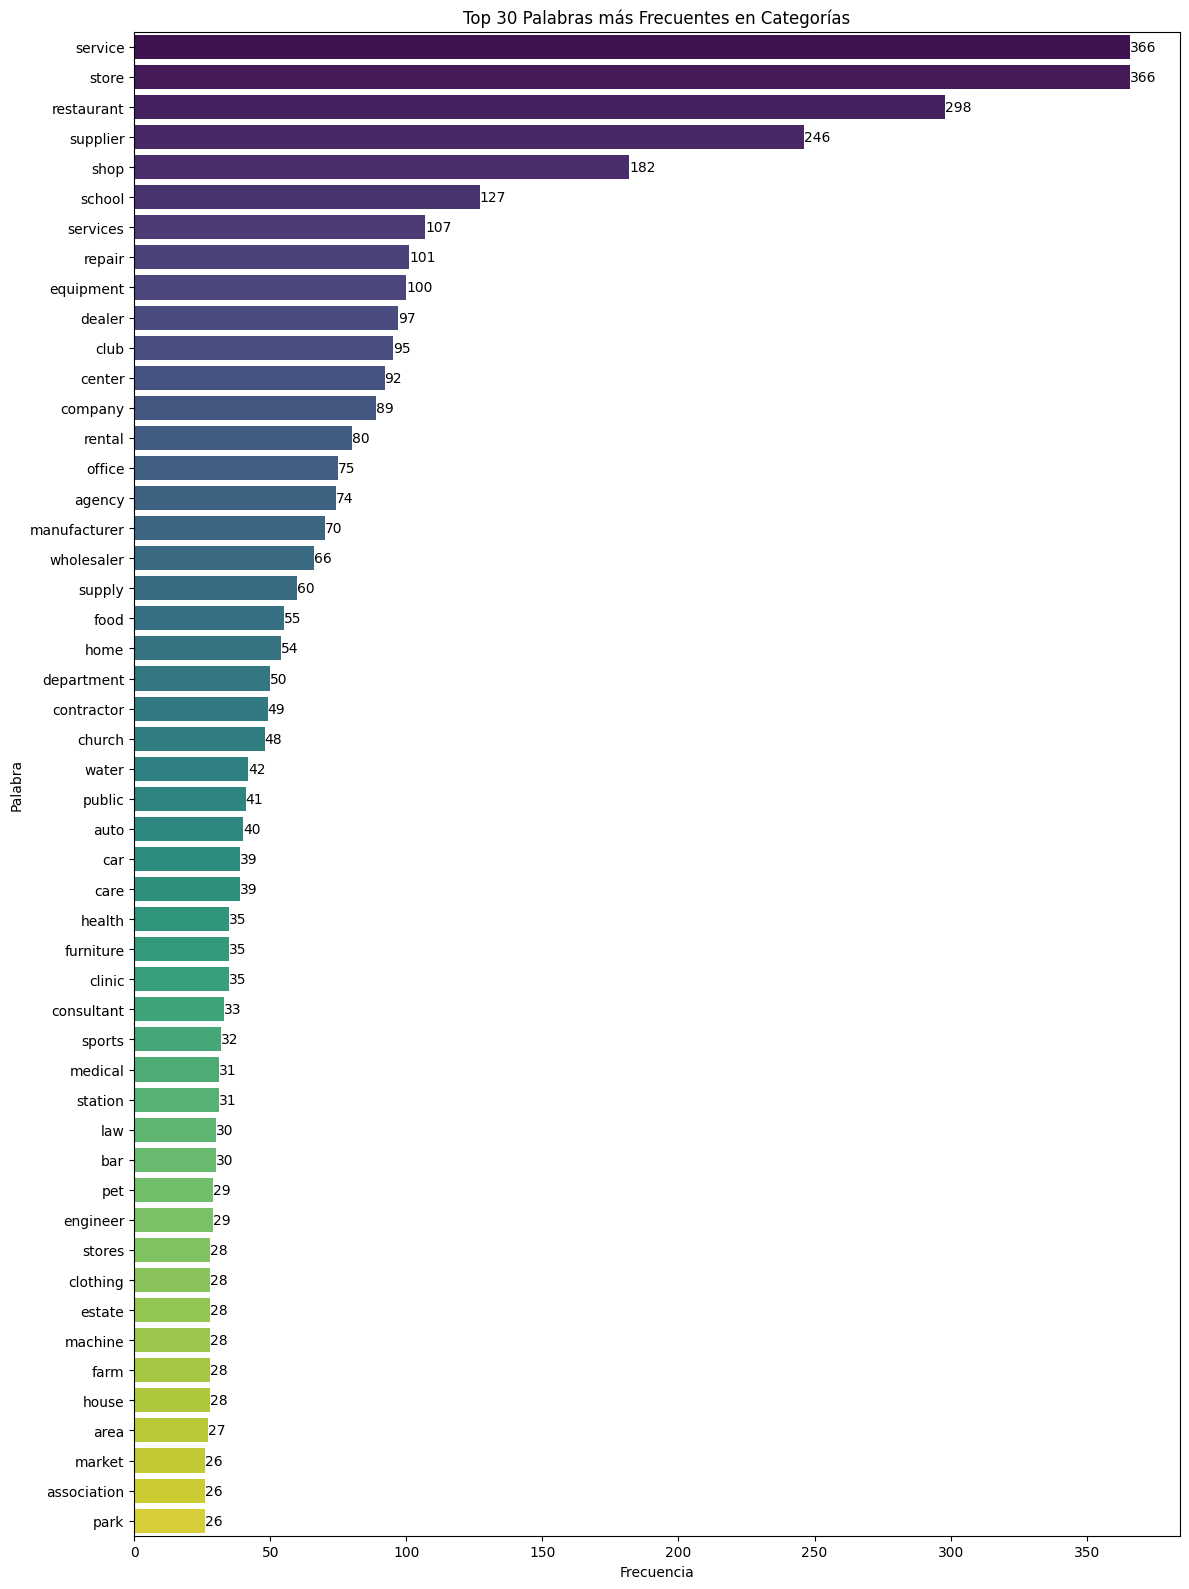

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo de palabras frecuentes
frecuentes = pd.read_csv('palabras_frecuentes.csv')

# Filtrar para obtener solo las 30 palabras más frecuentes
top_30_frecuentes = frecuentes.head(50)

# Crear un gráfico de barras horizontal
plt.figure(figsize=(12, 16))
barplot = sns.barplot(y='Palabra', x='Frecuencia', data=top_30_frecuentes, palette='viridis')

# Añadir etiquetas con los valores de frecuencia en cada barra
for index, value in enumerate(top_30_frecuentes['Frecuencia']):
    barplot.text(value, index, f'{value}', va='center', ha='left')

# Configuraciones del gráfico
plt.title('Top 30 Palabras más Frecuentes en Categorías')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### **CONSIDERACIONES** 

##### Este análisis basado en frecuencias es un buen avance con las palabras clave, y simplifica la agrupación de las categorías más comunes reduciendo el trabajo manual. A su vez, también resulta ser menos efectivo para las categorías menos comunes o aquellas que no tienen términos obvios en común.

##### Para solucionar esto, se opta por el siguiente enfoque obteniendo un equilibrio perfecto entre **precisión** y **eficiencia**, aprovechando el análisis de las frecuencias y utilizando como apoyo técnicas de NLP para manejar las categorías menos obvias. 


1) ##### **Definir los Grupos Iniciales:** Utilizando los términos más frecuentes identificados se agruparan en categorías generales.
2) ##### **Aplicar Embeddings y Clustering:** Con las categorías restantes, aplicaremos técnicas de NLP para agruparlas automáticamente, asegurándonos de cubrir todas las categorías.



#### **1- GRUPOS INICIALES** 
#### **Diccionario de Agrupación**

##### Se crea el diccionario donde cada palabra se agrupa bajo una categoría general siguiendo el análisis basado en frecuencias y luego se aplica la agrupación a *categories_normalized* (tabla maestra de categorías).

- **Servicios Generales** (`service, services, repair, company, contractor, consultant, agency`): Palabras relacionadas con servicios ofrecidos por empresas.

- **Comercio y Tiendas** (``store, shop, supplier, wholesaler, department, market, store, clothing``): Palabras relacionadas con establecimientos comerciales y distribución.
- **Alimentos y Bebidas** (``restaurant, bar, food``): Abarca todo lo relacionado con la gastronomía y la venta de alimentos.
- **Educación y Entretenimiento** (``school, club, center, sports, park``): Agrupa palabras relacionadas con educación y actividades recreativas.
- **Salud y Cuidado** (``health, care, medical, clinic``): Incluye categorías relacionadas con salud, medicina y bienestar.
- **Inmuebles y Hogar** (``home, office, estate, house, furniture``): Agrupa categorías relacionadas con bienes raíces y servicios para el hogar.
- **Vehículos y Transporte** (``car, auto, station``): Incluye todo lo relacionado con transporte y servicios automotrices.
- **Agua y Energía** (``water, public``): Servicios públicos que pueden incluir infraestructura y recursos básicos.
- **Industria y Manufactura** (``equipment, manufacturer, machine, farm``): Abarca categorías industriales y de producción.
- **Mascotas y Veterinaria** (``pet``): Agrupa las categorías relacionadas con el cuidado de animales.

In [28]:
# Definir diccionario de agrupación
agrupaciones = {
    'Servicios Generales': ['service', 'services', 'repair', 'company', 'contractor', 'consultant', 'agency'],
    'Comercio y Tiendas': ['store', 'shop', 'supplier', 'wholesaler', 'department', 'market', 'clothing'],
    'Alimentos y Bebidas': ['restaurant', 'bar', 'food'],
    'Educación y Entretenimiento': ['school', 'club', 'center', 'sports', 'park'],
    'Salud y Cuidado': ['health', 'care', 'medical', 'clinic'],
    'Inmuebles y Hogar': ['home', 'office', 'estate', 'house', 'furniture'],
    'Vehículos y Transporte': ['car', 'auto', 'station'],
    'Agua y Energía': ['water', 'public'],
    'Industria y Manufactura': ['equipment', 'manufacturer', 'machine', 'farm'],
    'Mascotas y Veterinaria': ['pet']
}

# Función para asignar una categoría general
def asignar_categoria_general(cat, agrupaciones):
    for categoria_general, sinonimos in agrupaciones.items():
        if any(palabra in cat for palabra in sinonimos):
            return categoria_general
    return 'Otros'  # Asignar a "Otros" si no encaja en ninguna categoría general

# Aplicar la función a categories_normalized
categories['category_general'] = categories['category'].apply(lambda x: asignar_categoria_general(x, agrupaciones))

# Guardar el resultado
categories.to_csv('categories_grouped.csv', index=False)


In [5]:
categories_group = pd.read_csv('categories_grouped.csv')

In [6]:
categories_group.head(50)

category  category_id             category_general
0                        doctors            1                        Otros
1   traditional chinese medicine            2                        Otros
2          naturopathic/holistic            3                        Otros
3                    acupuncture            4                        Otros
4               health & medical            5              Salud y Cuidado
5                  nutritionists            6                        Otros
6               shipping centers            7  Educación y Entretenimiento
7                 local services            8          Servicios Generales
8                       notaries            9                        Otros
9                mailbox centers           10  Educación y Entretenimiento
10             printing services           11          Servicios Generales
11             department stores           12           Comercio y Tiendas
12                      shopping           13           Comercio y Tiendas
13                       fashion           14                        Otros
14                 home & garden           15            Inmuebles y Hogar
15                   electronics           16                        Otros
16              furniture stores           17           Comercio y Tiendas
17                   restaurants           18          Alimentos y Bebidas
18                          food           19          Alimentos y Bebidas
19                    bubble tea           20                        Otros
20                  coffee & tea           21                        Otros
21                      bakeries           22                        Otros
22                      brewpubs           23                        Otros
23                     breweries           24                        Otros
24                       burgers           25                        Otros
25                     fast food           26          Alimentos y Bebidas
26                    sandwiches           27                        Otros
27     ice cream & frozen yogurt           28                        Otros
28                sporting goods           29                        Otros
29                   shoe stores           30           Comercio y Tiendas
30                   sports wear           31  Educación y Entretenimiento
31                   accessories           32                        Otros
32                    synagogues           33                        Otros
33       religious organizations           34                        Otros
34                          pubs           35                        Otros
35                       italian           36                        Otros
36                          bars           37          Alimentos y Bebidas
37        american (traditional)           38                        Otros
38                     nightlife           39                        Otros
39                         greek           40                        Otros
40                    vietnamese           41                        Otros
41                   food trucks           42          Alimentos y Bebidas
42                        diners           43                        Otros
43            breakfast & brunch           44                        Otros
44             general dentistry           45                        Otros
45                      dentists           46                        Otros
46             cosmetic dentists           47                        Otros
47                         delis           48                        Otros
48                    sushi bars           49          Alimentos y Bebidas
49                      japanese           50                        Otros

#### **1- EMBEDDINGS - CLUSTERING** 

- #### **Embeddings:**
##### Se utiliza **Sentence Transformers** con el modelo **'all-MiniLM-L6-v2'** para generar embeddings densos y efectivos para el análisis de las categorías.
##### Luego, antes de proceder con el clustering, nos aseguramos de que los datos tengan la forma adecuada y ver si hay algo que necesite ajustarse. Para ello, se analizó lo siguiente:
- ##### **Dimensiones de los Embeddings:** Cuántas dimensiones tiene cada embedding para asegurarnos de que sea adecuado para K-means.
- ##### **Distribución de los Valores:** Se revisó cómo se distribuyen los valores para identificar si hay alguna anomalía.
- ##### **Ejemplo de Embeddings:** Se observaron ejemplos de los embeddings generados para asegurarnos de que tengan un formato y magnitud esperados.

In [17]:
# Reemplazar "/" por "y" para hacer las categorías más legibles
categories_group['category'] = categories_group['category'].str.replace('/', ' y ')

# Verificar nuevamente las primeras filas después del reemplazo
categories_group.head()

category  category_id category_general
0                       doctors            1            Otros
1  traditional chinese medicine            2            Otros
2       naturopathic y holistic            3            Otros
3                   acupuncture            4            Otros
4              health & medical            5  Salud y Cuidado

In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import pickle
import os

In [21]:
# Cargar el modelo preentrenado de Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')

# Definir el archivo de embeddings usando la ruta absoluta con raw string
embeddings_file = r'C:\DYNAMO\PFinal\Proyecto_final\notebooks\EDA\embeddings.pkl'

# Generamos embeddings para cada una de las categorías
if not os.path.exists(embeddings_file):
    data_categories = categories_group['category'].tolist()
    embeddings = model.encode(data_categories)
    # Se guardan los embeddings generados para uso posterior
    with open(embeddings_file, 'wb') as f:
        pickle.dump(embeddings, f)
else:
    # Se cargan los embeddings previamente generados
    with open(embeddings_file, 'rb') as f:
        embeddings = pickle.load(f)

# Guardar el archivo de embeddings para uso posterior
with open(embeddings_file, 'wb') as f:
    pickle.dump(embeddings, f)


#### **Análisis de Embeddings Generados para las Categorías**

##### En este análisis, hemos generado embeddings para cada una de las categorías de categories_group utilizando el modelo preentrenado Sentence Transformers (all-MiniLM-L6-v2). El objetivo es obtener una representación numérica densa que nos permita aplicar técnicas de clustering para agrupar las categorías de forma efectiva, evitando problemas de alta dimensionalidad.

##### Los embeddings fueron guardados en un archivo .pkl para su uso posterior, lo cual nos permitirá reutilizar estos vectores sin necesidad de regenerarlos.

#### **Dimensiones del Array de Embeddings**
##### El array de embeddings tiene una forma de (5705, 384), lo cual indica que hemos generado 5705 embeddings correspondientes a cada una de las categorías presentes, cada uno con 384 dimensiones.

#### **Ejemplos de Embeddings Generados**
##### Los valores de los embeddings están distribuidos en torno a cero, con un rango razonable de valores positivos y negativos pequeños. Esto es característico de embeddings densos generados por modelos preentrenados y sugiere que los valores están bien balanceados para el proceso de clustering.
#### **Estadísticas de los Embeddings**
- ##### ***Media de los Valores de los Embeddings:*** 0.000858
- ##### ***Desviación Estándar de los Valores de los Embeddings:*** 0.051
##### La media cercana a cero y la desviación estándar moderada indican que los embeddings tienen una buena distribución y están listos para ser utilizados en el proceso de clustering.
#### **Conclusión**
##### Los embeddings generados cumplen con las características esperadas para ser utilizados en el proceso de agrupación de categorías. Con esta representación, procederemos a aplicar K-Means clustering para identificar grupos de categorías similares de una manera automatizada y efectiva.

In [26]:
# Convertimos los embeddings a un array de numpy para poder analizar sus características
embeddings_np = np.array(embeddings)

# Dimensiones del array de embeddings
print(f"Dimensiones del array de embeddings: {embeddings_np.shape}\n")

# Ejemplo de los primeros 5 embeddings
print("Ejemplos de los primeros 5 embeddings:\n")
print(embeddings_np[:5], "\n")

# Distribución de valores (media y desviación estándar)
print(f"Media de los valores de los embeddings: {np.mean(embeddings_np)}\n")
print(f"Desviación estándar de los valores de los embeddings: {np.std(embeddings_np)}\n")

Dimensiones del array de embeddings: (5705, 384)

Ejemplos de los primeros 5 embeddings:

[[-0.01883931  0.05916703  0.03592204 ...  0.00545345  0.10127226
   0.0824255 ]
 [-0.0417216   0.08795842 -0.03482498 ... -0.02874257  0.09846673
   0.10417986]
 [ 0.02337346 -0.05826945 -0.03940028 ... -0.00372798  0.07196853
  -0.02693617]
 [-0.07571319  0.03677751 -0.05617586 ...  0.01099093 -0.00182595
   0.06360658]
 [ 0.03638294  0.0815     -0.01542009 ... -0.06018765  0.07830112
   0.06908649]] 

Media de los valores de los embeddings: 0.0008580648573115468

Desviación estándar de los valores de los embeddings: 0.05102383345365524



#### **Análisis del Histograma de los Valores de los Embeddings**

##### **Forma de la Distribución:** 

- ##### El histograma muestra una **distribución simétrica** y en **forma de campana**, centrada alrededor de 0. Esto sugiere que los valores de los embeddings siguen una distribución que se asemeja a una distribución normal.

- ##### Los valores se encuentran mayoritariamente entre **-0.2** y **0.3**, con la mayoría concentrados cerca del cero. Esto es característico de embeddings densos que están bien regularizados.

##### **Simetría:** 
- ##### La simetría de la distribución indica que los embeddings generados no presentan un sesgo significativo hacia valores extremos. Esto es positivo, ya que permite que los datos sean más manejables durante el proceso de clustering.
##### **Frecuencia:**

- ##### La mayor frecuencia se encuentra justo en el centro (alrededor de 0), con un decrecimiento gradual hacia los extremos. Este tipo de distribución es deseable ya que facilita la aplicación de algoritmos de clustering como K-Means, que pueden beneficiarse de una distribución balanceada.

##### Los embeddings parecen estar bien distribuidos y listos para el proceso de clustering. No se observan valores atípicos significativos ni una dispersión desbalanceada que pudiera complicar la convergencia de K-Means.
##### Esta representación es ideal para aplicar K-Means, ya que la distribución de los datos facilitará la identificación de clusters de categorías similares.

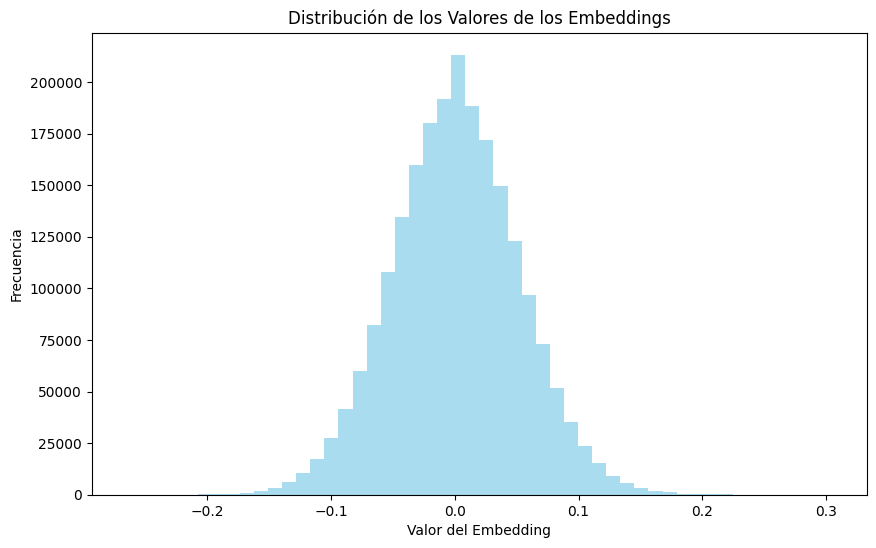

In [24]:
# Convertir los embeddings a un array de numpy
embeddings_np = np.array(embeddings)

# Graficar un histograma de los valores de los embeddings
plt.figure(figsize=(10, 6))
plt.hist(embeddings_np.flatten(), bins=50, color='skyblue', alpha=0.7)
plt.xlabel('Valor del Embedding')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Valores de los Embeddings')
plt.show()

#### **Análisis del Gráfico de Embeddings en 2D con PCA**
##### El gráfico muestra la distribución de las categorías en dos dimensiones, utilizando las dos **componentes principales** más significativas.
##### **Visualización General:**: 
- ##### La nube de puntos es bastante dispersa, con algunas áreas más densas, lo que podría indicar posibles **grupos** de categorías similares.
##### **Clusters Potenciales:**
- ##### Se observa una mayor **concentración de puntos** en ciertas regiones, particularmente cerca del centro, lo cual podría sugerir que hay **grupos de categorías que tienen una similitud alta.**
- ##### También hay puntos que se encuentran más alejados del resto, lo cual puede indicar **categorías más únicas** o **menos relacionadas** con el resto.
##### **Utilidad del PCA:**
- ##### La reducción de dimensionalidad a **2D** mediante **PCA** es útil para visualizar cómo se distribuyen los embeddings en el espacio y entender la estructura general de los datos.
- ##### Esta representación nos brinda una intuición visual sobre cómo podrían agruparse las categorías, y facilita el proceso de validación de los resultados que se obtendrán tras el clustering con **K-Means.**

##### La **dispersión general** de los puntos y la **existencia de densidades** variadas son indicadores favorables para aplicar K-Means, ya que el algoritmo podrá identificar patrones en las zonas de mayor densidad.
##### Podemos esperar encontrar varios **clusters** en los datos, con algunas categorías formando grupos bien definidos y otras probablemente quedando como "outliers" que requieren mayor análisis.

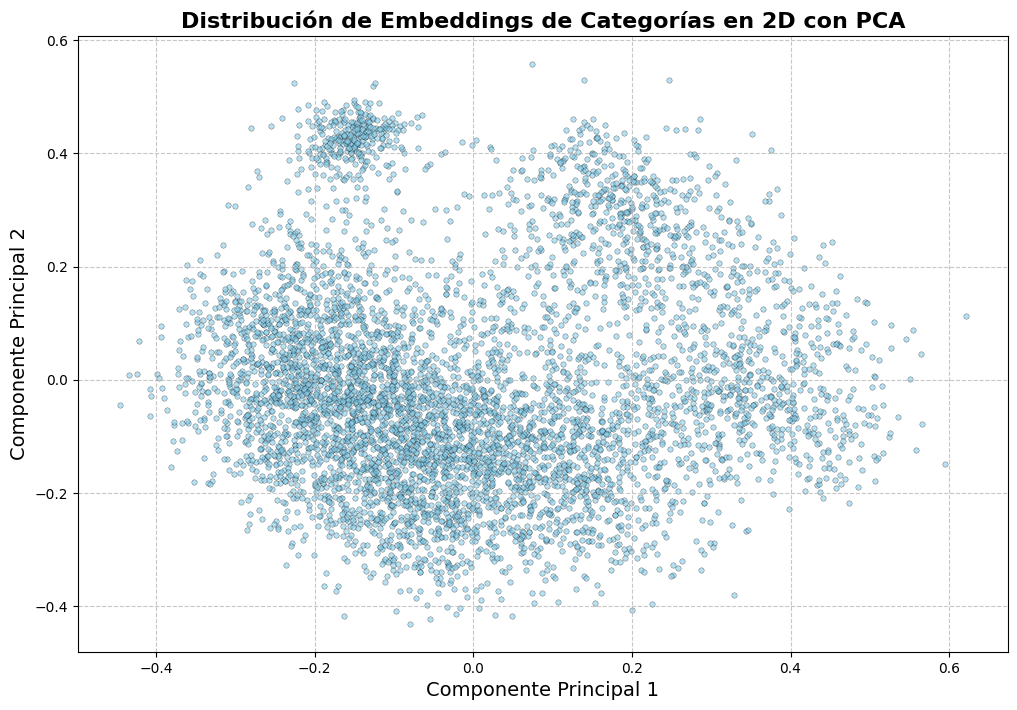

In [27]:
from sklearn.decomposition import PCA

# Se reducen los embeddings a 2 dimensiones usando PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_np)

# Figura
plt.figure(figsize=(12, 8))

# Se gráfican los embeddings proyectados en 2D
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=15, alpha=0.6, c='skyblue', edgecolors='k', linewidths=0.3)

# Título y etiquetas
plt.xlabel('Componente Principal 1', fontsize=14)
plt.ylabel('Componente Principal 2', fontsize=14)
plt.title('Distribución de Embeddings de Categorías en 2D con PCA', fontsize=16, fontweight='bold')

# Visualización
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


#### **Análisis del Método del Codo**
##### **Forma del Gráfico:**

- ##### Se observa que la **inercia disminuye** rápidamente de **K=1** a **K=4**, indicando que estos valores de K permiten una gran reducción en la inercia (es decir, mejoran significativamente la calidad de los clusters).
- ##### A partir de **K=5,** la reducción en la inercia empieza a ser más gradual y menos pronunciada, formando un "codo" en el gráfico.
##### **Posición del Codo:**

- ##### El "codo" en el gráfico parece estar en torno a **K=5** o **K=6**. Después de este punto, el beneficio de añadir más clusters se va reduciendo, lo que indica que estos valores de K podrían ser adecuados para el agrupamiento.
**Elección de K:**

- ##### El valor de **K=5** que elegido inicialmente parece razonable a la luz de este gráfico, ya que se encuentra cerca del codo y ofrece una buena compensación entre la simplicidad del modelo y la calidad del clustering.
- ##### Si puede considerar probar también con **K=6** para ver si se observan agrupamientos más significativos y consistentes.


#### **Análisis de Clusters Generados**
##### **Cluster 0:**

- ##### Está agrupando categorías relacionadas con **salud** y servicios complementarios ("doctors", "acupuncture", "health & medical"). Sin embargo, algunas categorías como "notaries" o "fashion" se filtraron y deberían reubicarse.
##### **Cluster 1:**

- ##### Este grupo se enfoca en **comercio y tiendas** ("department stores", "shopping", "furniture stores"). La agrupación se muestra bastante coherente y parece tener un buen enfoque.
##### **Cluster 2:**

- ##### Este cluster parece incluir **servicios generales** y algunos **servicios específicos**, como "shipping centers", "local services", "printing services", y "telecommunications". La agrupación es algo heterogénea, ya que incluye tanto servicios logísticos como otros más específicos, por lo que podría requerir una subdivisión más detallada.
##### **Cluster 3:**

- ##### Este grupo parece ser algo **misceláneo**, con categorías que van desde "food trucks" y "automotive" hasta "keys & locksmiths" y "contractors". Esto indica una mezcla de diferentes tipos de servicios y bienes.
- ##### Este cluster es bastante amplio y diverso. Hay que ajustarlo, ya que K=5 parece no ser suficiente para abarcar todos los matices de estas categorías.
##### **Cluster 4:**

- ##### Agrupa principalmente categorías relacionadas con **alimentos y bebidas** ("restaurants", "food", "fast food"), además de algunos otros servicios como "home & garden" e incluso "synagogues".
- ##### La inclusión de "synagogues" y "pubs" junto a "restaurants" y "food" indica que tal vez estos elementos religiosos y de bebida podrían formar un subgrupo diferente.

##### En general, se observa cierta cohesión en los clusters, pero también hay **categorías que parecen no encajar claramente** en algunos grupos.
- ##### **Considerar un ajuste mayor de K:** Dado que algunos clusters, como el Cluster 3, son bastante heterogéneos.

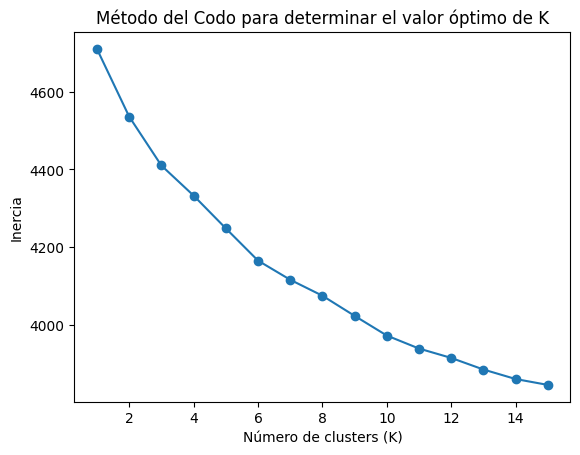

                       category  category_id category_general  cluster
0                       doctors            1            Otros        0
1  traditional chinese medicine            2            Otros        0
2       naturopathic y holistic            3            Otros        0
3                   acupuncture            4            Otros        0
4              health & medical            5  Salud y Cuidado        0

Categorías en el cluster 0:

                        category category_general
0                        doctors            Otros
1   traditional chinese medicine            Otros
2        naturopathic y holistic            Otros
3                    acupuncture            Otros
4               health & medical  Salud y Cuidado
5                  nutritionists            Otros
8                       notaries            Otros
13                       fashion            Otros
15                   electronics            Otros
19                    bubble tea            

In [22]:
from sklearn.cluster import KMeans
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd

# Definición del archivo de embeddings
embeddings_file = r'C:\DYNAMO\PFinal\Proyecto_final\notebooks\EDA\embeddings.pkl'

# Carga de los embeddings previamente generados
with open(embeddings_file, 'rb') as f:
    embeddings = pickle.load(f)

# Determinación del número de clusters (K) con el Método del Codo
def calcular_inercia(embeddings, k_max):
    inercia = []
    for k in range(1, k_max + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(embeddings)
        inercia.append(kmeans.inertia_)
    return inercia

# Se calcula la inercia para valores de K entre 1 y 15
k_max = 15
inercia = calcular_inercia(embeddings, k_max)

# Grafico del Método del Codo para determinar el mejor valor de K
plt.plot(range(1, k_max + 1), inercia, marker='o')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el valor óptimo de K')
plt.show()

# Se aplica K-Means con el valor de K determinado
k_optimo = 5  
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(embeddings)

# Asignar cada categoría a un cluster
categories_group['cluster'] = kmeans.labels_

# Mostrar una muestra de las categorías con sus clusters asignados
print(categories_group.head())

# Análisis preliminar de los clusters generados
for cluster_num in range(k_optimo):
    print(f"\nCategorías en el cluster {cluster_num}:\n")
    cluster_data = categories_group[categories_group['cluster'] == cluster_num]
    print(cluster_data[['category', 'category_general']].head(10))



#### **PRUEBA CON K=6**

In [8]:
# Definir el archivo de embeddings
embeddings_file = r'C:\DYNAMO\PFinal\Proyecto_final\notebooks\EDA\embeddings.pkl'

# Cargar los embeddings previamente generados
with open(embeddings_file, 'rb') as f:
    embeddings = pickle.load(f)

# Aplicar K-Means con el valor de K ajustado a 6
k_optimo = 6
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(embeddings)

# Asignar cada categoría a un cluster
categories_group['cluster'] = kmeans.labels_

# Mostrar una muestra de las categorías con sus clusters asignados
print(categories_group.head())

# Análisis preliminar de los clusters generados
for cluster_num in range(k_optimo):
    print(f"\nCategorías en el cluster {cluster_num}:\n")
    cluster_data = categories_group[categories_group['cluster'] == cluster_num]
    print(cluster_data[['category', 'category_general']].head(10))


                       category  category_id category_general  cluster
0                       doctors            1            Otros        0
1  traditional chinese medicine            2            Otros        0
2         naturopathic/holistic            3            Otros        0
3                   acupuncture            4            Otros        0
4              health & medical            5  Salud y Cuidado        0

Categorías en el cluster 0:

                        category category_general
0                        doctors            Otros
1   traditional chinese medicine            Otros
2          naturopathic/holistic            Otros
3                    acupuncture            Otros
4               health & medical  Salud y Cuidado
5                  nutritionists            Otros
8                       notaries            Otros
13                       fashion            Otros
15                   electronics            Otros
19                    bubble tea            

#### **PRUEBA CON K=7**

In [15]:
# Definir el archivo de embeddings
embeddings_file = r'C:\DYNAMO\PFinal\Proyecto_final\notebooks\EDA\embeddings.pkl'

# Cargar los embeddings previamente generados
with open(embeddings_file, 'rb') as f:
    embeddings = pickle.load(f)

# Aplicar K-Means con el valor de K ajustado a 6
k_optimo = 7
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
kmeans.fit(embeddings)

# Asignar cada categoría a un cluster
categories_group['cluster'] = kmeans.labels_

# Mostrar una muestra de las categorías con sus clusters asignados
print(categories_group.head())

# Análisis preliminar de los clusters generados
for cluster_num in range(k_optimo):
    print(f"\nCategorías en el cluster {cluster_num}:\n")
    cluster_data = categories_group[categories_group['cluster'] == cluster_num]
    print(cluster_data[['category', 'category_general']].head(10))


                       category  category_id category_general  cluster
0                       doctors            1            Otros        0
1  traditional chinese medicine            2            Otros        0
2         naturopathic/holistic            3            Otros        0
3                   acupuncture            4            Otros        0
4              health & medical            5  Salud y Cuidado        0

Categorías en el cluster 0:

                        category category_general
0                        doctors            Otros
1   traditional chinese medicine            Otros
2          naturopathic/holistic            Otros
3                    acupuncture            Otros
4               health & medical  Salud y Cuidado
5                  nutritionists            Otros
8                       notaries            Otros
13                       fashion            Otros
15                   electronics            Otros
19                    bubble tea            

#### **Evaluación del Silhouette Score**
##### Realizaremos la evaluación de Silhouette Score para medir qué tan bien cada punto se encuentra en su cluster en comparación con otros clusters. Valores cercanos a 1 indican que los puntos están bien agrupados, mientras que valores negativos sugieren que los puntos pueden estar mal agrupados.

#### **Análisis**
- ##### **K=6:** 0.034
- ##### **K=7:** 0.037
##### Ambos Silhouette Scores son relativamente bajos, lo cual sugiere que los clusters están bastante cerca entre sí y que podría haber cierta superposición. Sin embargo, el valor para K=7 es un poco mejor que el de K=6, lo cual indica una ligera mejora en la cohesión de los clusters y su separación respecto a los otros.

##### Aunque la diferencia no es muy significativa, K=7 muestra un pequeño aumento en el Silhouette Score, lo cual indica que, en términos de cohesión y separación, K=7 podría ser la mejor opción de las dos.

In [11]:
from sklearn.metrics import silhouette_score

# Calcular Silhouette Score para K=6
kmeans_6 = KMeans(n_clusters=6, random_state=42).fit(embeddings)
silhouette_score_6 = silhouette_score(embeddings, kmeans_6.labels_)
print(f"Silhouette Score para K=6: {silhouette_score_6}")

# Calcular Silhouette Score para K=7
kmeans_7 = KMeans(n_clusters=7, random_state=42).fit(embeddings)
silhouette_score_7 = silhouette_score(embeddings, kmeans_7.labels_)
print(f"Silhouette Score para K=7: {silhouette_score_7}")


Silhouette Score para K=6: 0.03408142179250717
Silhouette Score para K=7: 0.036768410354852676


##### **Visualización del Espacio Clusterizado:**

- ##### Con K=6, los puntos están más aglomerados en algunas áreas, y se puede notar un mayor solapamiento entre los clusters. Esto podría indicar que algunas categorías están menos diferenciadas entre sí.
- ##### Con K=7, se puede observar una mejor distribución y una separación un poco más clara en ciertas regiones del gráfico. El Silhouette Score también es ligeramente mejor para K=7.
##### **Interpretación de la Cohesión y Separación:** La diferencia en el Silhouette Score refleja que **K=7** proporciona una mejor cohesión y separación entre los clusters.  Aunque el cambio no es drástico, nos ofrece una ligera mejora tanto en la separación visual como en la métrica de Silhouette.

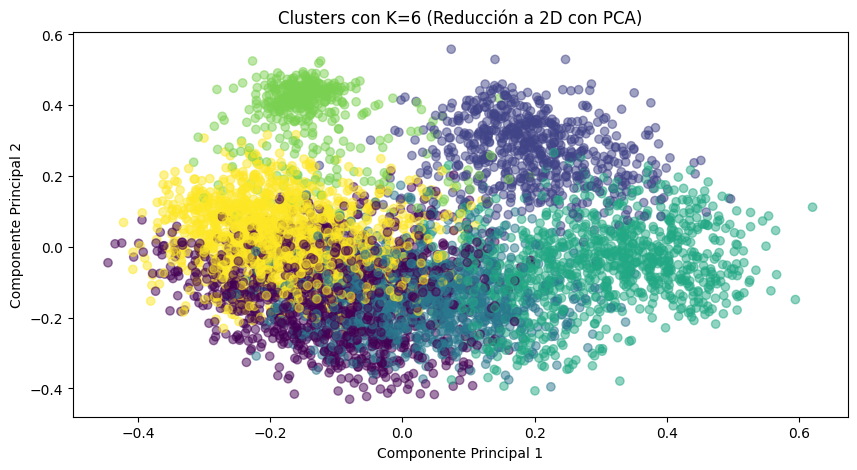

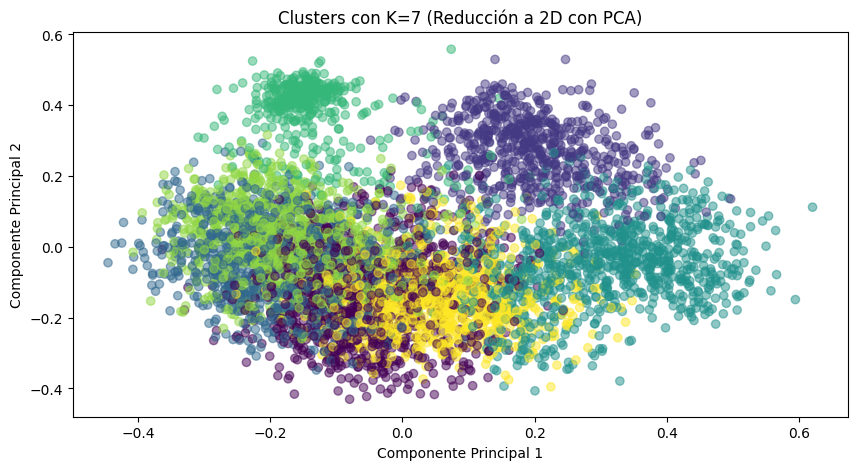

In [13]:
from sklearn.decomposition import PCA

# Se reduce a 2D con PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Grafico para clusters K=6
plt.figure(figsize=(10, 5))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=kmeans_6.labels_, cmap='viridis', alpha=0.5)
plt.title("Clusters con K=6 (Reducción a 2D con PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

# Grafico para clusters K=7
plt.figure(figsize=(10, 5))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=kmeans_7.labels_, cmap='viridis', alpha=0.5)
plt.title("Clusters con K=7 (Reducción a 2D con PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


#### **AGRUPAMIENTO Y VALIDACIÓN**
#### Finalmente, **exportamos cada cluster** por separado para la **agrupación general** y la **verificación manual asistida.**
#### También se agrupan aquellas **categorías desfazadas o fuera de lugar** en cada cluster para finalmente agruparlas según corresponda.



In [16]:
# Exportar cada cluster a un archivo CSV para su revisión
for cluster_num in range(k_optimo):
    cluster_data = categories_group[categories_group['cluster'] == cluster_num]
    cluster_data.to_csv(f'cluster_{cluster_num}_para_revision.csv', index=False)


In [45]:
cluster_zero = pd.read_csv('cluster_0_para_revision.csv')
cluster_one = pd.read_csv('cluster_1_para_revision.csv')
cluster_two = pd.read_csv('cluster_2_para_revision.csv')
cluster_three = pd.read_csv('cluster_3_para_revision.csv')
cluster_four = pd.read_csv('cluster_4_para_revision.csv')
cluster_five = pd.read_csv('cluster_5_para_revision.csv')
cluster_six = pd.read_csv('cluster_6_para_revision.csv')    

#### **CLUSTER 0**

In [32]:
cluster_zero

category  category_id category_general  cluster
0                          doctors            1            Otros        0
1     traditional chinese medicine            2            Otros        0
2            naturopathic/holistic            3            Otros        0
3                      acupuncture            4            Otros        0
4                 health & medical            5  Salud y Cuidado        0
...                            ...          ...              ...      ...
1145                       plastic         5680            Otros        0
1146                         agent         5687            Otros        0
1147                  book printer         5701            Otros        0
1148                         fault         5704            Otros        0
1149               waste container         5705            Otros        0

[1150 rows x 4 columns]

In [33]:
# Reasignar la categoría general de todas las categorías en el Cluster 0 a "Salud y Cuidado"
cluster_zero['category_general'] = 'Salud y Cuidado'

# Revisar si hay categorías que no encajan claramente con "Salud y Cuidado"
categorias_unicas = cluster_zero['category'].unique()
categorias_unicas


array(['doctors', 'traditional chinese medicine', 'naturopathic/holistic',
       ..., 'book printer', 'fault', 'waste container'], dtype=object)

#### **Categorías fuera de lugar (cluster 0)**

In [34]:
# Filtrar las categorías que parecen no estar relacionadas con "Salud y Cuidado"
categorias_fuera_de_lugar = cluster_zero[cluster_zero['category'].isin(['book printer', 'fault', 'waste container'])]

# Mostrar las categorías que parecen fuera de lugar
categorias_fuera_de_lugar


category  category_id category_general  cluster
1147     book printer         5701  Salud y Cuidado        0
1148            fault         5704  Salud y Cuidado        0
1149  waste container         5705  Salud y Cuidado        0

#### **CLUSTER 1**

In [55]:
cluster_one

category  category_id    category_general  cluster
0    department stores           12  Comercio y Tiendas        1
1             shopping           13  Comercio y Tiendas        1
2     furniture stores           17  Comercio y Tiendas        1
3          shoe stores           30  Comercio y Tiendas        1
4           vape shops           54  Comercio y Tiendas        1
5        tobacco shops           55  Comercio y Tiendas        1
6    personal shopping           56  Comercio y Tiendas        1
7           bookstores           67  Comercio y Tiendas        1
8  children's clothing           76  Comercio y Tiendas        1
9          pasta shops          111  Comercio y Tiendas        1

In [41]:
# Reasignar la categoría general de todas las categorías en el Cluster 1 a "Comercio y Tiendas"
cluster_one['category_general'] = 'Comercio y Tiendas'

# Revisar si hay categorías que no encajan claramente con "Salud y Cuidado"
categorias_unicas = cluster_one['category'].unique()
categorias_unicas

array(['department stores', 'shopping', 'furniture stores', 'shoe stores',
       'vape shops', 'tobacco shops', 'personal shopping', 'bookstores',
       "children's clothing", 'pasta shops', 'candle stores', 'grocery',
       'convenience stores', 'chocolatiers & shops', 'candy stores',
       'baby gear & furniture', 'nail salons', 'body shops',
       'auction houses', 'drugstores', 'discount store', 'gift shops',
       'hardware stores', 'organic stores', 'patisserie/cake shop',
       'toy stores', 'hobby shops', 'art supplies', 'video game stores',
       'chicken shop', 'party supplies', 'machine shops',
       'photography stores & services', 'wholesale stores', 'head shops',
       'pet stores', 'shopping centers', 'leather goods',
       'bespoke clothing', 'farmers market', 'laundromat',
       'fabric stores', 'trophy shops', 'outlet stores', 'pawn shops',
       'outdoor furniture stores', 'paint stores', 'souvenir shops',
       'thrift stores', 'international grocery',

#### **Categorías fuera de lugar (cluster 1)**

In [42]:
# Identificar las categorías fuera de lugar en el Cluster 1
categorias_fuera_de_lugar_cluster_1 = cluster_one[
    cluster_one['category'].isin(['nail salons', 'storefront clinics', 'medical supply store', 'concierge desk'])
]

# Mostrar las categorías fuera de lugar para tenerlas en cuenta más adelante
categorias_fuera_de_lugar_cluster_1


category  category_id    category_general  cluster
16            nail salons          164  Comercio y Tiendas        1
84     storefront clinics         1289  Comercio y Tiendas        1
92   medical supply store         1352  Comercio y Tiendas        1
639        concierge desk         5601  Comercio y Tiendas        1

#### **CLUSTER 2**

In [46]:
cluster_two

category  category_id             category_general  \
0                mailbox centers           10  Educación y Entretenimiento   
1                     synagogues           33                        Otros   
2        religious organizations           34                        Otros   
3                        museums           98                        Otros   
4                      education          100                        Otros   
..                           ...          ...                          ...   
750                       atrium         5678                        Otros   
751                   wax museum         5686                        Otros   
752  technical education academy         5693                        Otros   
753               beauty academy         5694                        Otros   
754       political organization         5697                        Otros   

     cluster  
0          2  
1          2  
2          2  
3          2  
4          2  
..       ...  
750        2  
751        2  
752        2  
753        2  
754        2  

[755 rows x 4 columns]

In [47]:
# Reasignar la categoría general de todas las categorías en el Cluster 2 a "Educación y Entretenimiento"
cluster_two['category_general'] = 'Educación y Entretenimiento'

# Obtener las categorías únicas del Cluster 2
categorias_unicas_cluster_2 = cluster_two['category'].unique()
categorias_unicas_cluster_2


array(['mailbox centers', 'synagogues', 'religious organizations',
       'museums', 'education', "children's museums",
       'weight loss centers', 'home decor', 'fitness & instruction',
       'real estate', 'libraries', 'parenting classes',
       'specialty schools', 'medical centers', 'art classes',
       'meditation centers', 'apartments', 'condominiums', 'public art',
       'preschools', 'elementary schools', 'animal shelters',
       'guest houses', 'churches', 'family practice', 'interior design',
       'walk-in clinics', 'cosmetology schools', 'hospitals',
       'cannabis clinics', 'art schools', 'challenge courses',
       'university housing', 'virtual reality centers',
       'community centers', 'tea rooms', 'recycling center',
       'haunted houses', 'tutoring centers', 'adult education',
       'dance studios', 'shared office spaces', 'donation center',
       'rehabilitation center', 'home staging',
       'landmarks & historical buildings', 'home theatre install

#### **Categorías fuera de lugar (cluster 2)**

In [48]:
# Identificar las categorías fuera de lugar en el Cluster 2
categorias_fuera_de_lugar_cluster_2 = cluster_two[
    cluster_two['category'].isin(['synagogues', 'religious organizations', 'churches', 'wedding chapels',
                                   'real estate', 'apartments', 'condominiums', 'medical centers',
                                   'family practice', 'hospitals'])
]

# Mostrar las categorías fuera de lugar para tenerlas en cuenta más adelante
categorias_fuera_de_lugar_cluster_2


category  category_id             category_general  cluster
1                synagogues           33  Educación y Entretenimiento        2
2   religious organizations           34  Educación y Entretenimiento        2
9               real estate          137  Educación y Entretenimiento        2
13          medical centers          226  Educación y Entretenimiento        2
16               apartments          291  Educación y Entretenimiento        2
17             condominiums          294  Educación y Entretenimiento        2
23                 churches          395  Educación y Entretenimiento        2
24          family practice          398  Educación y Entretenimiento        2
28                hospitals          449  Educación y Entretenimiento        2
75          wedding chapels          936  Educación y Entretenimiento        2

#### **CLUSTER 3**

In [49]:
cluster_three

category  category_id         category_general  \
0                     food trucks           42      Alimentos y Bebidas   
1                      automotive           51   Vehículos y Transporte   
2           auto parts & supplies           52   Vehículos y Transporte   
3                     contractors          183      Servicios Generales   
4               knitting supplies          262                    Otros   
..                            ...          ...                      ...   
873                  karma dealer         5653                    Otros   
874             pipe manufacturer         5654  Industria y Manufactura   
875         clothing manufacturer         5665       Comercio y Tiendas   
876  recycling collection company         5674      Servicios Generales   
877               apparel company         5696      Servicios Generales   

     cluster  
0          3  
1          3  
2          3  
3          3  
4          3  
..       ...  
873        3  
874        3  
875        3  
876        3  
877        3  

[878 rows x 4 columns]

In [50]:
# Reasignar la categoría general de todas las categorías en el Cluster 3 a "Vehículos y Transporte"
cluster_three['category_general'] = 'Vehículos y Transporte'

# Obtener las categorías únicas del Cluster 3
categorias_unicas_cluster_3 = cluster_three['category'].unique()
categorias_unicas_cluster_3


array(['food trucks', 'automotive', 'auto parts & supplies',
       'contractors', 'knitting supplies', 'street vendors',
       'trailer dealers', 'rv dealers', 'car dealers', 'used car dealers',
       'wholesalers', 'building supplies', 'medical supplies',
       'brewing supplies', 'cosmetics & beauty supply', 'carpenters',
       'junk removal & hauling', 'metal fabricators',
       'wheel & rim repair', 'gold buyers', 'vintage & consignment',
       'kitchen supplies', 'packing supplies', 'commercial truck repair',
       'motorsport vehicle dealers', 'motorcycle dealers',
       'structural engineers', 'water suppliers', 'car buyers',
       'car auctions', 'grilling equipment', 'junkyards',
       'motorcycle parts & supplies', 'farming equipment', 'boat dealers',
       'livestock feed & supply', 'commercial truck dealers',
       'hydro-jetting', 'car brokers', 'coffee & tea supplies',
       'vehicle shipping', 'car inspectors', 'golf cart dealers',
       'product design', 

#### **Categorías fuera de lugar (cluster 3)**

In [51]:
# Identificar las categorías fuera de lugar en el Cluster 3
categorias_fuera_de_lugar_cluster_3 = cluster_three[
    cluster_three['category'].isin(['knitting supplies', 'sewing company', 'film production company',
                                   'promotional products supplier', 'furniture manufacturer', 'customs broker',
                                   'business management consultant', 'financial consultant'])
]

# Mostrar las categorías fuera de lugar para tenerlas en cuenta más adelante
categorias_fuera_de_lugar_cluster_3


category  category_id        category_general  \
4                 knitting supplies          262  Vehículos y Transporte   
139                  sewing company         1876  Vehículos y Transporte   
141                  customs broker         1885  Vehículos y Transporte   
143          furniture manufacturer         1908  Vehículos y Transporte   
148   promotional products supplier         1935  Vehículos y Transporte   
163  business management consultant         2019  Vehículos y Transporte   
178         film production company         2096  Vehículos y Transporte   
200            financial consultant         2226  Vehículos y Transporte   

     cluster  
4          3  
139        3  
141        3  
143        3  
148        3  
163        3  
178        3  
200        3

#### **CLUSTER 4**

In [52]:
# Reasignar la categoría general de todas las categorías en el Cluster 4 a "Alimentos y Bebidas"
cluster_four['category_general'] = 'Alimentos y Bebidas'

# Obtener las categorías únicas del Cluster 4
categorias_unicas_cluster_4 = cluster_four['category'].unique()
categorias_unicas_cluster_4

array(['restaurants', 'food', 'bakeries', 'burgers', 'fast food',
       'sandwiches', 'diners', 'breakfast & brunch', 'sushi bars',
       'cafes', 'steakhouses', 'seafood', 'pizza', 'eatertainment',
       'specialty food', 'internet cafes', 'caterers',
       'juice bars & smoothies', 'local flavor', 'fruits & veggies',
       'cajun/creole', 'desserts', 'do-it-yourself food', 'barbeque',
       'donuts', 'soul food', 'tapas/small plates', 'irish pub',
       'ethnic food', 'food tours', 'comfort food', 'acai bowls',
       'food stands', 'seafood markets', 'kitchen & bath', 'buffets',
       'tacos', 'imported food', 'cheesesteaks', 'fish & chips',
       'wine tasting room', 'themed cafes', 'food court',
       'hong kong style cafe', 'new mexican cuisine', 'tasting classes',
       'pop-up restaurants', 'ethnic grocery', 'restaurant supplies',
       'food banks', 'bistros', 'parent cafes', 'japanese curry',
       'dinner theater', 'supper clubs', 'hotel bar',
       'cheese tas

#### **Categorías fuera de lugar (cluster 4)**

In [53]:
# Identificar las categorías fuera de lugar en el Cluster 4
categorias_fuera_de_lugar_cluster_4 = cluster_four[
    cluster_four['category'].isin(['kitchen & bath', 'restaurant supplies', 'food production', 'hotel bar'])
]

# Mostrar las categorías fuera de lugar para tenerlas en cuenta más adelante
categorias_fuera_de_lugar_cluster_4

category  category_id     category_general  cluster
34        kitchen & bath          403  Alimentos y Bebidas        4
48   restaurant supplies         1010  Alimentos y Bebidas        4
55             hotel bar         1253  Alimentos y Bebidas        4
359      food production         5386  Alimentos y Bebidas        4

#### **CLUSTER 5**

In [54]:
cluster_five

category  category_id             category_general  \
0               home & garden           15            Inmuebles y Hogar   
1                   breweries           24                        Otros   
2              sporting goods           29                        Otros   
3                 sports wear           31  Educación y Entretenimiento   
4                        pubs           35                        Otros   
..                        ...          ...                          ...   
955         indoor snowcenter         5681  Educación y Entretenimiento   
956                  aqueduct         5689                        Otros   
957  inclined railway station         5690       Vehículos y Transporte   
958      coin operated locker         5691                        Otros   
959                volleyball         5700                        Otros   

     cluster  
0          5  
1          5  
2          5  
3          5  
4          5  
..       ...  
955        5  
956        5  
957        5  
958        5  
959        5  

[960 rows x 4 columns]

In [56]:
# Reasignar la categoría general de todas las categorías en el Cluster 5 a "Inmuebles y Hogar"
cluster_five['category_general'] = 'Inmuebles y Hogar'


# Obtener las categorías únicas del Cluster 5
categorias_unicas_cluster_5 = cluster_five['category'].unique()
categorias_unicas_cluster_5

array(['home & garden', 'breweries', 'sporting goods', 'sports wear',
       'pubs', 'bars', 'nightlife', 'hotels & travel', 'wine bars',
       'cocktail bars', 'chicken wings', 'trampoline parks', 'dance wear',
       'social clubs', 'hotels', 'kids activities', 'playgrounds',
       'karaoke', 'music venues', 'jazz & blues', 'gyms', 'sports bars',
       'beer bar', 'tours', 'towing', 'motorcycle rental',
       'motorcycle gear', 'tabletop games', 'lounges', 'festivals',
       'beer', 'gas stations', 'venues & event spaces',
       'masonry/concrete', 'party & event planning', 'beer gardens',
       'wine tours', 'beer tours', 'hot tub & pool', 'tires', 'buses',
       'transportation', 'bus tours', 'airport shuttles',
       'public transportation', 'decks & railing', 'basketball courts',
       'stadiums & arenas', 'professional sports teams', 'parks',
       'swimming pools', 'dog parks', 'cinema', 'resorts', 'day spas',
       'wildlife control', 'roofing', 'vacation rentals',

#### **Categorías fuera de lugar (cluster 5)**

In [57]:
# Identificar las categorías fuera de lugar en el Cluster 5
categorias_fuera_de_lugar_cluster_5 = cluster_five[
    cluster_five['category'].isin(['bars', 'wine bars', 'cocktail bars', 'whiskey bars', 'dive bars', 'beer bar', 
                                   'beer gardens', 'motorcycle rental', 'motorcycle gear', 'rv rental', 'taxis',
                                   'airport shuttles', 'day spas', 'wildlife control', 'roofing', 'sports wear',
                                   'breweries', 'pubs', 'nightlife', 'sporting goods'])
]

# Mostrar las categorías fuera de lugar para tenerlas en cuenta más adelante
categorias_fuera_de_lugar_cluster_5

category  category_id   category_general  cluster
1            breweries           24  Inmuebles y Hogar        5
2       sporting goods           29  Inmuebles y Hogar        5
3          sports wear           31  Inmuebles y Hogar        5
4                 pubs           35  Inmuebles y Hogar        5
5                 bars           37  Inmuebles y Hogar        5
6            nightlife           39  Inmuebles y Hogar        5
8            wine bars           63  Inmuebles y Hogar        5
9        cocktail bars           80  Inmuebles y Hogar        5
22            beer bar          149  Inmuebles y Hogar        5
25   motorcycle rental          155  Inmuebles y Hogar        5
26     motorcycle gear          156  Inmuebles y Hogar        5
35        beer gardens          200  Inmuebles y Hogar        5
43    airport shuttles          250  Inmuebles y Hogar        5
54            day spas          286  Inmuebles y Hogar        5
55    wildlife control          290  Inmuebles y Hogar        5
56             roofing          292  Inmuebles y Hogar        5
63           rv rental          311  Inmuebles y Hogar        5
83        whiskey bars          438  Inmuebles y Hogar        5
98               taxis          510  Inmuebles y Hogar        5
102          dive bars          525  Inmuebles y Hogar        5

#### **CLUSTER 6**

In [58]:
cluster_six

category  category_id             category_general  \
0               shipping centers            7  Educación y Entretenimiento   
1                 local services            8          Servicios Generales   
2              printing services           11          Servicios Generales   
3                     car rental           58       Vehículos y Transporte   
4                   truck rental           60                        Otros   
..                           ...          ...                          ...   
888     fire proofing contractor         5682          Servicios Generales   
889              ritual services         5683          Servicios Generales   
890           chartered surveyor         5684                        Otros   
891             state owned farm         5685      Industria y Manufactura   
892  self service health station         5703          Servicios Generales   

     cluster  
0          6  
1          6  
2          6  
3          6  
4          6  
..       ...  
888        6  
889        6  
890        6  
891        6  
892        6  

[893 rows x 4 columns]

In [59]:
# Reasignar la categoría general de todas las categorías en el Cluster 6 a "Servicios Generales"
cluster_six['category_general'] = 'Servicios Generales'

# Obtener las categorías únicas del Cluster 6
categorias_unicas_cluster_6 = cluster_six['category'].unique()
categorias_unicas_cluster_6

array(['shipping centers', 'local services', 'printing services',
       'car rental', 'truck rental', 'pet services',
       'event planning & services', 'telecommunications',
       'it services & computer repair', 'professional services',
       'internet service providers', 'real estate agents',
       'home services', 'health markets', 'appliances & repair',
       'banks & credit unions', 'financial services',
       'personal care services', 'keys & locksmiths', 'lawn services',
       'tree services', 'mortgage brokers', 'mortgage lenders',
       'couriers & delivery services', 'public services & government',
       'food delivery services', 'laundry services',
       'child care & day care', 'door sales/installation',
       'pool & hot tub service', 'auto repair', 'oil change stations',
       'diagnostic services', 'auto detailing', 'title loans',
       'installment loans', 'check cashing/pay-day loans',
       'travel agents', 'travel services', 'eyelash service',
       

#### **Categorías fuera de lugar (cluster 6)**

In [60]:
# Identificar las categorías fuera de lugar en el Cluster 6
categorias_fuera_de_lugar_cluster_6 = cluster_six[
    cluster_six['category'].isin(['beach cleaning service', 'environment office', 'reenactment site',
                                   'stall installation service', 'train ticket agency', 'houseboat rental service',
                                   'city government office', 'community service', 'election commission',
                                   'social security financial department'])
]

# Mostrar las categorías fuera de lugar para tenerlas en cuenta más adelante
categorias_fuera_de_lugar_cluster_6

category  category_id     category_general  \
275                city government office         1570  Servicios Generales   
822                beach cleaning service         5143  Servicios Generales   
823                    environment office         5151  Servicios Generales   
825                      reenactment site         5184  Servicios Generales   
828            stall installation service         5190  Servicios Generales   
831                   train ticket agency         5204  Servicios Generales   
851                   election commission         5350  Servicios Generales   
853                     community service         5381  Servicios Generales   
854              houseboat rental service         5387  Servicios Generales   
856  social security financial department         5408  Servicios Generales   

     cluster  
275        6  
822        6  
823        6  
825        6  
828        6  
831        6  
851        6  
853        6  
854        6  
856        6

---

### **REASIGNACIÓN DE LAS CATEGORÍAS FUERA DE LUGAR**

#### Se aplicó una **revisión manual asistida** a cada clúster para identificar aquellas categorías que no encajaban en su grupo general, con el fin de poder **reagruparlas** según el diccionario de categorías previamente definido.

#### **CLUSTER 0**

In [89]:
# Reasignar las categorías fuera de lugar según el diccionario inicialuera de lugar según el diccionario inicial
reasignaciones_cluster_0 = {
    'book printer': 'Servicios Generales',              # Relacionado con servicios de impresión y distribución
    'fault': 'Industria y Manufactura',                 # Podría estar relacionado con problemas técnicos o mantenimiento
    'waste container': 'Industria y Manufactura',       # Relacionado con servicios de desecho o contenedores industrialeservicios de desecho o contenedores industriales
    'notaries': 'Servicios Profesionales',              # Servicios legales
    'electronics': 'Comercio y Tiendas',                # Productos electrónicoslectrónicos
    'fashion': 'Comercio y Tiendas',                    # Moda y roparopa
    'bubble tea': 'Alimentos y Bebidas',                # Bebidas
    'coffee & tea': 'Alimentos y Bebidas',              # Bebidas
    'brewpubs': 'Alimentos y Bebidas',                  # Bebidas alcohólicass
    'accessories': 'Comercio y Tiendas',                # Accesorios de moda
    'pet groomers': 'Mascotas y Veterinaria',           # Servicios para mascotasotas
    'pets': 'Mascotas y Veterinaria',                   # Tiendas de mascotasascotas
    'veterinarians': 'Mascotas y Veterinaria',          # Veterinarios
    'women\'s clothing': 'Comercio y Tiendas',          # Ropa femenina
    'men\'s clothing': 'Comercio y Tiendas',            # Ropa masculina
    'adult': 'Servicios Generales',                     # Productos para adultosltos
    'arts & entertainment': 'Educación y Entretenimiento', # Entretenimientonto
    'performing arts': 'Educación y Entretenimiento',   # Artes escénicas
    'mobile phones': 'Comercio y Tiendas',              # Teléfonos móviles
    'mobile phone accessories': 'Comercio y Tiendas',   # Accesorios para móviles
    'musicians': 'Educación y Entretenimiento',         # Música y entretenimientoento
    'djs': 'Educación y Entretenimiento',               # DJ y entretenimiento
    'landscaping': 'Servicios Generales',               # Servicios de jardineríade jardinería
    'gardeners': 'Servicios Generales',                 # Jardineros
    'landscape architects': 'Servicios Generales',      # Arquitectos paisajistasctos paisajistas
    'jewelry': 'Comercio y Tiendas',                    # Joyería
    'flowers & gifts': 'Comercio y Tiendas',            # Flores y regalos
    'flooring': 'Inmuebles y Hogar',                    # Pisos y revestimientos
    'handyman': 'Inmuebles y Hogar',                    # Servicios de reparaciónración
    'pest control': 'Inmuebles y Hogar',                # Control de plagas
    'custom cakes': 'Alimentos y Bebidas',              # Pasteles personalizados personalizados
    'cupcakes': 'Alimentos y Bebidas',                  # Cupcakes
    'comic books': 'Educación y Entretenimiento',       # Libros de cómicsics
    'music & dvds': 'Educación y Entretenimiento',      # Música y DVDs
    'painters': 'Inmuebles y Hogar',                    # Pintores de interiores/exterioreses
    'pressure washers': 'Servicios Generales',          # Servicios de limpieza a presióna a presión
    'window washing': 'Servicios Generales',            # Limpieza de ventanasas
    'home cleaning': 'Servicios Generales',             # Limpieza del hogar
    'office cleaning': 'Servicios Generales',           # Limpieza de oficinas
    'carpet cleaning': 'Servicios Generales',           # Limpieza de alfombrasde alfombras
    'bed & breakfast': 'Hoteles y Viajes',              # Hospedajee
    'tattoo': 'Servicios Generales',                    # Tatuajes
    'piercing': 'Servicios Generales',                  # Piercing corporal
    'wedding planning': 'Servicios Profesionales',      # Planificación de bodas
    'officiants': 'Servicios Profesionales',            # Oficiales para ceremoniasias
    'session photography': 'Servicios Profesionales',   # Fotografía de sesioness
    'event photography': 'Servicios Profesionales',     # Fotografía de eventos
    'pet photography': 'Servicios Profesionales',       # Fotografía de mascotascotas
    'appliances': 'Inmuebles y Hogar',                  # Electrodomésticosésticos
    'plumbing': 'Inmuebles y Hogar',                    # Fontaneríaa
    'carpeting': 'Inmuebles y Hogar',                   # Alfombrasas
    'rugs': 'Inmuebles y Hogar',                        # Tapetes
    'windows installation': 'Inmuebles y Hogar',        # Instalación de ventanasón de ventanas
    'cabinetry': 'Inmuebles y Hogar',                   # Gabinetes
    'shutters': 'Inmuebles y Hogar',                    # Persianas
    'siding': 'Inmuebles y Hogar',                      # Revestimientosntos
    'wallpapering': 'Inmuebles y Hogar',                # Empapelado
    'furniture reupholstery': 'Inmuebles y Hogar',      # Tapizado de muebles
    'shoe repair': 'Servicios Generales',               # Reparación de calzado
    'sewing & alterations': 'Servicios Generales',      # Costura y alteracionesiones
    'irrigation': 'Servicios Generales',                # Sistemas de riego
    'nurseries & gardening': 'Servicios Generales',     # Viveros y jardineríaardinería
    'parasailing': 'Hoteles y Viajes',                  # Paravelismo
    'musical instruments & teachers': 'Educación y Entretenimiento', # Instrumentos musicales y clasesstrumentos musicales y clases
    'wineries': 'Alimentos y Bebidas',                  # Bodegas de vino
    'coffee roasteries': 'Alimentos y Bebidas',         # Tostadoras de caféde café
    'formal wear': 'Comercio y Tiendas',                # Ropa formal
    'bridal': 'Comercio y Tiendas',                     # Ropa de boda
    'props': 'Educación y Entretenimiento',             # Accesorios para entretenimientos para entretenimiento
    'costumes': 'Educación y Entretenimiento',          # Disfraces
    'dry cleaning': 'Servicios Generales',              # Tintorería
    'vehicle wraps': 'Vehículos y Transporte',          # Rotulación de vehículos
    'car window tinting': 'Vehículos y Transporte',     # Tintado de ventanas de autos
    'home window tinting': 'Inmuebles y Hogar',         # Tintado de ventanas del hogar ventanas del hogar
    'photographers': 'Servicios Profesionales',         # Fotógrafos
    'furniture assembly': 'Inmuebles y Hogar',          # Ensamblaje de muebles
    'carpet installation': 'Inmuebles y Hogar',         # Instalación de alfombrastalación de alfombras
    'tiling': 'Inmuebles y Hogar',                      # Instalación de baldosas
    'tv mounting': 'Inmuebles y Hogar',                 # Montaje de televisores
    'electricians': 'Inmuebles y Hogar',                # Electricistas para hogar
    'shades & blinds': 'Inmuebles y Hogar',             # Persianas y cortinas
    'shoe shine': 'Servicios Generales',                # Limpieza de calzado
    'architects': 'Servicios Profesionales',            # Arquitectos
    'framing': 'Inmuebles y Hogar',                     # Marcos y enmarcados
    'laser tag': 'Educación y Entretenimiento',         # Entretenimiento láser
    'paint & sip': 'Educación y Entretenimiento',       # Pintura con bebidas
    'signmaking': 'Servicios Generales',                # Fabricación de letreros
    'engraving': 'Servicios Generales',                 # Grabado de materiales
    'screen printing': 'Servicios Generales',           # Serigrafía
    'guns & ammo': 'Servicios Generales',               # Armas y municiones
    'firearm training': 'Servicios Generales',          # Entrenamiento en armas de fuego
    'adult entertainment': 'Servicios Generales',       # Entretenimiento para adultos
    'lingerie': 'Comercio y Tiendas',                   # Lencería
    'psychics': 'Servicios Religiosos',                 # Servicios psíquicos
    'supernatural readings': 'Servicios Religiosos',    # Lecturas sobrenaturales
    'psychic mediums': 'Servicios Religiosos',          # Médiums psíquicos
    'kombucha': 'Alimentos y Bebidas',                  # Bebida de kombucha
    'herbs & spices': 'Alimentos y Bebidas',            # Hierbas y especias
    'butcher': 'Alimentos y Bebidas',                   # Carnicería
    'falafel': 'Alimentos y Bebidas',                   # Falafel
    'peruvian': 'Alimentos y Bebidas',                  # Comida peruana
    'lebanese': 'Alimentos y Bebidas',                  # Comida libanesa
    'turkish': 'Alimentos y Bebidas',                   # Comida turca
    'creperies': 'Alimentos y Bebidas',                 # Creperías
    'kebab': 'Alimentos y Bebidas',                     # Kebab
    'cuban': 'Alimentos y Bebidas',                     # Comida cubana
    'sicilian': 'Alimentos y Bebidas',                  # Comida siciliana
    'sardinian': 'Alimentos y Bebidas',                 # Comida sarda
    'laotian': 'Alimentos y Bebidas',                   # Comida laosiana
    'ethiopian': 'Alimentos y Bebidas',                 # Comida etíope
    'teppanyaki': 'Alimentos y Bebidas',                # Comida teppanyaki
    'mass media': 'Educación y Entretenimiento',        # Medios de comunicación
    'print media': 'Educación y Entretenimiento',       # Medios impresos
    'religious items': 'Servicios Religiosos',          # Artículos religiosos
    'personal injury law': 'Servicios Profesionales',   # Ley de lesiones personales
    'employment law': 'Servicios Profesionales',        # Ley laboral
    'divorce & family law': 'Servicios Profesionales',  # Ley de divorcio y familia
    'accountants': 'Servicios Profesionales',  # Contadores
    'financial advising': 'Servicios Profesionales',  # Asesoría financiera
    'investing': 'Servicios Profesionales',  # Inversiones
    'taxidermy': 'Servicios Generales',  # Taxidermia
    'web design': 'Servicios Profesionales',  # Diseño web
    'graphic design': 'Servicios Profesionales',  # Diseño gráfico
    'marketing': 'Servicios Profesionales',  # Marketing
    'advertising': 'Servicios Profesionales',  # Publicidad
    'house sitters': 'Servicios Generales',  # Cuidadores de casas
    'florists': 'Comercio y Tiendas',  # Floristerías
    'furniture assembly': 'Inmuebles y Hogar',  # Montaje de muebles
    'kebab': 'Alimentos y Bebidas',  # Kebab
    'turkish': 'Alimentos y Bebidas',  # Comida turca
    'laser tag': 'Educación y Entretenimiento',  # Juego de láser
    'paint & sip': 'Educación y Entretenimiento',  # Pintura con bebidas
    'signmaking': 'Servicios Generales',  # Fabricación de letreros
    'guns & ammo': 'Servicios Generales',  # Armas y municiones
    'lebanese': 'Alimentos y Bebidas',  # Comida libanesa
    'gelato': 'Alimentos y Bebidas',  # Helado tipo gelato
    'carpet installation': 'Inmuebles y Hogar',  # Instalación de alfombras
    'tiling': 'Inmuebles y Hogar',  # Instalación de baldosas
    'creperies': 'Alimentos y Bebidas',  # Creperías
    'mass media': 'Educación y Entretenimiento',  # Medios de comunicación
    'adult entertainment': 'Servicios Generales',  # Entretenimiento para adultos
    'lingerie': 'Comercio y Tiendas',  # Lencería
    'falafel': 'Alimentos y Bebidas',  # Falafel
    'psychics': 'Servicios Religiosos',  # Servicios psíquicos
    'supernatural readings': 'Servicios Religiosos',  # Lecturas sobrenaturales
    'psychic mediums': 'Servicios Religiosos',  # Médiums psíquicos
    'engraving': 'Servicios Generales',  # Grabado
    'graphic design': 'Servicios Profesionales',  # Diseño gráfico
    'kombucha': 'Alimentos y Bebidas',  # Bebida de kombucha
    'taxidermy': 'Servicios Generales',  # Taxidermia
    'vinyl records': 'Educación y Entretenimiento',  # Discos de vinilo
    'hydroponics': 'Servicios Generales',  # Hidroponía
    'peruvian': 'Alimentos y Bebidas',  # Comida peruana
    'herbs & spices': 'Alimentos y Bebidas',  # Hierbas y especias
    'butcher': 'Alimentos y Bebidas',  # Carnicería
    'tv mounting': 'Inmuebles y Hogar',  # Montaje de televisores
    'malaysian': 'Alimentos y Bebidas',  # Comida malaya
    'burmese': 'Alimentos y Bebidas',  # Comida birmana
    'electricians': 'Inmuebles y Hogar',  # Electricistas
    'shades & blinds': 'Inmuebles y Hogar',  # Persianas y cortinasanas y cortinas
    'cuban': 'Alimentos y Bebidas',  # Comida cubana
    'divorce & family law': 'Servicios Profesionales',  # Derecho de familia
    'architects': 'Servicios Profesionales',  # Arquitectos
    'sicilian': 'Alimentos y Bebidas',  # Comida siciliana
    'shoe shine': 'Servicios Generales',  # Limpieza de calzado
    'floral designers': 'Comercio y Tiendas',  # Diseño floral
    'computers': 'Comercio y Tiendas',  # Computadoras
    'marketing': 'Servicios Profesionales',  # Marketing
    'web design': 'Servicios Profesionales',  # Diseño web
    'advertising': 'Servicios Profesionales',  # Publicidad
    'screen printing': 'Servicios Generales',  # Serigrafía
    'financial advising': 'Servicios Profesionales',  # Asesoría financiera
    'accountants': 'Servicios Profesionales',  # Contadores
    'investing': 'Servicios Profesionales',  # Inversiones
    'firearm training': 'Servicios Generales',  # Entrenamiento en armas
    'sardinian': 'Alimentos y Bebidas',  # Comida sarda
    'laotian': 'Alimentos y Bebidas',  # Comida laosiana
    'teppanyaki': 'Alimentos y Bebidas',  # Comida teppanyaki
    'framing': 'Inmuebles y Hogar',  # Marcos y enmarcados
    'print media': 'Educación y Entretenimiento',  # Medios impresos
    'persian/iranian': 'Alimentos y Bebidas',  # Comida persa/iraní
    'cosmetic surgeons': 'Servicios Profesionales',  # Cirujanos cosméticos
    'bookkeepers': 'Servicios Profesionales',  # Tenedores de libros
    'general litigation': 'Servicios Profesionales',  # Litigio general
    'modern european': 'Alimentos y Bebidas',  # Comida europea moderna
    'pan asian': 'Alimentos y Bebidas',  # Comida panasiática
    'cards & stationery': 'Comercio y Tiendas',  # Tarjetas y papelería
    'german': 'Alimentos y Bebidas',  # Comida alemana
    'private investigation': 'Servicios Profesionales',  # Investigación privada
    'arabic': 'Alimentos y Bebidas',  # Comida árabe
    'argentine': 'Alimentos y Bebidas',  # Comida argentina
    'gunsmith': 'Servicios Generales',  # Armero
    'waterproofing': 'Servicios Generales',  # Impermeabilización
    'paint-your-own pottery': 'Educación y Entretenimiento',  # Pintura de cerámica
    'portuguese': 'Alimentos y Bebidas',  # Comida portuguesa
    'dim sum': 'Alimentos y Bebidas',  # Dim sum
    'clock repair': 'Servicios Generales',  # Reparación de relojes
    'fondue': 'Alimentos y Bebidas',  # Fondue
    'snow removal': 'Servicios Generales',  # Remoción de nieve
    'karate': 'Educación y Entretenimiento',  # Karate
    'kosher': 'Alimentos y Bebidas',  # Comida kosher
    'glass blowing': 'Educación y Entretenimiento',  # Soplado de vidrio
    'chimney sweeps': 'Servicios Generales',  # Deshollinadores
    'macarons': 'Alimentos y Bebidas',  # Macarrones
    'home developers': 'Inmuebles y Hogar',  # Desarrolladores de viviendas
    'cantonese': 'Alimentos y Bebidas',  # Comida cantonesa
    'auto upholstery': 'Vehículos y Transporte',  # Tapicería de autos
    'personal assistants': 'Servicios Profesionales',  # Asistentes personales
    'salvadoran': 'Alimentos y Bebidas',  # Comida salvadoreña
    'mongolian': 'Alimentos y Bebidas',  # Comida mongola
    'magicians': 'Educación y Entretenimiento',  # Magos
    'halotherapy': 'Servicios Generales',  # Haloterapia
    'colombian': 'Alimentos y Bebidas',  # Comida colombiana
    'brazilian': 'Alimentos y Bebidas',  # Comida brasileña
    'haitian': 'Alimentos y Bebidas',  # Comida haitiana
    'russian': 'Alimentos y Bebidas',  # Comida rusa
    'czech': 'Alimentos y Bebidas',  # Comida checa
    'himalayan/nepalese': 'Alimentos y Bebidas',  # Comida nepalí/himalaya
    'delicatessen': 'Alimentos y Bebidas',  # Delicatesen
    'polish': 'Alimentos y Bebidas',  # Comida polaca
    'colonics': 'Servicios Generales',  # Colonoterapia
    'hainan': 'Alimentos y Bebidas',  # Comida de Hainan
    'afghan': 'Alimentos y Bebidas',  # Comida afgana
    'cambodian': 'Alimentos y Bebidas',  # Comida camboyana
    'cideries': 'Alimentos y Bebidas',  # Sidrerías
    'career counseling': 'Servicios Profesionales',  # Asesoramiento de carrera
    'videographers': 'Servicios Profesionales',  # Videógrafos
    'immigration law': 'Servicios Profesionales',  # Derecho de inmigración
    'olive oil': 'Alimentos y Bebidas',  # Aceite de oliva
    'indonesian': 'Alimentos y Bebidas',  # Comida indonesia
    'flowers': 'Comercio y Tiendas',  # Flores
    'singaporean': 'Alimentos y Bebidas',  # Comida singapurense
    'software development': 'Servicios Profesionales',  # Desarrollo de software
    'trivia hosts': 'Educación y Entretenimiento',  # Anfitriones de trivia
    'meaderies': 'Alimentos y Bebidas',  # Productores de hidromiel
    'austrian': 'Alimentos y Bebidas',  # Comida austríaca
    'commissioned artists': 'Educación y Entretenimiento',  # Artistas comisionados
    'pumpkin patches': 'Educación y Entretenimiento',  # Parche de calabazas
    'basque': 'Alimentos y Bebidas',  # Comida vasca
    'tableware': 'Comercio y Tiendas',  # Vajilla
    'mediators': 'Servicios Profesionales',  # Mediadores
    'chinese martial arts': 'Educación y Entretenimiento',  # Artes marciales chinas
    'calabrian': 'Alimentos y Bebidas',  # Comida calabresa
    'iberian': 'Alimentos y Bebidas',  # Comida ibérica
    'australian': 'Alimentos y Bebidas',  # Comida australiana
    'medical law': 'Servicios Profesionales',  # Derecho médico
    'south african': 'Alimentos y Bebidas',  # Comida sudafricana
    'prosthetics': 'Servicios Generales',  # Prótesis
    'face painting': 'Educación y Entretenimiento',  # Pintura facial
    'izakaya': 'Alimentos y Bebidas',  # Comida estilo izakaya
    'nicaraguan': 'Alimentos y Bebidas',  # Comida nicaragüense
    'bangladeshi': 'Alimentos y Bebidas',  # Comida bangladesí
    'carpet dyeing': 'Servicios Generales',  # Tinte de alfombras
    'holistic animal care': 'Mascotas y Veterinaria',  # Cuidado holístico de animales
    'scottish': 'Alimentos y Bebidas',  # Comida escocesa
    'opera & ballet': 'Educación y Entretenimiento',  # Ópera y ballet
    'pancakes': 'Alimentos y Bebidas',  # Panqueques
    'belgian': 'Alimentos y Bebidas',  # Comida belga
    'egyptian': 'Alimentos y Bebidas',  # Comida egipcia
    'clowns': 'Educación y Entretenimiento',  # Payasos
    'party characters': 'Educación y Entretenimiento',  # Personajes de fiesta
    'sri lankan': 'Alimentos y Bebidas',  # Comida de Sri Lanka
    'uzbek': 'Alimentos y Bebidas',  # Comida uzbeka
    'caricatures': 'Educación y Entretenimiento',  # Caricaturistas
    'scandinavian': 'Alimentos y Bebidas',  # Comida escandinava
    'spin classes': 'Educación y Entretenimiento',  # Clases de spinning
    'art consultants': 'Servicios Profesionales',  # Consultores de arte
    'art installation': 'Servicios Profesionales',  # Instalación de arte
    'bail bondsmen': 'Servicios Profesionales',  # Fiadores
    'israeli': 'Alimentos y Bebidas',  # Comida israelí
    'bookbinding': 'Educación y Entretenimiento',  # Encuadernación
    'sandblasting': 'Servicios Generales',  # Arenado
    'fur clothing': 'Comercio y Tiendas',  # Ropa de piel
    'georgian': 'Alimentos y Bebidas',  # Comida georgiana
    'disability law': 'Servicios Profesionales',  # Ley de discapacidad
    'nudist': 'Educación y Entretenimiento',  # Actividades para nudistas
    'currency exchange': 'Servicios Generales',  # Cambio de divisas
    'traditional clothing': 'Comercio y Tiendas',  # Ropa tradicional
    '3d printing': 'Servicios Generales',  # Impresión 3D
    'experiences': 'Educación y Entretenimiento',  # Experiencias
    'elder law': 'Servicios Profesionales',  # Derecho de mayores
    'roman': 'Alimentos y Bebidas',  # Comida romana
    'calligraphy': 'Educación y Entretenimiento',  # Caligrafía
    'hungarian': 'Alimentos y Bebidas',  # Comida húngara
    'hakka': 'Alimentos y Bebidas',  # Comida hakka
    'patent law': 'Servicios Profesionales',  # Derecho de patentes
    'guamanian': 'Alimentos y Bebidas',  # Comida guameña
    'tonkatsu': 'Alimentos y Bebidas',  # Comida japonesa (cerdo empanado)
    'donburi': 'Alimentos y Bebidas',  # Comida japonesa (plato de arroz)
    'pita': 'Alimentos y Bebidas',  # Pan pita
    'eastern european': 'Alimentos y Bebidas',  # Comida europea oriental
    'ice delivery': 'Servicios Generales',  # Entrega de hielo
    'dumplings': 'Alimentos y Bebidas',  # Dumplings
    'conveyor belt sushi': 'Alimentos y Bebidas',  # Sushi en cinta transportadora
    'ceremonial clothing': 'Comercio y Tiendas',  # Ropa ceremonial
    'locksmith': 'Servicios Generales',  # Cerrajero
    'home inspector': 'Inmuebles y Hogar',  # Inspector de viviendas
    'landscaper': 'Inmuebles y Hogar',  # Paisajista
    'landscape designer': 'Inmuebles y Hogar',  # Diseñador de paisajes
    'real estate developer': 'Inmuebles y Hogar',  # Desarrollador inmobiliario
    'painting': 'Inmuebles y Hogar',  # Pintura de viviendas
    'entertainer': 'Educación y Entretenimiento',  # Artista de entretenimiento
    'electrician': 'Inmuebles y Hogar',  # Electricista
    'meat packer': 'Industria y Manufactura',  # Empacador de carne
    'meat processor': 'Industria y Manufactura',  # Procesador de carne
    'digital printer': 'Servicios Generales',  # Impresión digital
    'photo lab': 'Servicios Generales',  # Laboratorio fotográfico
    'importer': 'Comercio y Tiendas',  # Importador
    'auto wrecker': 'Vehículos y Transporte',  # Desguace de automóviles
    'container terminal': 'Vehículos y Transporte',  # Terminal de contenedores
    'website designer': 'Servicios Profesionales',  # Diseñador de sitios web
    'make-up artist': 'Servicios Generales',  # Artista de maquillaje
    'publisher': 'Educación y Entretenimiento',  # Editorial
    'woodworker': 'Industria y Manufactura',  # Carpintero
    'welder': 'Industria y Manufactura',  # Soldador
    'computer consultant': 'Servicios Profesionales',  # Consultor informático
    'chocolate artisan': 'Alimentos y Bebidas',  # Artesano chocolatero
    'radio broadcaster': 'Educación y Entretenimiento',  # Emisor de radio
    'landscape lighting designer': 'Inmuebles y Hogar',  # Diseñador de iluminación de paisajes
    'painter': 'Servicios Generales',  # Pintor
    'tanning salon': 'Servicios Generales',  # Salón de bronceado
    'auto upholsterer': 'Vehículos y Transporte',  # Tapicero de autos
    'bathroom remodeler': 'Inmuebles y Hogar',  # Remodelador de baños
    'modeling agency': 'Servicios Profesionales',  # Agencia de modelos
    'metal fabricator': 'Industria y Manufactura',  # Fabricador de metales
    'interior designer': 'Inmuebles y Hogar',  # Diseñador de interiores
    'screen printer': 'Servicios Generales',  # Serigrafista
    'mover': 'Servicios Generales',  # Mudanzas
    'closed circuit television': 'Servicios Generales',  # Circuito cerrado de televisión
    'tailor': 'Servicios Generales',  # Sastre
    'graphic designer': 'Servicios Profesionales',  # Diseñador gráfico
    'mechanical engineer': 'Servicios Profesionales',  # Ingeniero mecánico
    'portrait studio': 'Educación y Entretenimiento',  # Estudio de retratos
    'carpenter': 'Inmuebles y Hogar',  # Carpintero
    'marina': 'Hoteles y Viajes',  # Marina
    'flower delivery': 'Comercio y Tiendas',  # Entrega de flores
    'flower designer': 'Comercio y Tiendas',  # Diseñador floral
    'charity': 'Servicios Generales',  # Caridad
    'statuary': 'Educación y Entretenimiento',  # Estatuaria
    'arborist and tree surgeon': 'Servicios Generales',  # Cirujano de árboles
    'music instructor': 'Educación y Entretenimiento',  # Instructor de música
    'art studio': 'Educación y Entretenimiento',  # Estudio de arte
    'stable': 'Hoteles y Viajes',  # Establo
    'coffee roasters': 'Alimentos y Bebidas',  # Tostadores de café
    'architectural designer': 'Inmuebles y Hogar',  # Diseñador arquitectónico
    'entertainment': 'Educación y Entretenimiento',  # Entretenimiento
    'grain elevator': 'Industria y Manufactura',  # Elevador de granos
    'organic farm': 'Agua y Energía',  # Granja orgánica
    'auto bodywork mechanic': 'Vehículos y Transporte',  # Mecánico de carrocerías
    'auto painting': 'Vehículos y Transporte',  # Pintura de autos
    'professional organizer': 'Servicios Profesionales',  # Organizador profesional
    'recording studio': 'Educación y Entretenimiento',  # Estudio de grabación
    'dressmaker': 'Servicios Generales',  # Modista
    'movie studio': 'Educación y Entretenimiento',  # Estudio de cine
    'silversmith': 'Industria y Manufactura',  # Platero
    'liquidator': 'Comercio y Tiendas',  # Liquidador
    'wedding planner': 'Servicios Profesionales',  # Planificador de bodas
    'private investigator': 'Servicios Profesionales',  # Investigador privado
    'swimming instructor': 'Educación y Entretenimiento',  # Instructor de natación
    'newspaper publisher': 'Educación y Entretenimiento',  # Editor de periódicos
    'stained glass studio': 'Educación y Entretenimiento',  # Estudio de vitrales
    'chemical plant': 'Industria y Manufactura',  # Planta química
    'talent agency': 'Servicios Profesionales',  # Agencia de talentos
    'tannery': 'Industria y Manufactura',  # Tenería
    'fashion designer': 'Servicios Profesionales',  # Diseñador de moda
    'civil engineer': 'Servicios Profesionales',  # Ingeniero civil
    'mortuary': 'Servicios Generales',  # Funeraria
    'astrologer': 'Servicios Religiosos',  # Astrólogo
    'art handcraft': 'Educación y Entretenimiento',  # Artesanía artística
    'painting studio': 'Educación y Entretenimiento',  # Estudio de pintura
    'stylist': 'Servicios Generales',  # Estilista
    'tax attorney': 'Servicios Profesionales',  # Abogado tributario
    'scuba instructor': 'Educación y Entretenimiento',  # Instructor de buceo
    'insurance attorney': 'Servicios Profesionales',  # Abogado de seguros
    'security': 'Servicios Generales',  # Seguridad
    'water treatment plant': 'Agua y Energía',  # Planta de tratamiento de agua
    'music producer': 'Educación y Entretenimiento',  # Productor musical
    'sauna': 'Educación y Entretenimiento',  # Sauna
    'plasterer': 'Inmuebles y Hogar',  # Albañil enlucidor
    'metal finisher': 'Industria y Manufactura',  # Acabado de metales
    'lapidary': 'Industria y Manufactura',  # Lapidario
    'double glazing installer': 'Inmuebles y Hogar',  # Instalador de doble acristalamiento
    'glazier': 'Inmuebles y Hogar',  # Vidriero
    'orchestra': 'Educación y Entretenimiento',  # Orquesta
    'art': 'Educación y Entretenimiento',  # Arte
    'media consultant': 'Servicios Profesionales',  # Consultor de medios
    'distributary': 'Agua y Energía',  # Canal de distribución
    'home help': 'Servicios Generales',  # Asistencia domiciliaria
    'homestay': 'Hoteles y Viajes',  # Alojamiento en casa
    'instruction': 'Educación y Entretenimiento',  # Instrucción
    'auditor': 'Servicios Profesionales',  # Auditor
    'lighting consultant': 'Servicios Profesionales',  # Consultor de iluminación
    'distillery': 'Industria y Manufactura',  # Destilería
    'telecommunications engineer': 'Servicios Profesionales',  # Ingeniero de telecomunicaciones
    'rest stop': 'Hoteles y Viajes',  # Parada de descanso
    'human resources': 'Servicios Profesionales',  # Recursos humanos
    'paper mill': 'Industria y Manufactura',  # Fábrica de papel
    'fixed-base operator': 'Hoteles y Viajes',  # Operador de base fija (aeronáutica)
    'blacksmith': 'Industria y Manufactura',  # Herrero
    'iron works': 'Industria y Manufactura',  # Trabajos de hierro
    'ceramics': 'Educación y Entretenimiento',  # Cerámica
    'weddings': 'Servicios Profesionales',  # Bodas
    'banking and finance': 'Servicios Profesionales',  # Banca y finanzas
    'wood working class': 'Educación y Entretenimiento',  # Clase de trabajo en madera
    'bookbinder': 'Servicios Profesionales',  # Encuadernador
    'geotechnical engineer': 'Servicios Profesionales',  # Ingeniero geotécnico
    'music publisher': 'Educación y Entretenimiento',  # Editor musical
    'glass engraver': 'Industria y Manufactura',  # Grabador de vidrio
    'ballroom dance instructor': 'Educación y Entretenimiento',  # Instructor de baile de salón
    'court executive officer': 'Administración Pública',  # Oficial ejecutivo del tribunal
    'exhibition planner': 'Servicios Profesionales',  # Planificador de exposiciones
    'water works': 'Agua y Energía',  # Obras de agua
    'district attorney': 'Administración Pública',  # Fiscal de distrito
    'forensic consultant': 'Servicios Profesionales',  # Consultor forense
    'electronics engineer': 'Servicios Profesionales',  # Ingeniero electrónico
    'tattoo artist': 'Servicios Generales',  # Artista de tatuajes
    'archive': 'Educación y Entretenimiento',  # Archivo
    'court reporter': 'Administración Pública',  # Reportero del tribunal
    'painting lessons': 'Educación y Entretenimiento',  # Clases de pintura
    'barrister': 'Servicios Profesionales',  # Abogado
    'class': 'Educación y Entretenimiento',  # Clase
    'handicraft': 'Educación y Entretenimiento',  # Artesanía
    'photography class': 'Educación y Entretenimiento',  # Clase de fotografía
    'house sitter': 'Servicios Generales',  # Cuidador de casas
    'orchid grower': 'Industria y Manufactura',  # Cultivador de orquídeas
    'genealogist': 'Servicios Profesionales',  # Genealogista
    'energy': 'Agua y Energía',  # Energía
    'piano maker': 'Industria y Manufactura',  # Fabricante de pianos
    'confectionery': 'Alimentos y Bebidas',  # Confitería
    'professional and hobby associations': 'Servicios Profesionales',  # Asociaciones profesionales y de pasatiempo
    'calligraphy lesson': 'Educación y Entretenimiento',  # Clase de caligrafía
    'image consultant': 'Servicios Profesionales',  # Consultor de imagen
    'stone carving': 'Educación y Entretenimiento',  # Tallado de piedra
    'tennis instructor': 'Educación y Entretenimiento',  # Instructor de tenis
    'aromatherapy class': 'Educación y Entretenimiento',  # Clase de aromaterapia
    'dam': 'Agua y Energía',  # Presa
    'aluminum window': 'Inmuebles y Hogar',  # Ventanas de aluminio
    'height works': 'Industria y Manufactura',  # Trabajos de altura
    'chemistry lab': 'Educación y Entretenimiento',  # Laboratorio de química
    'charcuterie': 'Alimentos y Bebidas',  # Charcutería
    'aviation': 'Vehículos y Transporte',  # Aviación
    'printing': 'Industria y Manufactura',  # Impresión
    'microbiologist': 'Servicios Profesionales',  # Microbiólogo
    'chemical engineer': 'Servicios Profesionales',  # Ingeniero químico
    'bricklayer': 'Inmuebles y Hogar',  # Albañil
    'music management and promotion': 'Educación y Entretenimiento',  # Gestión y promoción musical
    'dairy': 'Industria y Manufactura',  # Productos lácteos
    'agriculture': 'Industria y Manufactura',  # Agricultura
    'table': 'Comercio y Tiendas',  # Mesa
    'veterans': 'Servicios Generales',  # Veteranos
    'civil police': 'Administración Pública',  # Policía civil
    'photo booth': 'Servicios Generales',  # Cabina fotográfica
    'stone cutter': 'Industria y Manufactura',  # Cortador de piedra
    'chamber of handicrafts': 'Educación y Entretenimiento',  # Cámara de artesanía
    'marriage celebrant': 'Servicios Profesionales',  # Celebrante de bodas
    'beverages': 'Alimentos y Bebidas',  # Bebidas
    'vegetation': 'Agua y Energía',  # Vegetación
    'musician and composer': 'Educación y Entretenimiento',  # Músico y compositor
    'surgical oncologist': 'Salud y Cuidado',  # Oncólogo quirúrgico (clasificado correctamente)
    'ice skating instructor': 'Educación y Entretenimiento',  # Instructor de patinaje sobre hielo
    'sculptor': 'Educación y Entretenimiento',  # Escultor
    'cosmetics': 'Comercio y Tiendas',  # Cosméticos
    'doula': 'Salud y Cuidado',  # Doula (clasificado correctamente)
    'recycling': 'Servicios Ambientales',  # Reciclaje
    'haberdashery': 'Comercio y Tiendas',  # Mercería
    'gemologist': 'Servicios Profesionales',  # Gemólogo
    'clock watch maker': 'Industria y Manufactura',  # Relojero
    'feng shui consultant': 'Servicios Profesionales',  # Consultor de Feng Shui
    'bike wash': 'Vehículos y Transporte',  # Lavado de bicicletas
    'numerologist': 'Servicios Religiosos',  # Numerólogo
    'instrumentation engineer': 'Servicios Profesionales',  # Ingeniero de instrumentación
    'faculty of science': 'Educación y Entretenimiento',  # Facultad de ciencias
    'model portfolio studio': 'Servicios Profesionales',  # Estudio de portafolio de modelos
    'pottery': 'Educación y Entretenimiento',  # Alfarería
    'boating instructor': 'Educación y Entretenimiento',  # Instructor de navegación
    'crop grower': 'Industria y Manufactura',  # Cultivador de cultivos
    'anodizer': 'Industria y Manufactura',  # Anodizador
    'furniture': 'Comercio y Tiendas',  # Muebles
    'aboriginal and torres strait islander organisation': 'Servicios Ambientales',  # Organización de aborígenes e isleños del estrecho de Torres
    'stitching class': 'Educación y Entretenimiento',  # Clase de costura
    'marine': 'Hoteles y Viajes',  # Marina (relacionado a viajes)
    'fruit and vegetable processing': 'Industria y Manufactura',  # Procesamiento de frutas y verduras
    'coppersmith': 'Industria y Manufactura',  # Calderero
    'wine': 'Alimentos y Bebidas',  # Vino
    'handicraft fair': 'Educación y Entretenimiento',  # Feria de artesanía
    'home hairdresser': 'Servicios Generales',  # Peluquero a domicilio
    'cultural association': 'Educación y Entretenimiento',  # Asociación cultural
    'glass': 'Industria y Manufactura',  # Vidrio
    'agricultural': 'Industria y Manufactura',  # Agrícola
    'erotic massage': 'Servicios Generales',  # Masaje erótico
    'childminder': 'Servicios Generales',  # Cuidador de niños
    'desalination plant': 'Agua y Energía',  # Planta de desalinización
    'coffee': 'Alimentos y Bebidas',  # Café
    'sweets': 'Alimentos y Bebidas',  # Dulces
    'organic': 'Alimentos y Bebidas',  # Orgánico
    'patisserie': 'Alimentos y Bebidas',  # Pastelería
    'soy sauce maker': 'Industria y Manufactura',  # Fabricante de salsa de soja
    'churreria': 'Alimentos y Bebidas',  # Churrería
    'drawing lessons': 'Educación y Entretenimiento',  # Clases de dibujo
    'chess instructor': 'Educación y Entretenimiento',  # Instructor de ajedrez
    'police': 'Administración Pública',  # Policía
    'incineration plant': 'Servicios Ambientales',  # Planta de incineración
    'rock climbing instructor': 'Educación y Entretenimiento',  # Instructor de escalada en roca
    'hindu priest': 'Servicios Religiosos',  # Sacerdote hindú
    'supreme court': 'Administración Pública',  # Corte Suprema
    'training': 'Educación y Entretenimiento',  # Entrenamiento
    'state department science technology': 'Administración Pública',  # Departamento de Ciencia y Tecnología del Estado
    'greengrocer': 'Comercio y Tiendas',  # Verdulero
    'border guard': 'Administración Pública',  # Guardia de frontera
    'electronic engineer': 'Servicios Profesionales',  # Ingeniero electrónico
    'patients support association': 'Servicios Generales',  # Asociación de apoyo a pacientes
    'pile driver': 'Industria y Manufactura',  # Piloteador
    'geography and history faculty': 'Educación y Entretenimiento',  # Facultad de geografía e historia
    'media': 'Servicios Profesionales',  # Medios
    'volleyball instructor': 'Educación y Entretenimiento',  # Instructor de voleibol
    'statue': 'Educación y Entretenimiento',  # Estatua
    'fire extinguisher': 'Servicios Generales',  # Extintor
    'lighting': 'Servicios Generales',  # Iluminación
    'training consultant': 'Servicios Profesionales',  # Consultor de formación
    'electronics device': 'Comercio y Tiendas',  # Dispositivo electrónico
    'marine self defense force': 'Vehículos y Transporte',  # Fuerza de autodefensa marítima
    'vastu consultant': 'Servicios Profesionales',  # Consultor de Vastu
    'vacuum cleaner': 'Comercio y Tiendas',  # Aspiradora
    'television': 'Comercio y Tiendas',  # Televisión
    'traffic officer': 'Administración Pública',  # Oficial de tráfico
    'court of appeal': 'Administración Pública',  # Tribunal de apelación
    'lyceum': 'Educación y Entretenimiento',  # Liceo
    'studio': 'Servicios Generales',  # Estudio
    'executor': 'Administración Pública',  # Ejecutor
    'research and development': 'Servicios Profesionales',  # Investigación y desarrollo
    'gambling instructor': 'Educación y Entretenimiento',  # Instructor de apuestas
    'machinery': 'Industria y Manufactura',  # Maquinaria
    'paper hanger': 'Servicios Generales',  # Colgador de papel pintado
    'drinking water': 'Agua y Energía',  # Agua potable
    'piano': 'Educación y Entretenimiento',  # Piano
    'sports coaching': 'Educación y Entretenimiento',  # Entrenamiento deportivo
    'nuclear engineer': 'Servicios Profesionales',  # Ingeniero nuclear
    'joiner': 'Industria y Manufactura',  # Carpintero
    'nail art': 'Servicios Generales',  # Arte de uñas
    'real estate photographer': 'Servicios Profesionales',  # Fotógrafo de bienes raíces
    'freelance professionals': 'Servicios Profesionales',  # Profesionales independientes
    'huissier': 'Administración Pública',  # Oficial de justicia (término francés)
    'carvery': 'Alimentos y Bebidas',  # Asador
    'toys': 'Comercio y Tiendas',  # Juguetes
    'arts and crafts': 'Educación y Entretenimiento',  # Arte y manualidades
    'lamp': 'Comercio y Tiendas',  # Lámpara
    'windows': 'Comercio y Tiendas',  # Ventanas
    'ecologists association': 'Servicios Ambientales',  # Asociación de ecologistas
    'beekeeping': 'Industria y Manufactura',  # Apicultura
    'chemicals': 'Industria y Manufactura',  # Productos químicos
    'wallpaper installer': 'Servicios Generales',  # Instalador de papel pintado
    'stone': 'Industria y Manufactura',  # Piedra
    'cement': 'Industria y Manufactura',  # Cemento
    'frituur': 'Alimentos y Bebidas',  # Fritura
    'favela': 'Administración Pública',  # Favela
    'plastic': 'Industria y Manufactura',  # Plástico
    'agent': 'Servicios Profesionales',  # Agente
    'bazar': 'Comercio y Tiendas',  # Bazar
}


# Aplicar reasignación
cluster_zero['category_general'] = cluster_zero['category'].apply(
    lambda x: reasignaciones_cluster_0.get(x, cluster_zero.loc[cluster_zero['category'] == x, 'category_general'].values[0])
)

# Guardar el dataframe actualizado
cluster_zero.to_csv('cluster_0_reasignado.csv', index=False)

##### Comprobación

In [65]:
comprobacion = cluster_zero[cluster_zero['category'].isin(['book printer', 'fault', 'waste container'])]
comprobacion

category  category_id         category_general  cluster
1147     book printer         5701      Servicios Generales        0
1148            fault         5704  Industria y Manufactura        0
1149  waste container         5705  Industria y Manufactura        0

#### **CLUSTER 1**

In [91]:
# Reasignar las categorías fuera de lugar según el diccionario inicial
reasignaciones_cluster_1 = {
    'nail salons': 'Salud y Cuidado',               # Relacionado con servicios de cuidado personal
    'storefront clinics': 'Salud y Cuidado',        # Clínicas que están más alineadas con salud y cuidado
    'medical supply store': 'Salud y Cuidado',      # Relacionado con el suministro de productos médicos
    'concierge desk': 'Hoteles y Viajes',           # Relacionado con servicios hoteleros o de viaje
    'health and beauty shop': 'Salud y Cuidado',    # Relacionado con productos de salud y belleza, más adecuado para Salud y Cuidado
    'herbal medicine store': 'Salud y Cuidado',     # Medicamentos herbales deben ser clasificados en Salud y Cuidado
    'massage supply store': 'Salud y Cuidado',      # Más adecuado para Salud y Cuidado ya que está relacionado con el bienestar.
    'concierge desk': 'Hoteles y Viajes',           # Mejor en Hoteles y Viajes, ya que está relacionado con servicios de hospitalidad.
    'surgical supply store': 'Salud y Cuidado',     # Suministros quirúrgicos deben ser clasificados bajo Salud y Cuidado
    'dental supply store': 'Salud y Cuidado',       # Suministros dentales pertenecen a Salud y Cuidado
    'chinese medicine store': 'Salud y Cuidado',    # Relacionado con medicina alternativa.
}

# Aplicar reasignación
cluster_one['category_general'] = cluster_one['category'].apply(
    lambda x: reasignaciones_cluster_1.get(x, cluster_one.loc[cluster_one['category'] == x, 'category_general'].values[0])
)

# Guardar el dataframe actualizado
cluster_one.to_csv('cluster_1_reasignado.csv', index=False)


##### Comprobación

In [69]:
comprobacion_c1 = cluster_one[
    cluster_one['category'].isin(['nail salons', 'storefront clinics', 'medical supply store', 'concierge desk'])
]
comprobacion_c1

category  category_id  category_general  cluster
16            nail salons          164   Salud y Cuidado        1
84     storefront clinics         1289   Salud y Cuidado        1
92   medical supply store         1352   Salud y Cuidado        1
639        concierge desk         5601  Hoteles y Viajes        1

#### **CLUSTER 2**

In [94]:
# Reasignar las categorías fuera de lugar según el diccionario inicial
reasignaciones_cluster_2 = {
    'synagogues': 'Servicios Religiosos',                       # Relacionado con servicios religiosos y comunitarios
    'religious organizations': 'Servicios Religiosos',          # Agrupado en servicios religiosos
    'real estate': 'Inmuebles y Hogar',                         # Relacionado con bienes raíces
    'medical centers': 'Salud y Cuidado',                       # Relacionado con salud y cuidado médico
    'apartments': 'Inmuebles y Hogar',                          # Relacionado con bienes raíces y vivienda
    'condominiums': 'Inmuebles y Hogar',                        # Relacionado con bienes raíces y vivienda
    'churches': 'Servicios Religiosos',                         # Relacionado con servicios religiosos
    'family practice': 'Salud y Cuidado',                       # Relacionado con práctica médica y salud
    'hospitals': 'Salud y Cuidado',                             # Relacionado con servicios médicos
    'wedding chapels': 'Servicios Religiosos',                   # Relacionado con servicios religiosos y ceremoniales
    'museums': 'Educación y Entretenimiento',                   # Relacionado con la cultura y el aprendizaje
    'education': 'Educación y Entretenimiento',                 # Relacionado con actividades educativas
    'children\'s museums': 'Educación y Entretenimiento',       # Relacionado con cultura y aprendizaje infantil
    'libraries': 'Educación y Entretenimiento',                 # Relacionado con recursos educativos y cultura
    'animal shelters': 'Mascotas y Veterinaria',                # Relacionado con cuidado y rescate de mascotas
    'interior design': 'Inmuebles y Hogar',                     # Relacionado con el diseño y la decoración del hogar
    'shared office spaces': 'Inmuebles y Hogar',                # Relacionado con bienes raíces y oficinas compartidas
    'landmarks & historical buildings': 'Educación y Entretenimiento', # Relacionado con la historia y la cultura
    'adult education': 'Educación y Entretenimiento',           # Relacionado con educación para adultos
    'dance studios': 'Educación y Entretenimiento',             # Relacionado con actividades recreativas y educativas
    'challenge courses': 'Educación y Entretenimiento',         # Actividades recreativas educativas y de formación
    'retirement homes': 'Inmuebles y Hogar',                    # Relacionado con vivienda para adultos mayores
    'cardio classes': 'Educación y Entretenimiento',            # Actividad física y formación
    'botanical gardens': 'Educación y Entretenimiento',         # Relacionado con la naturaleza y educación
    'wine tasting classes': 'Alimentos y Bebidas',              # Relacionado con actividades de alimentos y bebidas
    'private tutors': 'Educación y Entretenimiento',            # Relacionado con enseñanza privada
    'art tours': 'Educación y Entretenimiento',                 # Relacionado con recorridos culturales y aprendizaje
    'art space rentals': 'Educación y Entretenimiento',         # Relacionado con alquiler de espacios culturales
    'health retreats': 'Salud y Cuidado',                       # Relacionado con actividades de cuidado de la salud
    'wedding chapels': 'Servicios Religiosos',                  # Relacionado con servicios religiosos y ceremoniales
    'cafeteria': 'Alimentos y Bebidas',                         # Relacionado con servicios de alimentos
    'cooking schools': 'Educación y Entretenimiento',           # Relacionado con enseñanza culinaria
    'traffic schools': 'Educación y Entretenimiento',           # Relacionado con formación en conducción
    'faith-based crisis pregnancy centers': 'Salud y Cuidado',  # Relacionado con servicios de salud y apoyo
    'colleges & universities': 'Educación y Entretenimiento',   # Relacionado con educación superior
    'religious schools': 'Servicios Religiosos',                # Relacionado con educación en un contexto religioso
    'community centers': 'Educación y Entretenimiento',         # Relacionado con actividades comunitarias y educación
    'nursing schools': 'Educación y Entretenimiento',           # Relacionado con educación en enfermería
    'cultural center': 'Educación y Entretenimiento',           # Relacionado con actividades culturales
    'driving schools': 'Educación y Entretenimiento',           # Relacionado con enseñanza de conducción
    'middle schools & high schools': 'Educación y Entretenimiento', # Relacionado con educación secundaria
    'dance schools': 'Educación y Entretenimiento',             # Relacionado con enseñanza de danza
    'emergency rooms': 'Salud y Cuidado',                       # Relacionado con atención médica de emergencia
    'religious organization': 'Servicios Religiosos',           # Relacionado con servicios religiosos
    'yoga studio': 'Educación y Entretenimiento',               # Relacionado con actividades recreativas y de salud
    'emergency pet hospital': 'Mascotas y Veterinaria',         # Relacionado con salud de mascotas
    'retirement home': 'Inmuebles y Hogar',                     # Relacionado con vivienda para adultos mayores
    'general hospital': 'Salud y Cuidado',                      # Relacionado con atención médica general
    'urgent care center': 'Salud y Cuidado',                    # Relacionado con servicios médicos de urgencia
    'research institute': 'Servicios Profesionales',            # Relacionado con investigación y desarrollo
    'veterans organizations': 'Servicios Profesionales',        # Relacionado con organizaciones de veteranos y apoyo
    'college counseling': 'Educación y Entretenimiento',        # Relacionado con orientación educativa
    'baptist church': 'Servicios Religiosos',                   # Relacionado con servicios religiosos
    'lodging': 'Hoteles y Viajes',                              # Relacionado con alojamiento y viajes
    'firearms academy': 'Educación y Entretenimiento',          # Relacionado con formación en uso de armas
    'housing cooperatives': 'Inmuebles y Hogar',                # Relacionado con vivienda y cooperativas
    'furnished apartment building': 'Inmuebles y Hogar',        # Relacionado con bienes raíces y vivienda amueblada
    'city courthouse': 'Administración Pública',                # Se relaciona con servicios gubernamentales y justicia.
    'christian church': 'Servicios Religiosos',                 # Relacionado con actividades religiosas.
    'methodist church': 'Servicios Religiosos',                 # Relacionado con actividades religiosas.
    'foundation': 'Servicios Generales',                        # Mejor agrupado como servicio.
    'masonic center': 'Servicios Religiosos',                   # Asociado a una organización fraternal con connotaciones religiosas.
    'auditorium': 'Educación y Entretenimiento',                # Mejor agrupado como espacio cultural y educativo.
    'concert hall': 'Educación y Entretenimiento',              # Relacionado con actividades culturales y entretenimiento.
    'animal hospital': 'Mascotas y Veterinaria',                # Debería agruparse con servicios veterinarios.
    'district justice': 'Administración Pública',               # Relacionado con la justicia y administración pública.
    'seventh-day adventist church': 'Servicios Religiosos',     # Relacionado con actividades religiosas.
    'retirement community': 'Inmuebles y Hogar',                # Se ajusta mejor en vivienda para la tercera edad.
    'dance hall': 'Educación y Entretenimiento',                # Relacionado con actividades recreativas.
    'jehovah\'s witness kingdom hall': 'Servicios Religiosos',  # Relacionado con actividades religiosas.
    'public educational institution': 'Educación y Entretenimiento',  # Instituciones educativas deben estar en la categoría de educación.
    'environmental organization': 'Servicios Ambientales',      # Mejor agrupado bajo servicios relacionados con el medio ambiente.
    'housing society': 'Inmuebles y Hogar',                     # Relacionado con asociaciones de vivienda.
    'wedding chapel': 'Servicios Religiosos',                   # Relacionado con ceremonias religiosas.
    'cemetery': 'Servicios Religiosos',                         # Generalmente asociado con servicios religiosos.
    'library': 'Educación y Entretenimiento',                   # Relacionado con el acceso al conocimiento.
    'veterans organization': 'Servicios Profesionales',         # Debería agruparse con servicios relacionados a veteranos.
    'vineyard church': 'Servicios Religiosos',                  # Relacionado con actividades religiosas.
    'local history museum': 'Educación y Entretenimiento',      # Mejor como un recurso educativo y cultural.
    'city hall': 'Administración Pública',                      # Se relaciona con la administración gubernamental.
    'public university': 'Educación y Entretenimiento',         # Debería estar categorizada en instituciones educativas.
    'mosque': 'Servicios Religiosos',                           # Relacionado con actividades religiosas.
    'veterans affairs department': 'Administración Pública',    # Relacionado con la administración pública de asuntos de veteranos.
    'community college': 'Educación y Entretenimiento',         # Debería estar agrupado con instituciones educativas.
    'historical landmark': 'Educación y Entretenimiento',       # Relacionado con el patrimonio cultural.
    'community health centre': 'Salud y Cuidado',               # Relacionado con servicios de salud comunitaria.
    'reclamation centre': 'Servicios Ambientales',              # Debería estar agrupado en temas ambientales.
    'environmental program': 'Servicios Ambientales',           # Mejor agrupado en la categoría ambiental.
    'military base': 'Administración Pública',                  # Relacionado con servicios de defensa y gobierno.
    'assemblies of god church': 'Servicios Religiosos',         # Relacionado con actividades religiosas.
    'arts organization': 'Educación y Entretenimiento',         # Debería estar relacionado con actividades culturales.
    'group accommodation': 'Hoteles y Viajes',                  # Relacionado con alojamiento grupal.
    'observatory': 'Educación y Entretenimiento',               # Relacionado con la educación científica.
    'research foundation': 'Servicios Profesionales',           # Debería estar categorizado en servicios de investigación.
    'monastery': 'Servicios Religiosos',                        # Relacionado con actividades religiosas.
    'congregation': 'Servicios Religiosos',                     # Debería estar agrupado como un servicio religioso.
    'heritage building': 'Educación y Entretenimiento',         # Relacionado con el patrimonio cultural.
    'memorial estate': 'Servicios Religiosos',                  # Relacionado con servicios funerarios y religiosos.
    'seminary': 'Educación y Entretenimiento',                  # Debería estar agrupado con instituciones educativas religiosas.
    'university hospital': 'Salud y Cuidado',                   # Debería estar en la categoría de servicios de salud.
    'corporate campus': 'Inmuebles y Hogar',                    # Relacionado con propiedades corporativas.
    'russian orthodox church': 'Servicios Religiosos',          # Relacionado con actividades religiosas.
    'conservative synagogue': 'Servicios Religiosos',           # Relacionado con actividades religiosas.
    'media house': 'Servicios Profesionales',                   # Relacionado con servicios de comunicación y medios.
    'police station': 'Administración Pública',                 # Relacionado con la administración y seguridad pública.
    'public housing': 'Inmuebles y Hogar',                      # Relacionado con la vivienda pública.
    'spiritist center': 'Servicios Religiosos',                 # Relacionado con prácticas religiosas.
    'youth care': 'Salud y Cuidado',                            # Relacionado con servicios de cuidado juvenil.
    'room agency': 'Servicios Profesionales',                   # Relacionado con servicios de alquiler de habitaciones.
    'city administration': 'Administración Pública',            # Relacionado con la administración del gobierno local.
    'state office of education': 'Administración Pública',      # Relacionado con servicios educativos administrados por el estado.
    'civic center': 'Administración Pública',                   # Relacionado con actividades y servicios cívicos.
    'military school': 'Educación y Entretenimiento',           # Relacionado con la formación militar.
    'religious institution': 'Servicios Religiosos',            # Relacionado con servicios religiosos.
    'urban planning department': 'Administración Pública',      # Relacionado con servicios de planificación urbana.
    'community school': 'Educación y Entretenimiento',          # Relacionado con instituciones educativas comunitarias.
    'district office': 'Administración Pública',                # Relacionado con servicios del gobierno distrital.
    'low income housing program': 'Inmuebles y Hogar',          # Relacionado con programas de vivienda social.
    'youth hostel': 'Hoteles y Viajes',                         # Relacionado con alojamiento juvenil.
    'council': 'Administración Pública',                        # Relacionado con la administración local.
    'residents association': 'Servicios Profesionales',         # Relacionado con asociaciones de residentes.
    'student union': 'Educación y Entretenimiento',             # Relacionado con actividades estudiantiles.
    'convent': 'Servicios Religiosos',                          # Relacionado con servicios religiosos.
    'juvenile court': 'Administración Pública',                 # Relacionado con servicios judiciales juveniles.
    'military recruiting office': 'Administración Pública',     # Relacionado con servicios de defensa y reclutamiento.
    'psychiatric hospital': 'Salud y Cuidado',                  # Relacionado con servicios de salud mental.
    'juvenile detention center': 'Administración Pública',      # Relacionado con la administración de justicia juvenil.
    'students support association': 'Servicios Profesionales',  # Debería estar relacionado con servicios de apoyo educativo.
    'workshop': 'Servicios Profesionales',                      # Relacionado con talleres especializados.
    'conservation department': 'Servicios Ambientales',         # Mejor ubicado en servicios relacionados al medio ambiente.
    'veterans hospital': 'Salud y Cuidado',                     # Relacionado con servicios médicos para veteranos.
    'fire fighters academy': 'Educación y Entretenimiento',     # Relacionado con la formación de bomberos.
    'alliance church': 'Servicios Religiosos',                  # Relacionado con actividades religiosas.
    'police academy': 'Administración Pública',                 # Relacionado con la formación de fuerzas de seguridad.
    'family planning counselor': 'Salud y Cuidado',             # Relacionado con servicios de planificación familiar.
    'haunted house': 'Educación y Entretenimiento',             # Relacionado con actividades recreativas.
    'city hall': 'Administración Pública',                      # Relacionado con el gobierno local.
    'mathematics school': 'Educación y Entretenimiento',        # Relacionado con educación especializada en matemáticas.
    'christian college': 'Servicios Religiosos',                # Relacionado con servicios educativos cristianos.
    'women\'s shelter': 'Inmuebles y Hogar',                    # Relacionado con alojamiento temporal y cuidado.
    'festival hall': 'Educación y Entretenimiento',             # Relacionado con eventos culturales.
    'ashram': 'Servicios Religiosos',                           # Relacionado con prácticas espirituales.
    'drama theater': 'Educación y Entretenimiento',             # Relacionado con actividades teatrales.
    'disciples of christ church': 'Servicios Religiosos',       # Relacionado con servicios religiosos.
    'college of agriculture': 'Educación y Entretenimiento',    # Relacionado con estudios especializados.
    'salsa classes': 'Educación y Entretenimiento',             # Relacionado con actividades de entretenimiento.
    'maternity hospital': 'Salud y Cuidado',                    # Relacionado con servicios médicos.
    'faculty of psychology': 'Educación y Entretenimiento',     # Relacionado con estudios universitarios.
    'hostel': 'Hoteles y Viajes',                               # Relacionado con servicios de alojamiento.
    'national museum': 'Educación y Entretenimiento',           # Relacionado con patrimonio cultural.
    'cultural landmark': 'Educación y Entretenimiento',         # Relacionado con patrimonio cultural.
    'holiday apartment rental': 'Hoteles y Viajes',             # Relacionado con alquiler turístico.
    'ballet theater': 'Educación y Entretenimiento',            # Relacionado con actividades culturales.
    'friends church': 'Servicios Religiosos',                   # Relacionado con actividades religiosas.
    'chemistry faculty': 'Educación y Entretenimiento',         # Relacionado con estudios universitarios.
    'youth group': 'Servicios Generales',                       # Relacionado con actividades de apoyo juvenil.
    'air force base': 'Administración Pública',                 # Relacionado con la defensa nacional.
    'army museum': 'Educación y Entretenimiento',               # Relacionado con patrimonio cultural.
    'childbirth class': 'Educación y Entretenimiento',          # Relacionado con preparación al parto.
    'village hall': 'Administración Pública',                   # Relacionado con la administración local.
    'aviation training institute': 'Educación y Entretenimiento',  # Relacionado con formación especializada.
    'technology museum': 'Educación y Entretenimiento',         # Relacionado con patrimonio tecnológico.
    'choir': 'Educación y Entretenimiento',                     # Relacionado con actividades culturales.
    'residential area': 'Inmuebles y Hogar',                    # Relacionado con zonas habitacionales.
    'rail museum': 'Educación y Entretenimiento',               # Relacionado con patrimonio cultural.
    'moravian church': 'Servicios Religiosos',                  # Relacionado con actividades religiosas.
    'war memorial': 'Educación y Entretenimiento',              # Relacionado con conmemoración histórica.
    'municipal health department': 'Administración Pública',    # Relacionado con servicios de salud pública.
    'conservatory of music': 'Educación y Entretenimiento',     # Relacionado con formación musical.
    'nursery': 'Inmuebles y Hogar',                             # Relacionado con cuidado infantil.
    'armed forces association': 'Servicios Profesionales',      # Relacionado con apoyo a militares.
    'creche': 'Inmuebles y Hogar',                              # Relacionado con cuidado infantil.
    'taoist temple': 'Servicios Religiosos',                    # Relacionado con prácticas religiosas.
    'shrine': 'Servicios Religiosos',                           # Relacionado con prácticas religiosas.
    'immigration detention centre': 'Administración Pública',   # Relacionado con control migratorio.
    'yeshiva': 'Servicios Religiosos',                          # Relacionado con educación religiosa judía.
    'marines facility': 'Administración Pública',               # Relacionado con instalaciones militares.
    'driving test centre': 'Servicios Generales',               # Relacionado con pruebas de manejo.
    'technical university': 'Educación y Entretenimiento',      # Relacionado con formación universitaria técnica.
    'archaeological site': 'Educación y Entretenimiento',       # Relacionado con patrimonio cultural.
    'architects association': 'Servicios Profesionales',        # Relacionado con actividades profesionales.
    'cathedral': 'Servicios Religiosos',                        # Relacionado con actividades religiosas.
    'civil defense': 'Administración Pública',                  # Relacionado con servicios de emergencia.
    'social welfare center': 'Servicios Generales',             # Relacionado con servicios de bienestar social.
    'state department of tourism': 'Administración Pública',    # Relacionado con la promoción del turismo.
    'handicraft museum': 'Educación y Entretenimiento',         # Relacionado con patrimonio cultural.
    'municipal department of tourism': 'Administración Pública',  # Relacionado con la promoción del turismo local.
    'orchid farm': 'Industria y Manufactura',                   # Relacionado con la producción agrícola.
    'film and photograph library': 'Educación y Entretenimiento',  # Relacionado con actividades culturales.
    'national health foundation': 'Salud y Cuidado',            # Relacionado con servicios de salud.
    'residential college': 'Educación y Entretenimiento',       # Relacionado con alojamiento educativo.
    'music college': 'Educación y Entretenimiento',             # Relacionado con formación musical.
    'heritage preservation': 'Educación y Entretenimiento',     # Relacionado con la preservación cultural.
    'modern art museum': 'Educación y Entretenimiento',         # Relacionado con patrimonio cultural.
    'military hospital': 'Salud y Cuidado',                     # Relacionado con servicios médicos para militares.
    'senior citizens welfare institute': 'Servicios Generales', # Relacionado con cuidado de personas mayores.
    'district court': 'Administración Pública',                 # Relacionado con la administración de justicia.
    'higher education': 'Educación y Entretenimiento',          # Relacionado con estudios superiores.
    'natural history museum': 'Educación y Entretenimiento',    # Relacionado con patrimonio cultural.
    'military residence': 'Inmuebles y Hogar',                  # Relacionado con alojamiento militar.
    'city or town hall': 'Administración Pública',              # Relacionado con la administración local.
    'working womens hostel': 'Hoteles y Viajes',                # Relacionado con alojamiento temporal.
    'military barracks': 'Inmuebles y Hogar',                   # Relacionado con alojamiento militar.
    'regional council': 'Administración Pública',               # Relacionado con la administración regional.
    'political organization': 'Administración Pública',         # Relacionado con actividades políticas.
    }

# Aplicar reasignación
cluster_two['category_general'] = cluster_two['category'].apply(
    lambda x: reasignaciones_cluster_2.get(x, cluster_two.loc[cluster_two['category'] == x, 'category_general'].values[0])
)

# Guardar el dataframe actualizado
cluster_two.to_csv('cluster_2_reasignado.csv', index=False)


##### Comprobación

In [71]:
comprobacion_c2 = cluster_two[
    cluster_two['category'].isin(['synagogues', 'religious organizations', 'churches', 'wedding chapels',
                                   'real estate', 'apartments', 'condominiums', 'medical centers',
                                   'family practice', 'hospitals'])
]
comprobacion_c2

category  category_id      category_general  cluster
1                synagogues           33  Servicios Religiosos        2
2   religious organizations           34  Servicios Religiosos        2
9               real estate          137     Inmuebles y Hogar        2
13          medical centers          226       Salud y Cuidado        2
16               apartments          291     Inmuebles y Hogar        2
17             condominiums          294     Inmuebles y Hogar        2
23                 churches          395  Servicios Religiosos        2
24          family practice          398       Salud y Cuidado        2
28                hospitals          449       Salud y Cuidado        2
75          wedding chapels          936  Servicios Religiosos        2

#### **CLUSTER 3**

In [96]:
# Reasignar las categorías fuera de lugar según el diccionario inicial
reasignaciones_cluster_3 = {
    'metal fabricators': 'Industria y Manufactura',                 # Relacionado con la fabricación y manufactura de metal
    'junk removal & hauling': 'Servicios Generales',                # Relacionado con servicios de remoción de escombros y materiales
    'street vendors': 'Comercio y Tiendas',                         # Relacionado con ventas callejeras y comercio minorista
    'trailer dealers': 'Vehículos y Transporte',                    # Relacionado con la venta de remolques y transporte
    'rv dealers': 'Vehículos y Transporte',                         # Relacionado con la venta de casas rodantes (RVs)
    'commercial truck dealers': 'Vehículos y Transporte',           # Relacionado con la venta de camiones comerciales
    'motorsport vehicle dealers': 'Vehículos y Transporte',         # Relacionado con la venta de vehículos deportivos
    'motorcycle dealers': 'Vehículos y Transporte',                 # Relacionado con la venta de motocicletas
    'livestock feed & supply': 'Industria y Manufactura',           # Relacionado con la producción y suministro de alimentos para ganado
    'structural engineers': 'Servicios Profesionales',              # Relacionado con servicios profesionales de ingeniería
    'hydro-jetting': 'Servicios Generales',                         # Relacionado con servicios de limpieza con hidrojet
    'vehicle shipping': 'Servicios Generales',                      # Relacionado con el transporte de vehículos
    'aircraft dealers': 'Vehículos y Transporte',                   # Relacionado con la venta de aeronaves
    'beverage distributor': 'Comercio y Tiendas',                   # Relacionado con la distribución de bebidas
    'architecture firm': 'Servicios Profesionales',                 # Relacionado con servicios arquitectónicos profesionales
    'auto machine shop': 'Servicios Generales',                     # Relacionado con servicios de taller mecánico automotriz
    'auto body parts supplier': 'Comercio y Tiendas',               # Relacionado con la venta de partes de carrocería automotriz
    'railroad contractor': 'Servicios Generales',                   # Relacionado con servicios de construcción para ferrocarriles
    'trailer repair shop': 'Servicios Generales',                   # Relacionado con la reparación de remolques
    'commercial printer': 'Servicios Generales',                    # Relacionado con servicios de impresión comercial
    'boat parts & supplies': 'Vehículos y Transporte',              # Relacionado con suministros y partes para botes
    'gold dealer': 'Comercio y Tiendas',                            # Relacionado con la compra y venta de oro
    'coin dealer': 'Comercio y Tiendas',                            # Relacionado con la compra y venta de monedas
    'jewelry appraiser': 'Servicios Profesionales',                 # Relacionado con la tasación profesional de joyas
    'truck dealer': 'Vehículos y Transporte',                       # Relacionado con la venta de camiones
    'boat builders': 'Industria y Manufactura',                     # Relacionado con la construcción de botes
    'beer distributor': 'Comercio y Tiendas',                       # Relacionado con la distribución de cerveza
    'tractor dealer': 'Vehículos y Transporte',                     # Relacionado con la venta de tractores
    'jewelry buyer': 'Comercio y Tiendas',                          # Relacionado con la compra de joyas
    'wholesale florist': 'Comercio y Tiendas',                      # Relacionado con el comercio de flores al por mayor
    'wholesale plant nursery': 'Comercio y Tiendas',                # Relacionado con el comercio de viveros de plantas al por mayor
    'cabinet maker': 'Industria y Manufactura',                     # Relacionado con la fabricación de gabinetes y carpintería
    'product design': 'Servicios Profesionales',                    # Relacionado con servicios de diseño de productos
    'engineering consultant': 'Servicios Profesionales',            # Relacionado con consultoría de ingeniería
    'civil engineering company': 'Servicios Profesionales',         # Relacionado con servicios de ingeniería civil
    'construction company': 'Servicios Generales',                  # Relacionado con la construcción general
    'gas company': 'Agua y Energía',                                # Relacionado con la distribución de gas y energía
    'propane supplier': 'Agua y Energía',                           # Relacionado con la distribución de propano
    'natural gas suppliers': 'Agua y Energía',                      # Relacionado con el suministro de gas natural
    'electric utility company': 'Agua y Energía',                   # Relacionado con el suministro de energía eléctrica
    'electronic parts supplier': 'Comercio y Tiendas',              # Relacionado con el comercio de partes electrónicas
    'fuel supplier': 'Agua y Energía',                              # Relacionado con el suministro de combustible
    'contact lenses supplier': 'Salud y Cuidado',                   # Relacionado con el suministro de lentes de contacto
    'home builder': 'Inmuebles y Hogar',                            # Relacionado con la construcción de viviendas
    'furniture maker': 'Industria y Manufactura',                   # Relacionado con la fabricación de muebles
    'awning supplier': 'Inmuebles y Hogar',                         # Relacionado con el suministro de toldos
    'boat dealer': 'Vehículos y Transporte',                        # Relacionado con la venta de botes
    'scrap metal dealer': 'Industria y Manufactura',                # Relacionado con el comercio de chatarra metálica
    'diamond buyer': 'Comercio y Tiendas',                          # Relacionado con la compra de diamantes
    'vehicle shipping agent': 'Servicios Generales',                 # Relacionado con el transporte de vehículos y logística
    'garage builder': 'Inmuebles y Hogar',                           # Relacionado con la construcción de garajes y vivienda
    'exporter': 'Comercio y Tiendas',                                # Relacionado con la exportación de bienes
    'research and product development': 'Servicios Profesionales',   # Relacionado con investigación y desarrollo de productos
    'motor vehicle dealer': 'Vehículos y Transporte',                # Relacionado con la venta de vehículos
    'textile mill': 'Industria y Manufactura',                       # Relacionado con la fabricación textil
    'agriculture cooperative': 'Industria y Manufactura',            # Relacionado con cooperativas de producción agrícola
    'steel fabricator': 'Industria y Manufactura',                   # Relacionado con la fabricación de acero
    'steel distributor': 'Comercio y Tiendas',                       # Relacionado con la distribución de acero
    'motorcycle dealer': 'Vehículos y Transporte',                   # Relacionado con la venta de motocicletas
    'building designer': 'Servicios Profesionales',                  # Relacionado con el diseño de edificios
    'building firm': 'Servicios Profesionales',                      # Relacionado con servicios de construcción
    'wholesale grocer': 'Comercio y Tiendas',                        # Relacionado con el comercio mayorista de alimentos
    'glass merchant': 'Comercio y Tiendas',                          # Relacionado con la venta de vidrio
    'construction material wholesaler': 'Comercio y Tiendas',        # Relacionado con la venta de materiales de construcción al por mayor
    'forklift dealer': 'Vehículos y Transporte',                     # Relacionado con la venta de montacargas
    'chemical wholesaler': 'Industria y Manufactura',                # Relacionado con la venta de productos químicos al por mayor
    'solar energy company': 'Agua y Energía',                        # Relacionado con la energía solar
    'solar energy equipment supplier': 'Agua y Energía',             # Relacionado con el suministro de equipos para energía solar
    'plastic fabrication company': 'Industria y Manufactura',        # Relacionado con la fabricación de productos plásticos
    'aerospace company': 'Industria y Manufactura',                  # Relacionado con la industria aeroespacial
    'pharmaceutical company': 'Industria y Manufactura',             # Relacionado con la producción de productos farmacéuticos
    'telecommunications contractor': 'Servicios Profesionales',      # Relacionado con servicios de telecomunicaciones
    'sailmaker': 'Industria y Manufactura',                          # Relacionado con la fabricación de velas (náuticas)
    'chemical manufacturer': 'Industria y Manufactura',              # Relacionado con la producción de productos químicos
    't-shirt company': 'Industria y Manufactura',                    # Relacionado con la fabricación de camisetas
    'glass manufacturer': 'Industria y Manufactura',                 # Relacionado con la fabricación de productos de vidrio
    'energy supplier': 'Agua y Energía',                             # Relacionado con el suministro de energía
    'holding company': 'Servicios Profesionales',                    # Relacionado con la gestión empresarial y financiera
    'oil & natural gas company': 'Agua y Energía',                   # Relacionado con la producción y suministro de petróleo y gas natural
    'concrete factory': 'Industria y Manufactura',                   # Relacionado con la producción de concreto
    'sticker manufacturer': 'Industria y Manufactura',               # Relacionado con la fabricación de calcomanías
    'fireplace manufacturer': 'Industria y Manufactura',             # Relacionado con la producción de chimeneas
    'modular home dealer': 'Inmuebles y Hogar',                      # Relacionado con la venta de viviendas modulares
    'business broker': 'Servicios Profesionales',                    # Relacionado con la intermediación de negocios
    'investment company': 'Servicios Profesionales',                 # Relacionado con servicios de inversión
    'logistics': 'Servicios Generales',                              # Relacionado con servicios de logística
    'junk dealer': 'Comercio y Tiendas',                             # Relacionado con el comercio de objetos usados o de segunda mano
    'structural engineer': 'Servicios Profesionales',                # Relacionado con la ingeniería estructural
    'design agency': 'Servicios Profesionales',                      # Relacionado con servicios de diseño
    'tractor dealer': 'Vehículos y Transporte',                      # Relacionado con la venta de tractores
    'heating oil supplier': 'Agua y Energía',                        # Relacionado con el suministro de aceite para calefacción
    'military vehicle manufacturer': 'Industria y Manufactura',      # Relacionado con la fabricación de vehículos militares
    'solar energy contractor': 'Servicios Profesionales',            # Relacionado con la instalación de equipos solares
    'dump truck dealer': 'Vehículos y Transporte',                  # Relacionado con la venta de camiones de volteo
    'patent attorney': 'Servicios Profesionales',                   # Relacionado con servicios legales de propiedad intelectual
    'garage builder': 'Inmuebles y Hogar',                          # Relacionado con la construcción de garajes y vivienda
    'event ticket seller': 'Comercio y Tiendas',                    # Relacionado con la venta de boletos para eventos
    'mining company': 'Industria y Manufactura',                    # Relacionado con la extracción y procesamiento de minerales
    'real estate auctioneer': 'Servicios Profesionales',            # Relacionado con servicios de subastas de bienes inmuebles
    'welding gas supplier': 'Industria y Manufactura',              # Relacionado con el suministro de gases para soldadura
    'livestock breeder': 'Industria y Manufactura',                 # Relacionado con la cría de ganado
    'shipbuilding and repair company': 'Industria y Manufactura',   # Relacionado con la construcción y reparación de barcos
    'toy manufacturer': 'Industria y Manufactura',                  # Relacionado con la fabricación de juguetes
    'fund management company': 'Servicios Profesionales',           # Relacionado con la gestión de fondos de inversión
    'truss manufacturer': 'Industria y Manufactura',                # Relacionado con la fabricación de armaduras para construcción
    'display stand manufacturer': 'Industria y Manufactura',        # Relacionado con la fabricación de stands de exhibición
    'medical technology manufacturer': 'Industria y Manufactura',   # Relacionado con la fabricación de equipos médicos
    'food and beverage distributor': 'Comercio y Tiendas',          # Relacionado con la distribución de alimentos y bebidas
    'ventilating equipment manufacturer': 'Industria y Manufactura',# Relacionado con la fabricación de equipos de ventilación
    'defence company': 'Industria y Manufactura',                   # Relacionado con la industria de defensa
    'foreman builders association': 'Servicios Profesionales',      # Relacionado con la asociación de trabajadores de la construcción
    'mining engineer': 'Industria y Manufactura',                   # Relacionado con la ingeniería de minas
    'customs warehouse': 'Inmuebles y Hogar',                       # Relacionado con almacenes para gestión de aduanas
    'recycling collection company': 'Servicios Generales',          # Relacionado con la gestión de la recolección de reciclaje
    'match box manufacturer': 'Industria y Manufactura',            # Relacionado con la fabricación de cajas de fósforos
    'drilling equipment supplier': 'Industria y Manufactura',       # Relacionado con el suministro de equipos de perforación
    'iron ware dealer': 'Comercio y Tiendas',                       # Relacionado con la venta de artículos de hierro
    'motorcycle dealer': 'Vehículos y Transporte',                  # Relacionado con la venta de motocicletas
    'water cooler supplier': 'Comercio y Tiendas',                  # Relacionado con la venta de enfriadores de agua
    'translation company': 'Servicios Profesionales',               # Relacionado con servicios de traducción
    'pipe manufacturer': 'Industria y Manufactura',                 # Relacionado con la fabricación de tuberías
    'pvc windows supplier': 'Comercio y Tiendas',                   # Relacionado con el suministro de ventanas de PVC
    'farmers cooperative': 'Industria y Manufactura',               # Relacionado con la cooperación agrícola
    'butane gas supplier': 'Agua y Energía',                        # Relacionado con el suministro de gas butano
    'wind turbine builder': 'Industria y Manufactura',              # Relacionado con la construcción de turbinas eólicas
    'olive oil bottling company': 'Industria y Manufactura',        # Relacionado con la embotelladora de aceite de oliva
    'fire department equipment supplier': 'Comercio y Tiendas',     # Relacionado con el suministro de equipos para bomberos
    'harley-davidson dealer': 'Vehículos y Transporte',             # Relacionado con la venta de motocicletas Harley-Davidson
    'stationery wholesaler': 'Comercio y Tiendas',                  # Relacionado con la venta de artículos de papelería al por mayor
    'agricultural product wholesaler': 'Industria y Manufactura',   # Relacionado con la venta al por mayor de productos agrícolas
    
}

# Aplicar reasignación
cluster_three['category_general'] = cluster_three['category'].apply(
    lambda x: reasignaciones_cluster_3.get(x, cluster_three.loc[cluster_three['category'] == x, 'category_general'].values[0])
)

# Guardar el dataframe actualizado
cluster_three.to_csv('cluster_3_reasignado.csv', index=False)


##### Comprobación

In [73]:
comprobacion_c3 = cluster_three[
    cluster_three['category'].isin(['knitting supplies', 'sewing company', 'film production company',
                                   'promotional products supplier', 'furniture manufacturer', 'customs broker',
                                   'business management consultant', 'financial consultant'])
]
comprobacion_c3

category  category_id             category_general  \
4                 knitting supplies          262           Comercio y Tiendas   
139                  sewing company         1876      Industria y Manufactura   
141                  customs broker         1885          Servicios Generales   
143          furniture manufacturer         1908      Industria y Manufactura   
148   promotional products supplier         1935           Comercio y Tiendas   
163  business management consultant         2019      Servicios Profesionales   
178         film production company         2096  Educación y Entretenimiento   
200            financial consultant         2226      Servicios Profesionales   

     cluster  
4          3  
139        3  
141        3  
143        3  
148        3  
163        3  
178        3  
200        3

#### **CLUSTER 4**

In [98]:
# Reasignar las categorías fuera de lugar según el diccionario inicial
reasignaciones_cluster_4 = {
    'kitchen & bath': 'Inmuebles y Hogar',            # Relacionado con servicios y productos para el hogar
    'restaurant supplies': 'Industria y Manufactura', # Relacionado con suministros para restaurantes
    'hotel bar': 'Hoteles y Turismo',                 # Relacionado con bares en hoteles
    'food production': 'Industria y Manufactura',      # Relacionado con la producción de alimentos
    'bakeries': 'Alimentos y Bebidas',                # Relacionado con la venta de productos de panadería
    'burgers': 'Alimentos y Bebidas',                  # Relacionado con el servicio de comida tipo hamburguesas
    'sandwiches': 'Alimentos y Bebidas',               # Relacionado con la venta de sándwiches
    'diners': 'Alimentos y Bebidas',                   # Relacionado con lugares para comer
    'breakfast & brunch': 'Alimentos y Bebidas',       # Relacionado con comidas de desayuno y brunch
    'cafes': 'Alimentos y Bebidas',                    # Relacionado con cafeterías
    'pizza': 'Alimentos y Bebidas',                    # Relacionado con pizzerías
    'desserts': 'Alimentos y Bebidas',                 # Relacionado con postres
    'donuts': 'Alimentos y Bebidas',                   # Relacionado con la venta de donas
    'tapas/small plates': 'Alimentos y Bebidas',       # Relacionado con comida tipo tapas
    'acai bowls': 'Alimentos y Bebidas',               # Relacionado con la venta de tazones de açai
    'buffets': 'Alimentos y Bebidas',                  # Relacionado con restaurantes de buffet
    'tacos': 'Alimentos y Bebidas',                    # Relacionado con la venta de tacos
    'cheesesteaks': 'Alimentos y Bebidas',             # Relacionado con la venta de sándwiches de carne y queso
    'fish & chips': 'Alimentos y Bebidas',             # Relacionado con la venta de pescado frito con papas
    'themed cafes': 'Alimentos y Bebidas',             # Relacionado con cafeterías temáticas
    'new mexican cuisine': 'Alimentos y Bebidas',      # Relacionado con comida de Nuevo México
    'ethnic grocery': 'Comercio y Tiendas',            # Relacionado con tiendas de productos étnicos
    'wine tasting room': 'Hoteles y Turismo',          # Relacionado con degustación de vinos
    'fried chicken takeaway': 'Alimentos y Bebidas',   # Relacionado con la venta de pollo frito para llevar
    'wedding bakery': 'Alimentos y Bebidas',           # Relacionado con panaderías especializadas en bodas
    'wedding buffet': 'Alimentos y Bebidas',           # Relacionado con buffets para bodas
    'soup kitchen': 'Alimentos y Bebidas',             # Relacionado con comedores de sopa o beneficencia
    'sushi takeaway': 'Alimentos y Bebidas',           # Relacionado con sushi para llevar
    'shared-use commercial kitchen': 'Inmuebles y Hogar', # Relacionado con cocinas compartidas para uso comercial
    'catering': 'Servicios Generales',                 # Relacionado con servicios de catering
    'chinese tea house': 'Hoteles y Turismo',          # Relacionado con casas de té chinas, parte del turismo
    'art cafe': 'Alimentos y Bebidas',                 # Relacionado con cafeterías con enfoque en arte
    'childrens party buffet': 'Alimentos y Bebidas',   # Relacionado con buffets para fiestas infantiles
    'chocolate cafe': 'Alimentos y Bebidas',           # Relacionado con cafeterías especializadas en chocolate
    'cooking class': 'Educación y Entretenimiento',    # Relacionado con clases de cocina
    'culinary school': 'Educación y Entretenimiento',  # Relacionado con la enseñanza culinaria
    'wellness hotel': 'Hoteles y Turismo',             # Relacionado con hoteles especializados en bienestar
    'dog cafe': 'Alimentos y Bebidas',                 # Relacionado con cafeterías orientadas para perros
    'vegetarian cafe and deli': 'Alimentos y Bebidas',  # Relacionado con cafeterías y delis vegetarianas
     'budget japanese inn': 'Hoteles y Turismo',           # Relacionado con alojamiento de bajo presupuesto
    'japanese inn': 'Hoteles y Turismo',                  # Relacionado con alojamiento japonés tradicional
    'meal delivery': 'Alimentos y Bebidas',               # Relacionado con la entrega de comidas
    'cosplay cafe': 'Alimentos y Bebidas',                # Relacionado con cafeterías temáticas de cosplay
    'traditional teahouse': 'Hoteles y Turismo',          # Relacionado con casas de té tradicionales
    'pet food and animal feeds': 'Comercio y Tiendas'     # Relacionado con la venta de comida para mascotas
}

# Aplicar reasignación
cluster_four['category_general'] = cluster_four['category'].apply(
    lambda x: reasignaciones_cluster_4.get(x, cluster_four.loc[cluster_four['category'] == x, 'category_general'].values[0])
)

# Guardar el dataframe actualizado
cluster_four.to_csv('cluster_4_reasignado.csv', index=False)


##### Comprobación

In [75]:
comprobacion_c4 = cluster_four[
    cluster_four['category'].isin(['kitchen & bath', 'restaurant supplies', 'food production', 'hotel bar'])
]
comprobacion_c4

category  category_id         category_general  cluster
34        kitchen & bath          403        Inmuebles y Hogar        4
48   restaurant supplies         1010  Industria y Manufactura        4
55             hotel bar         1253        Hoteles y Turismo        4
359      food production         5386  Industria y Manufactura        4

#### **CLUSTER 5**

In [100]:
# Reasignar las categorías fuera de lugar según el diccionario inicial
reasignaciones_cluster_5 = {
    'breweries': 'Alimentos y Bebidas',                 # Relacionado con la producción de cerveza
    'sporting goods': 'Educación y Entretenimiento',    # Relacionado con productos para deportes y recreación
    'sports wear': 'Comercio y Tiendas',                # Relacionado con vestimenta deportiva
    'pubs': 'Alimentos y Bebidas',                      # Relacionado con establecimientos de bebidas
    'bars': 'Alimentos y Bebidas',                      # Relacionado con establecimientos de bebidas
    'nightlife': 'Alimentos y Bebidas',                 # Relacionado con la vida nocturna y entretenimiento
    'wine bars': 'Alimentos y Bebidas',                 # Relacionado con bares de vino
    'cocktail bars': 'Alimentos y Bebidas',             # Relacionado con bares de cócteles
    'beer bar': 'Alimentos y Bebidas',                  # Relacionado con bares de cerveza
    'motorcycle rental': 'Vehículos y Transporte',      # Relacionado con alquiler de motocicletas
    'motorcycle gear': 'Vehículos y Transporte',        # Relacionado con accesorios de motocicletas
    'beer gardens': 'Alimentos y Bebidas',              # Relacionado con espacios para disfrutar cerveza
    'airport shuttles': 'Vehículos y Transporte',       # Relacionado con transporte al aeropuerto
    'day spas': 'Salud y Cuidado',                      # Relacionado con servicios de bienestar y spa
    'wildlife control': 'Servicios Ambientales',        # Relacionado con control de fauna
    'roofing': 'Inmuebles y Hogar',                     # Relacionado con techos y reparaciones del hogar
    'rv rental': 'Vehículos y Transporte',              # Relacionado con alquiler de vehículos recreativos
    'whiskey bars': 'Alimentos y Bebidas',              # Relacionado con bares de whiskey
    'taxis': 'Vehículos y Transporte',                  # Relacionado con servicios de taxi
    'dive bars': 'Alimentos y Bebidas',                 # Relacionado con bares locales y entretenimiento nocturno
    'hotels': 'Hoteles y Turismo',                      # Relacionado con servicios de alojamiento
    'playgrounds': 'Educación y Entretenimiento',       # Relacionado con actividades recreativas
    'cinema': 'Educación y Entretenimiento',            # Relacionado con el entretenimiento
    'resorts': 'Hoteles y Turismo',                     # Relacionado con alojamiento y vacaciones
    'vacation rentals': 'Hoteles y Turismo',            # Relacionado con alquileres vacacionales
    'ski resorts': 'Hoteles y Turismo',                 # Relacionado con alojamiento en estaciones de esquí
    'taxis': 'Vehículos y Transporte',                  # Relacionado con servicios de transporte
    'limos': 'Vehículos y Transporte',                  # Relacionado con servicios de transporte
    'piano bars': 'Alimentos y Bebidas',                # Relacionado con bares donde se toca el piano
    'drive-thru bars': 'Alimentos y Bebidas',           # Relacionado con bares con servicio al auto
    'airports': 'Vehículos y Transporte',               # Relacionado con infraestructuras de transporte
    'golf': 'Educación y Entretenimiento',              # Relacionado con actividades deportivas y recreativas
    'casinos': 'Educación y Entretenimiento',           # Relacionado con actividades de entretenimiento
    'whale watching tours': 'Educación y Entretenimiento', # Relacionado con actividades recreativas de observación de fauna
    'airport lounges': 'Hoteles y Turismo',             # Relacionado con áreas de descanso en aeropuertos
    'bus stations': 'Vehículos y Transporte',           # Relacionado con estaciones de autobús
    'beach bars': 'Alimentos y Bebidas',                # Relacionado con bares ubicados en la playa
    'oxygen bars': 'Alimentos y Bebidas',               # Relacionado con bares que ofrecen oxígeno
    'mobile home parks': 'Inmuebles y Hogar',           # Relacionado con áreas de casas móviles
    'event venue': 'Educación y Entretenimiento',       # Lugares para eventos están relacionados con actividades recreativas
    'atm': 'Servicios Generales',                       # Relacionado con servicios financieros
    'hotel': 'Hoteles y Turismo',                       # Relacionado con alojamiento
    'nature preserve': 'Educación y Entretenimiento',   # Relacionado con áreas protegidas para actividades recreativas
    'winery': 'Alimentos y Bebidas',                    # Relacionado con la producción de vinos
    'equestrian facility': 'Educación y Entretenimiento', # Relacionado con actividades ecuestres
    'day spa': 'Educación y Entretenimiento',           # Relacionado con servicios de relajación y bienestar
    'lodge': 'Hoteles y Turismo',                       # Relacionado con alojamiento
    'soccer field': 'Educación y Entretenimiento',      # Relacionado con actividades deportivas
    'night club': 'Educación y Entretenimiento',        # Relacionado con entretenimiento nocturno
    'fishing pier': 'Educación y Entretenimiento',      # Relacionado con actividades recreativas de pesca
    'museum': 'Educación y Entretenimiento',            # Relacionado con el patrimonio cultural y entretenimiento
    'waterfall': 'Educación y Entretenimiento',         # Relacionado con actividades recreativas
    'wine cellar': 'Alimentos y Bebidas',               # Relacionado con almacenamiento de vinos
    'public golf course': 'Educación y Entretenimiento', # Relacionado con actividades deportivas
    'sports complex': 'Educación y Entretenimiento',    # Relacionado con la práctica de deportes
    'camp': 'Educación y Entretenimiento',              # Relacionado con actividades recreativas y de formación
    'diving center': 'Educación y Entretenimiento',     # Relacionado con actividades recreativas acuáticas
    'crab house': 'Alimentos y Bebidas',                # Relacionado con la preparación y consumo de alimentos
    'beach': 'Educación y Entretenimiento',             # Relacionado con actividades recreativas en áreas naturales
    'youth club': 'Educación y Entretenimiento',        # Relacionado con actividades juveniles y recreativas
    'cottage rental': 'Hoteles y Turismo',              # Relacionado con alquileres vacacionales
    'casino': 'Educación y Entretenimiento',            # Relacionado con actividades de juego y entretenimiento
    'fishing pond': 'Educación y Entretenimiento',      # relacionada con la pesca
    'international airport': 'Vehículos y Transporte',  # Relacionado con la movilidad y transporte internacional
    'private golf course': 'Educación y Entretenimiento',  # Relacionado con actividades recreativas
    'ferry terminal': 'Vehículos y Transporte',         # Infraestructura de transporte
    'aerial sports center': 'Educación y Entretenimiento',  # Relacionado con deportes aéreos
    'go-kart track': 'Educación y Entretenimiento',     # Actividad recreativa de automovilismo
    'piano bar': 'Alimentos y Bebidas',                 # Relacionado con servicios de bar y entretenimiento musical
    'archery club': 'Educación y Entretenimiento',      # Relacionado con tiro con arco, una actividad recreativa
    'observation deck': 'Educación y Entretenimiento',  # Relacionado con actividades turísticas y recreativas
    'wildlife park': 'Educación y Entretenimiento',     # Relacionado con la observación de animales y la recreación
    'dart bar': 'Alimentos y Bebidas',                  # Servicios de bar que ofrecen actividades recreativas
    'cruise terminal': 'Vehículos y Transporte',        # Infraestructura para el transporte marítimo
    'amusement park': 'Educación y Entretenimiento',    # Relacionado con el entretenimiento
    'national park': 'Educación y Entretenimiento',     # Área protegida utilizada para el turismo y recreación
    'horse riding field': 'Educación y Entretenimiento',  # Relacionado con la equitación, una actividad recreativa
    'bowling club': 'Educación y Entretenimiento',      # relacionado con el bowling
    'ski school': 'Educación y Entretenimiento',        # Relacionada con actividades recreativas
    'gondola lift station': 'Vehículos y Transporte',   # Relacionado con el transporte en zonas montañosas
    'skydiving center': 'Educación y Entretenimiento',  # relacionado con actividades recreativas de paracaidismo
    'fishing port': 'Vehículos y Transporte',           # Puerto utilizado para la pesca
    'motocross': 'Educación y Entretenimiento',         # Relacionado con deportes motorizados y recreación
    'hang gliding center': 'Educación y Entretenimiento',  # Centro de actividades de vuelo sin motor
    'amusement park ride': 'Educación y Entretenimiento',  # Atracción de parque de diversiones
    'yacht club': 'Educación y Entretenimiento',        # relacionado con actividades recreativas acuáticas
    'stadium': 'Educación y Entretenimiento',           # Infraestructura deportiva utilizada para el entretenimiento
    'public bath': 'Agua y Energía',                    # Relacionado con instalaciones públicas para bañarse
    'volleyball club': 'Educación y Entretenimiento',   # relacionado con actividades recreativas
    'bmx park': 'Educación y Entretenimiento',          # relacionado con deportes extremos
    'hot dog stand': 'Alimentos y Bebidas',             # Relacionado con servicios de alimentos
    'public parking lot': 'Educación y Entretenimiento',  # Relacionado con servicios públicos
    'helicopter charter': 'Vehículos y Transporte',     # Relacionado con el alquiler de helicópteros
    'diving center': 'Educación y Entretenimiento',     # Relacionado con actividades acuáticas recreativas
    'dude ranch': 'Educación y Entretenimiento',        # Relacionado con actividades recreativas
    'ferry terminal': 'Vehículos y Transporte',         # Terminal utilizada para el transporte marítimo
    'wildlife and safari park': 'Educación y Entretenimiento',  # Relacionado con actividades recreativas y turísticas
    'balloon ride tour agency': 'Servicios Generales',  # Relacionado con la organización de actividades turísticas
    'motocross track': 'Educación y Entretenimiento',   # Relacionado con actividades deportivas y recreativas
    'dancing': 'Otros',                                 # Actividad recreativa y social
    'vineyard': 'Alimentos y Bebidas',                  # Viñedo relacionado con la producción de vino
    'lighthouse': 'Inmuebles y Hogar',                  # Faro relacionado con servicios de navegación marítima
    'roller skating rink': 'Educación y Entretenimiento',  # Pista de patinaje para actividades recreativas
    'surf lifesaving club': 'Educación y Entretenimiento', # Relacionado con actividades acuáticas y de seguridad
    'wind farm': 'Industria y Manufactura',             # Relacionada con la producción de energía
    'polo club': 'Educación y Entretenimiento',         # Relacionado con actividades recreativas ecuestres
    'cottage': 'Inmuebles y Hogar',                     # Cabaña relacionada con alojamiento
    'sperm bank': 'Otros',                              # Relacionado con servicios de salud y almacenamiento
    'grassy area': 'Otros',                             # Área verde utilizada para actividades recreativas
    'lobby': 'Otros',                                   # Relacionado con espacios interiores
    'youth club': 'Educación y Entretenimiento',        # Relacionado con actividades recreativas
}

# Aplicar reasignación
cluster_five['category_general'] = cluster_five['category'].apply(
    lambda x: reasignaciones_cluster_5.get(x, cluster_five.loc[cluster_five['category'] == x, 'category_general'].values[0])
)

# Guardar el dataframe actualizado si es necesario
cluster_five.to_csv('cluster_5_reasignado.csv', index=False)


##### Comprobación

In [79]:
comprobacion_c5 = cluster_five[
    cluster_five['category'].isin(['bars', 'wine bars', 'cocktail bars', 'whiskey bars', 'dive bars', 'beer bar', 
                                   'beer gardens', 'motorcycle rental', 'motorcycle gear', 'rv rental', 'taxis',
                                   'airport shuttles', 'day spas', 'wildlife control', 'roofing', 'sports wear',
                                   'breweries', 'pubs', 'nightlife', 'sporting goods'])
]
comprobacion_c5

category  category_id             category_general  cluster
1            breweries           24          Alimentos y Bebidas        5
2       sporting goods           29  Educación y Entretenimiento        5
3          sports wear           31           Comercio y Tiendas        5
4                 pubs           35          Alimentos y Bebidas        5
5                 bars           37          Alimentos y Bebidas        5
6            nightlife           39          Alimentos y Bebidas        5
8            wine bars           63          Alimentos y Bebidas        5
9        cocktail bars           80          Alimentos y Bebidas        5
22            beer bar          149          Alimentos y Bebidas        5
25   motorcycle rental          155       Vehículos y Transporte        5
26     motorcycle gear          156       Vehículos y Transporte        5
35        beer gardens          200          Alimentos y Bebidas        5
43    airport shuttles          250       Vehículos y Transporte        5
54            day spas          286              Salud y Cuidado        5
55    wildlife control          290        Servicios Ambientales        5
56             roofing          292            Inmuebles y Hogar        5
63           rv rental          311       Vehículos y Transporte        5
83        whiskey bars          438          Alimentos y Bebidas        5
98               taxis          510       Vehículos y Transporte        5
102          dive bars          525          Alimentos y Bebidas        5

#### **CLUSTER 6**

In [102]:
# Reasignar las categorías fuera de lugar según el diccionario inicial
reasignaciones_cluster_6 = {
    'city government office': 'Administración Pública',         # Relacionado con oficinas gubernamentales
    'beach cleaning service': 'Servicios Ambientales',          # Relacionado con servicios ambientales
    'environment office': 'Administración Pública',             # Relacionado con oficinas medioambientales
    'reenactment site': 'Educación y Entretenimiento',          # Relacionado con actividades recreativas y culturales
    'stall installation service': 'Servicios Generales',        # Relacionado con servicios de instalación
    'train ticket agency': 'Vehículos y Transporte',            # Relacionado con la venta de boletos de tren
    'election commission': 'Administración Pública',            # Relacionado con la organización de elecciones
    'community service': 'Administración Pública',              # Relacionado con servicios a la comunidad
    'houseboat rental service': 'Hoteles y Turismo',            # Relacionado con alquiler de botes para turismo
    'social security financial department': 'Administración Pública',  # Relacionado con seguridad social y administración pública
    'shipping centers': 'Educación y Entretenimiento',          # Relacionado con centros de distribución y logística
    'local services': 'Servicios Generales',                    # Relacionado con servicios a nivel local
    'printing services': 'Servicios Generales',                 # Relacionado con impresión
    'car rental': 'Vehículos y Transporte',                     # Relacionado con el alquiler de vehículos
    'pet services': 'Servicios Generales',                      # Relacionado con servicios para mascotas
    'event planning & services': 'Servicios Generales',         # Relacionado con la planificación de eventos
    'telecommunications': 'Servicios Generales',                # Relacionado con servicios de telecomunicaciones
    'it services & computer repair': 'Servicios Profesionales', # Relacionado con servicios de IT y reparación
    'professional services': 'Servicios Profesionales',         # Relacionado con servicios especializados
    'internet service providers': 'Servicios Generales',        # Relacionado con proveedores de internet
    'real estate agents': 'Inmuebles y Hogar',                  # Relacionado con agentes inmobiliarios
    'home services': 'Servicios Generales',                     # Relacionado con servicios domésticos
    'banks & credit unions': 'Servicios Financieros',           # Relacionado con servicios financieros
    'financial services': 'Servicios Financieros',              # Relacionado con servicios de finanzas
    'keys & locksmiths': 'Servicios Generales',                 # Relacionado con cerrajería
    'lawn services': 'Servicios Generales',                     # Relacionado con servicios de cuidado del césped
    'tree services': 'Servicios Ambientales',                   # Relacionado con el mantenimiento de árboles
    'mortgage brokers': 'Servicios Financieros',                # Relacionado con corretaje de hipotecas
    'couriers & delivery services': 'Servicios Generales',      # Relacionado con mensajería y entregas
    'public services & government': 'Administración Pública',   # Relacionado con servicios gubernamentales
    'food delivery services': 'Servicios Generales',            # Relacionado con entrega de alimentos
    'child care & day care': 'Salud y Cuidado',                 # Relacionado con cuidado infantil
    'auto repair': 'Vehículos y Transporte',                    # Relacionado con reparación de vehículos
    'eyelash service': 'Servicios Generales',                   # Relacionado con servicios estéticos
    'community service/non-profit': 'Administración Pública',   # Relacionado con servicios comunitarios
    'heating & air conditioning/hvac': 'Servicios Generales',   # Relacionado con climatización
    'real estate services': 'Inmuebles y Hogar',                # Relacionado con servicios inmobiliarios
    'security systems': 'Inmuebles y Hogar',                    # Relacionado con instalación de seguridad en hogares
    'property management': 'Inmuebles y Hogar',                 # Relacionado con administración de propiedades
    'insurance': 'Servicios Financieros',                       # Relacionado con servicios de seguros
    'fireplace services': 'Inmuebles y Hogar',                  # Relacionado con servicios para chimeneas
    'tax services': 'Servicios Profesionales',                  # Relacionado con servicios de impuestos
    'funeral services & cemeteries': 'Servicios Generales',     # Relacionado con servicios funerarios
    'business consulting': 'Servicios Profesionales',           # Relacionado con consultoría de negocios
    'employment agencies': 'Servicios Profesionales',           # Relacionado con agencias de empleo
    'departments of motor vehicles': 'Administración Pública',  # Relacionado con oficinas de vehículos motorizados
    'environmental testing': 'Servicios Ambientales',           # Relacionado con pruebas ambientales
    'real estate law': 'Inmuebles y Hogar',                     # Relacionado con derecho inmobiliario
    'generator installation/repair': 'Inmuebles y Hogar',       # Relacionado con instalación de generadores
    'elder care planning': 'Salud y Cuidado',                   # Relacionado con planificación para el cuidado de ancianos
    'fire protection services': 'Servicios Ambientales',        # Relacionado con protección contra incendios
    'mobility equipment sales & services': 'Salud y Cuidado',   # Relacionado con equipos de movilidad
    'telecommunications service provider': 'Servicios Generales', # Relacionado con servicios de telecomunicaciones
    'insurance broker': 'Servicios Financieros',                # Relacionado con corretaje de seguros
    'pest control service': 'Servicios Ambientales',            # Relacionado con control de plagas
    'passport office': 'Administración Pública',                # Relacionado con oficinas de pasaportes
    'house cleaning service': 'Servicios Generales',            # Relacionado con limpieza del hogar
    'public safety office': 'Administración Pública',           # Relacionado con oficinas de seguridad pública
    'social services organization': 'Administración Pública',   # Relacionado con servicios sociales
    'state government office': 'Administración Pública',        # Relacionado con oficinas gubernamentales estatales
    'window cleaning service': 'Servicios Generales',           # Relacionado con limpieza de ventanas
    'commercial cleaning service': 'Servicios Generales',       # Relacionado con limpieza comercial
    'real estate consultant': 'Inmuebles y Hogar',              # Relacionado con consultoría inmobiliaria
    'tattoo removal service': 'Servicios Generales',            # Relacionado con la eliminación de tatuajes
    'law firm': 'Servicios Profesionales',                      # Relacionado con firmas de abogados
    'limousine service': 'Vehículos y Transporte',              # Relacionado con el alquiler de limusinas
    'chess and card club': 'Educación y Entretenimiento',       # Relacionado con clubes de ajedrez y cartas
    'drainage service': 'Servicios Ambientales',                # Relacionado con servicios de drenaje
    'swimming pool repair service': 'Servicios Generales',      # Relacionado con reparación de piscinas
    'taxi service': 'Vehículos y Transporte',                              # Relacionado con servicios de taxi
    'party equipment rental service': 'Servicios Generales',               # Relacionado con el alquiler de equipo para fiestas
    'records storage facility': 'Otros',                                   # Relacionado con almacenamiento de registros
    'garbage dump service': 'Servicios Ambientales',                       # Relacionado con servicios de recolección de basura
    'recycling drop-off location': 'Servicios Ambientales',                # Relacionado con el reciclaje
    'furniture rental service': 'Servicios Generales',                     # Relacionado con el alquiler de muebles
    'child care agency': 'Salud y Cuidado',                                # Relacionado con cuidado infantil
    'self service car wash': 'Servicios Generales',                        # Relacionado con el lavado de autos
    'plastic injection molding service': 'Industria y Manufactura',        # Relacionado con la fabricación de plásticos
    'airbrushing service': 'Servicios Generales',                          # Relacionado con aerografía
    'assisted living facility': 'Salud y Cuidado',                         # Relacionado con instalaciones para la vida asistida
    'asbestos testing service': 'Servicios Ambientales',                   # Relacionado con pruebas de asbesto
    'internet marketing service': 'Servicios Profesionales',               # Relacionado con marketing en línea
    'investment bank': 'Servicios Financieros',                            # Relacionado con banca de inversión
    'tax department': 'Administración Pública',                            # Relacionado con el departamento de impuestos
    'clothing alteration service': 'Servicios Generales',                  # Relacionado con alteraciones de ropa
    'tent rental service': 'Servicios Generales',                          # Relacionado con alquiler de carpas
    'airline ticket agency': 'Servicios Generales',                        # Relacionado con la venta de boletos de avión
    'debris removal service': 'Servicios Ambientales',                     # Relacionado con la remoción de escombros
    'emergency care service': 'Salud y Cuidado',                           # Relacionado con atención de emergencias
    'mammography service': 'Salud y Cuidado',                              # Relacionado con mamografías
    'photo restoration service': 'Servicios Generales',                    # Relacionado con la restauración de fotos
    'photography service': 'Servicios Profesionales',                      # Relacionado con servicios fotográficos
    'std testing service': 'Salud y Cuidado',                              # Relacionado con pruebas de ETS
    'police department': 'Administración Pública',                         # Relacionado con departamentos de policía
    'city tax office': 'Administración Pública',                           # Relacionado con oficinas de impuestos municipales
    'septic system service': 'Servicios Ambientales',                      # Relacionado con sistemas sépticos
    'aircraft rental service': 'Hoteles y Turismo',                        # Relacionado con alquiler de aeronaves
    'car leasing service': 'Vehículos y Transporte',                       # Relacionado con arrendamiento de autos
    'drug testing service': 'Salud y Cuidado',                             # Relacionado con pruebas de drogas
    'paternity testing service': 'Salud y Cuidado',                        # Relacionado con pruebas de paternidad
    'occupational health service': 'Salud y Cuidado',                      # Relacionado con salud ocupacional
    'department of social services': 'Administración Pública',             # Relacionado con servicios sociales
    'school bus service': 'Servicios Generales',                           # Relacionado con el transporte escolar
    'animal control service': 'Servicios Ambientales',                     # Relacionado con el control de animales
    'data recovery service': 'Servicios Profesionales',                    # Relacionado con recuperación de datos
    'video editing service': 'Servicios Generales',                        # Relacionado con la edición de video
    'investment service': 'Servicios Financieros',                         # Relacionado con servicios de inversión
    'employment search service': 'Servicios Profesionales',                # Relacionado con búsqueda de empleo
    'orthotics & prosthetics service': 'Salud y Cuidado',                  # Relacionado con ortopedia y prótesis
    'soil testing service': 'Servicios Ambientales',                       # Relacionado con pruebas de suelo
    'phone repair service': 'Servicios Generales',                         # Relacionado con reparación de teléfonos
    'bus ticket agency': 'Vehículos y Transporte',                         # Relacionado con la venta de boletos de autobús
    'immigration & naturalization service': 'Administración Pública',      # Relacionado con servicios de inmigración
    'emergency veterinarian service': 'Salud y Cuidado',                   # Relacionado con servicios veterinarios de emergencia
    'homeless service': 'Administración Pública',                          # Relacionado con servicios para personas sin hogar
    'nursing agency': 'Salud y Cuidado',                                   # Relacionado con agencias de enfermería
    'piano tuning service': 'Servicios Profesionales',                     # Relacionado con afinación de pianos
    'tax assessor': 'Administración Pública',                              # Relacionado con evaluadores de impuestos
    'ambulance service': 'Salud y Cuidado',                                # Relacionado con servicios de ambulancia
    'economic development agency': 'Administración Pública',               # Relacionado con agencias de desarrollo económico
    'municipal administration office': 'Administración Pública',           # Relacionado con oficinas municipales
    'sharpening service': 'Servicios Generales',                           # Relacionado con afilado de herramientas
    'vehicle inspection': 'Vehículos y Transporte',                        # Relacionado con inspección de vehículos
    'building inspector': 'Administración Pública',                        # Relacionado con inspectores de edificios
    'television repair service': 'Servicios Profesionales',                # Relacionado con reparación de televisores
    'estate liquidator': 'Inmuebles y Hogar',                              # Relacionado con liquidación de propiedades
    'crane rental agency': 'Industria y Manufactura',                      # Relacionado con alquiler de grúas
    'ferry service': 'Vehículos y Transporte',                             # Relacionado con servicios de ferry
    'public works department': 'Administración Pública',                   # Relacionado con el departamento de obras públicas
    'leather cleaning service': 'Servicios Generales',                     # Relacionado con limpieza de cuero
    'handicapped transportation service': 'Vehículos y Transporte',        # Relacionado con transporte para discapacitados
    'livestock auction house': 'Inmuebles y Hogar',                        # Relacionado con subastas de ganado
    'forestry office': 'Administración Pública',                           # Relacionado con oficinas forestales
    'family day care service': 'Salud y Cuidado',                          # Relacionado con cuidado diario familiar
    'houseboat rental service': 'Hoteles y Turismo',                       # Relacionado con alquiler de botes para turismo
    'hypnotherapy service': 'Salud y Cuidado',                             # Relacionado con hipnoterapia
    'construction machine rental service': 'Industria y Manufactura',      # Relacionado con alquiler de maquinaria de construcción
    'mobile home rental agency': 'Inmuebles y Hogar',                      # Relacionado con alquiler de casas móviles
    'wildlife rescue service': 'Servicios Ambientales',                    # Relacionado con rescate de fauna
    'video camera repair service': 'Servicios Profesionales',              # Relacionado con reparación de cámaras de video
    'fire protection consultant': 'Servicios Profesionales',               # Relacionado con consultoría en protección contra incendios
    'government economic program': 'Administración Pública',                # Relacionado con programas gubernamentales
    'animal protection organization': 'Servicios Ambientales',              # Relacionado con protección animal
    'public relations firm': 'Servicios Profesionales',                     # Relacionado con relaciones públicas
    'state police': 'Administración Pública',                               # Relacionado con la policía estatal
    'magistrates\' court': 'Administración Pública',                        # Relacionado con tribunales
    'passport agent': 'Administración Pública',                             # Relacionado con la gestión de pasaportes
    'sanitary inspection': 'Servicios Ambientales',                         # Relacionado con inspección sanitaria
    'income tax help association': 'Servicios Financieros',                 # Relacionado con asesoría fiscal
    'convention information bureau': 'Educación y Entretenimiento',         # Relacionado con información sobre convenciones
    'communications central': 'Servicios Profesionales',                    # Relacionado con servicios de comunicaciones
    'emergency call booth': 'Servicios Generales',                          # Relacionado con cabinas de llamadas de emergencia
    'environmental protection organization': 'Servicios Ambientales',       # Relacionado con protección ambiental
    'port authority': 'Administración Pública',                             # Relacionado con la autoridad portuaria
    'marine surveyor': 'Servicios Profesionales',                           # Relacionado con inspecciones marinas
    'payphone': 'Otros',                                                    # Relacionado con teléfonos públicos
    'state police': 'Administración Pública',                               # Relacionado con la policía estatal
    'vcr repair service': 'Servicios Profesionales',                        # Relacionado con reparación de VCR
    'regional government office': 'Administración Pública',                 # Relacionado con oficinas gubernamentales regionales
    'judicial auction': 'Administración Pública',                           # Relacionado con subastas judiciales
    'citizen information bureau': 'Administración Pública',                 # Relacionado con información ciudadana
    'dept of city treasure': 'Administración Pública',                      # Relacionado con el departamento de tesorería
    'training provider': 'Educación y Entretenimiento',                     # Relacionado con proveedores de formación
    'state archive': 'Administración Pública',                              # Relacionado con archivos estatales
    'oil recycling and disposal': 'Servicios Ambientales',                  # Relacionado con reciclaje y eliminación de aceite
    'public prosecutors office': 'Administración Pública',                  # Relacionado con la fiscalía pública
    'municipal department communication': 'Administración Pública',         # Relacionado con el departamento de comunicaciones municipal
    'environment office': 'Administración Pública',                         # Relacionado con oficinas medioambientales
    'guardia di finanza police': 'Administración Pública',                  # Relacionado con la policía financiera
    'tenant ownership': 'Inmuebles y Hogar',                                # Relacionado con la propiedad del arrendatario
    'toll road rest stop': 'Vehículos y Transporte',                        # Relacionado con áreas de descanso en carreteras de peaje
    'central bank': 'Servicios Financieros',                                # Relacionado con el banco central
    'citizens advice bureau': 'Servicios Profesionales',                    # Relacionado con asesoría ciudadana
    'notaries association': 'Servicios Profesionales',                      # Relacionado con la asociación de notarios
    'military archive': 'Administración Pública',                           # Relacionado con archivos militares
    'security bureau': 'Administración Pública',                            # Relacionado con oficinas de seguridad
    'tenant\'s union': 'Servicios Profesionales',                           # Relacionado con sindicatos de arrendatarios
    'chartered surveyor': 'Servicios Profesionales',                        # Relacionado con agrimensores acreditados
    'election commission': 'Administración Pública',                        # Relacionado con la organización de elecciones
    'state owned farm': 'Industria y Manufactura',                          # Relacionado con granjas estatales
    'dept of state treasure': 'Administración Pública',                     # Relacionado con el departamento de tesorería estatal
    'military board': 'Administración Pública',                             # Relacionado con la junta militar
    'customs counter': 'Administración Pública',                            # Relacionado con la aduana
    'private mailbox': 'Servicios Generales',                               # Relacionado con el alquiler de buzones privados
    'state department agriculture food supply': 'Administración Pública',   # Relacionado con el departamento de agricultura
    'dept of state treasure': 'Administración Pública',                     # Relacionado con el departamento de tesorería
    'regional government office': 'Administración Pública',                 # Relacionado con oficinas gubernamentales
    'intellectual property registry': 'Administración Pública',             # Relacionado con el registro de propiedad intelectual
    'public transportation system': 'Vehículos y Transporte',               # Relacionado con el sistema de transporte público
    'water services': 'Agua y Energía',                                     # Relacionado con servicios de agua
    'superfund site': 'Servicios Ambientales',                              # Relacionado con áreas contaminadas designadas para limpieza
    'dept of city treasure': 'Administración Pública',                      # Relacionado con tesorería de la ciudad
    'tenant\'s union': 'Servicios Profesionales',                           # Relacionado con sindicatos de arrendatarios
    'social security financial department': 'Administración Pública',       # Relacionado con seguridad social
}

# Aplicar reasignación
cluster_six['category_general'] = cluster_six['category'].apply(
    lambda x: reasignaciones_cluster_6.get(x, cluster_six.loc[cluster_six['category'] == x, 'category_general'].values[0])
)

# Guardar el dataframe actualizado si es necesario
cluster_six.to_csv('cluster_6_reasignado.csv', index=False)


##### Comprobación

In [81]:
comprobacion_c6 = cluster_six[
    cluster_six['category'].isin(['beach cleaning service', 'environment office', 'reenactment site',
                                   'stall installation service', 'train ticket agency', 'houseboat rental service',
                                   'city government office', 'community service', 'election commission',
                                   'social security financial department'])
]
comprobacion_c6

category  category_id  \
275                city government office         1570   
822                beach cleaning service         5143   
823                    environment office         5151   
825                      reenactment site         5184   
828            stall installation service         5190   
831                   train ticket agency         5204   
851                   election commission         5350   
853                     community service         5381   
854              houseboat rental service         5387   
856  social security financial department         5408   

                category_general  cluster  
275       Administración Pública        6  
822        Servicios Ambientales        6  
823       Administración Pública        6  
825  Educación y Entretenimiento        6  
828          Servicios Generales        6  
831       Vehículos y Transporte        6  
851       Administración Pública        6  
853       Administración Pública        6  
854            Hoteles y Turismo        6  
856       Administración Pública        6

---

### **CREACIÓN FINAL DE TABLA MAESTRA CATEGORÍAS**

#### Ya con la **correcta validación manual asistida** y con el a**grupamiento correspondiente de las categorías fuera de lugar** de cada clúster a su grupo general, se exporta finalmente el dataset con la **categoría maestra** para luego **unirla con las categorías de google y yelp** previamente procesadas y normalizadas.

In [112]:
# Se combinan los clusters en un solo DataFrame para reasignar los category_id
clusters_corrigidos = pd.concat([cluster_zero, cluster_one, cluster_two, cluster_three, cluster_four, cluster_five, cluster_six], ignore_index=True)

In [113]:
# Se eliminan duplicados en base a las categorías para evitar categorías repetidas en la reasignación de IDs
clusters_corrigidos = clusters_corrigidos.drop_duplicates(subset=['category']).reset_index(drop=True)

# Se crea un nuevo 'category_id' autoincremental a partir de 1
clusters_corrigidos['category_id'] = clusters_corrigidos.index + 1

In [114]:
clusters_corrigidos['category_general'].value_counts()

category_general
Inmuebles y Hogar              937
Servicios Generales            836
Vehículos y Transporte         797
Educación y Entretenimiento    767
Comercio y Tiendas             700
Salud y Cuidado                685
Alimentos y Bebidas            527
Servicios Profesionales        136
Industria y Manufactura         89
Administración Pública          85
Servicios Religiosos            42
Servicios Ambientales           28
Agua y Energía                  22
Hoteles y Turismo               17
Hoteles y Viajes                15
Servicios Financieros            9
Mascotas y Veterinaria           7
Otros                            6
Name: count, dtype: int64

##### Se unifica **Hoteles y Turismo** con **Hoteles y Viajes**

In [115]:
# Se reemplazan todas las ocurrencias de 'Hoteles y Viajes' por 'Hoteles y Turismo'
clusters_corrigidos['category_general'] = clusters_corrigidos['category_general'].replace('Hoteles y Viajes', 'Hoteles y Turismo')

# Se crea un id para las categorias generales
general_category_ids = {
    'Inmuebles y Hogar': 1,
    'Servicios Generales': 2,
    'Vehículos y Transporte': 3,
    'Educación y Entretenimiento': 4,
    'Comercio y Tiendas': 5,
    'Salud y Cuidado': 6,
    'Alimentos y Bebidas': 7,
    'Servicios Profesionales': 8,
    'Industria y Manufactura': 9,
    'Administración Pública': 10,
    'Servicios Religiosos': 11,
    'Servicios Ambientales': 12,
    'Agua y Energía': 13,
    'Hoteles y Turismo': 14,
    'Servicios Financieros': 15,
    'Mascotas y Veterinaria': 16,
    'Otros': 17
}

# Se mapean los ids actualizados en el dataframe
clusters_corrigidos['id_category_general'] = clusters_corrigidos['category_general'].map(general_category_ids)


In [117]:
clusters_corrigidos = clusters_corrigidos.drop(columns=['cluster'])


In [118]:
clusters_corrigidos

category  category_id         category_general  \
0                          doctors            1          Salud y Cuidado   
1     traditional chinese medicine            2          Salud y Cuidado   
2            naturopathic/holistic            3          Salud y Cuidado   
3                      acupuncture            4          Salud y Cuidado   
4                 health & medical            5          Salud y Cuidado   
...                            ...          ...                      ...   
5700      fire proofing contractor         5701      Servicios Generales   
5701               ritual services         5702      Servicios Generales   
5702            chartered surveyor         5703  Servicios Profesionales   
5703              state owned farm         5704  Industria y Manufactura   
5704   self service health station         5705      Servicios Generales   

      id_category_general  
0                       6  
1                       6  
2                       6  
3                       6  
4                       6  
...                   ...  
5700                    2  
5701                    2  
5702                    8  
5703                    9  
5704                    2  

[5705 rows x 4 columns]

In [119]:
clusters_corrigidos.to_parquet('categoria_maestra_final.parquet', index=False)

### **UNIÓN DE TABLA MAESTRA CON CATEGORIAS DE GOOGLE Y YELP**

- #### **Se cargan las tablas normalizadas** (yelp_normalizado y google_normalizado) que contenían **category_id** para cada negocio.
- #### **Unión con la Tabla Maestra:** Ambas tablas fueron unidas con la Tabla Maestra de Categorías para agregar información sobre la categoría general y su identificador **id_category_general**.

In [3]:
categoria_final = pd.read_parquet('categoria_maestra_final.parquet')
categoria_yelp = pd.read_parquet('yelp_normalizado.parquet')
categoria_google = pd.read_parquet('google_normalizado.parquet')

In [8]:
categoria_yelp['category_id_yelp'] = categoria_yelp['category_id_yelp'].fillna(0).astype(int)

In [4]:
categoria_final.head()

category  category_id category_general  \
0                       doctors            1  Salud y Cuidado   
1  traditional chinese medicine            2  Salud y Cuidado   
2         naturopathic/holistic            3  Salud y Cuidado   
3                   acupuncture            4  Salud y Cuidado   
4              health & medical            5  Salud y Cuidado   

   id_category_general  
0                    6  
1                    6  
2                    6  
3                    6  
4                    6

In [9]:
categoria_yelp.head()

business_id  category_id_yelp
0  Pns2l4eNsfO8kk83dixA6A                 1
1  Pns2l4eNsfO8kk83dixA6A                 2
2  Pns2l4eNsfO8kk83dixA6A                 3
3  Pns2l4eNsfO8kk83dixA6A                 4
4  Pns2l4eNsfO8kk83dixA6A                 5

In [7]:
categoria_google.head()

gmap_id  category_id_google
0  0x88f16e41928ff687:0x883dad4fd048e8f8                 269
1  0x80c2c98c0e3c16fd:0x29ec8a728764fdf9                1313
2  0x80c2c778e3b73d33:0xbdc58662a4a97d49                1314
3   0x80c2c89923b27a41:0x32041559418d447                1315
4  0x80c2c632f933b073:0xc31785961fe826a6                1315

In [12]:
# Merge para Yelp
yelp_merged = categoria_yelp.merge(categoria_final, left_on='category_id_yelp', right_on='category_id', how='left')

# Merge para Google
google_merged = categoria_google.merge(categoria_final, left_on='category_id_google', right_on='category_id', how='left')

In [13]:
yelp_merged.head()

business_id  category_id_yelp                      category  \
0  Pns2l4eNsfO8kk83dixA6A                 1                       doctors   
1  Pns2l4eNsfO8kk83dixA6A                 2  traditional chinese medicine   
2  Pns2l4eNsfO8kk83dixA6A                 3         naturopathic/holistic   
3  Pns2l4eNsfO8kk83dixA6A                 4                   acupuncture   
4  Pns2l4eNsfO8kk83dixA6A                 5              health & medical   

   category_id category_general  id_category_general  
0          1.0  Salud y Cuidado                  6.0  
1          2.0  Salud y Cuidado                  6.0  
2          3.0  Salud y Cuidado                  6.0  
3          4.0  Salud y Cuidado                  6.0  
4          5.0  Salud y Cuidado                  6.0

In [14]:
google_merged.head()

gmap_id  category_id_google  \
0  0x88f16e41928ff687:0x883dad4fd048e8f8                 269   
1  0x80c2c98c0e3c16fd:0x29ec8a728764fdf9                1313   
2  0x80c2c778e3b73d33:0xbdc58662a4a97d49                1314   
3   0x80c2c89923b27a41:0x32041559418d447                1315   
4  0x80c2c632f933b073:0xc31785961fe826a6                1315   

                      category  category_id    category_general  \
0             floral designers        269.0  Comercio y Tiendas   
1  asian household goods store       1313.0  Comercio y Tiendas   
2             consignment shop       1314.0  Comercio y Tiendas   
3                grocery store       1315.0  Comercio y Tiendas   
4                grocery store       1315.0  Comercio y Tiendas   

   id_category_general  
0                  5.0  
1                  5.0  
2                  5.0  
3                  5.0  
4                  5.0

In [22]:
# Se elimina la columna repetida por el merge   
yelp_merged.drop(columns=['category_id'], inplace=True)
google_merged.drop(columns=['category_id'], inplace=True)

# Se convierte a enteros los ids de las categorias generales
yelp_merged['id_category_general'] = yelp_merged['id_category_general'].astype(int)
google_merged['id_category_general'] = google_merged['id_category_general'].astype(int)


In [23]:
yelp_merged.head()

business_id  category_id_yelp                      category  \
0  Pns2l4eNsfO8kk83dixA6A                 1                       doctors   
1  Pns2l4eNsfO8kk83dixA6A                 2  traditional chinese medicine   
2  Pns2l4eNsfO8kk83dixA6A                 3         naturopathic/holistic   
3  Pns2l4eNsfO8kk83dixA6A                 4                   acupuncture   
4  Pns2l4eNsfO8kk83dixA6A                 5              health & medical   

  category_general  id_category_general  
0  Salud y Cuidado                    6  
1  Salud y Cuidado                    6  
2  Salud y Cuidado                    6  
3  Salud y Cuidado                    6  
4  Salud y Cuidado                    6

In [24]:
google_merged.head()

gmap_id  category_id_google  \
0  0x88f16e41928ff687:0x883dad4fd048e8f8                 269   
1  0x80c2c98c0e3c16fd:0x29ec8a728764fdf9                1313   
2  0x80c2c778e3b73d33:0xbdc58662a4a97d49                1314   
3   0x80c2c89923b27a41:0x32041559418d447                1315   
4  0x80c2c632f933b073:0xc31785961fe826a6                1315   

                      category    category_general  id_category_general  
0             floral designers  Comercio y Tiendas                    5  
1  asian household goods store  Comercio y Tiendas                    5  
2             consignment shop  Comercio y Tiendas                    5  
3                grocery store  Comercio y Tiendas                    5  
4                grocery store  Comercio y Tiendas                    5

In [25]:
# Se guardan los dataframes con las categorías finales asignadas
yelp_merged.to_parquet('yelp_categories_final.parquet', index=False)
google_merged.to_parquet('google_categories_final.parquet', index=False)


--- 

### **EDA FINAL CATEGORÍAS**

In [3]:
categoria_maestra = pd.read_parquet('categoria_maestra_final.parquet')
categorias_de_yelp = pd.read_parquet('yelp_categories_final.parquet')
categorias_de_google = pd.read_parquet('google_categories_final.parquet')

### **Análisis de la Distribución de Categorías Generales**

##### Se presenta la distribución de las diferentes categorías generales para entender qué áreas están más representadas y cómo se distribuyen las categorías de Yelp y Google en la tabla maestra.

##### **Observaciones Principales:**

- ##### **Inmuebles y Hogar** es la categoría con mayor frecuencia (937), lo cual muestra una representación significativa de servicios y productos relacionados con bienes raíces, decoración y mantenimiento del hogar. Esto sugiere una fuerte presencia de negocios enfocados en satisfacer necesidades relacionadas con el hogar y propiedades.

- ##### **Servicios Generales** y **Vehículos y Transporte** siguen en cantidad de negocios, reflejando la importancia de los servicios básicos para las personas y la movilidad. Esto podría representar desde talleres mecánicos hasta servicios más generales como reparaciones.

- ##### Categorías como **Salud y Cuidado**, **Educación y Entretenimiento**, y **Alimentos y Bebidas** también están bien representadas, lo cual subraya la importancia que los usuarios otorgan a servicios esenciales para el bienestar personal, el aprendizaje y la socialización.

- ##### Se observa que **Servicios Financieros**, **Mascotas y Veterinaria** tienen una representación menor en comparación con otras áreas. Esto podría deberse a que hay menos negocios registrados o que la información sobre estos servicios es menos diversificada.

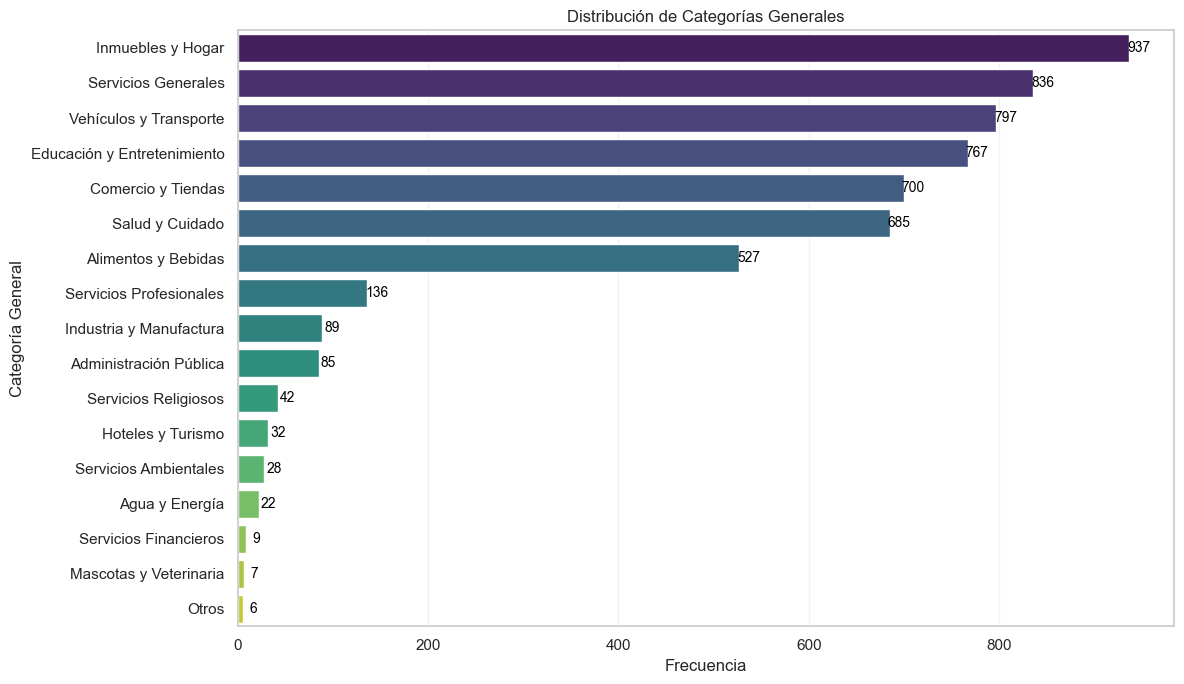

In [34]:
# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Gráfico de barras horizontal para la distribución de las categorías generales
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=categoria_maestra, 
                   y='category_general', 
                   palette='viridis', 
                   order=categoria_maestra['category_general'].value_counts().index)

# Etiquetas de frecuencia encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', 
                (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                ha = 'center', va = 'center', fontsize=10, color='black')

# Título y etiquetas
plt.title('Distribución de Categorías Generales')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría General')

# Color de las líneas de la cuadrícula
ax.grid(True, which='major', axis='x', color='gray', alpha=0.1)  # Color más sutil

plt.tight_layout()
plt.show()


### **Distribución de Categorías Generales en Yelp**

- ##### La categoría **Salud y Cuidado** domina significativamente sobre las demás, con una cantidad muy alta de negocios registrados.
- ##### Otras categorías que destacan en términos de volumen son **Comercio y Tiendas**, **Servicios Generales** y **Alimentos y Bebidas**.
- ##### Las categorías con menor representación incluyen **Agua y Energía**, **Administración Pública** y **Servicios Ambientales**.



##### Este análisis preliminar nos invita a cuestionarnos acerca de las razones detrás de estas diferencias y a considerar si se requiere una validación adicional de la clasificación de negocios o de la distribución de las categorías en Yelp.

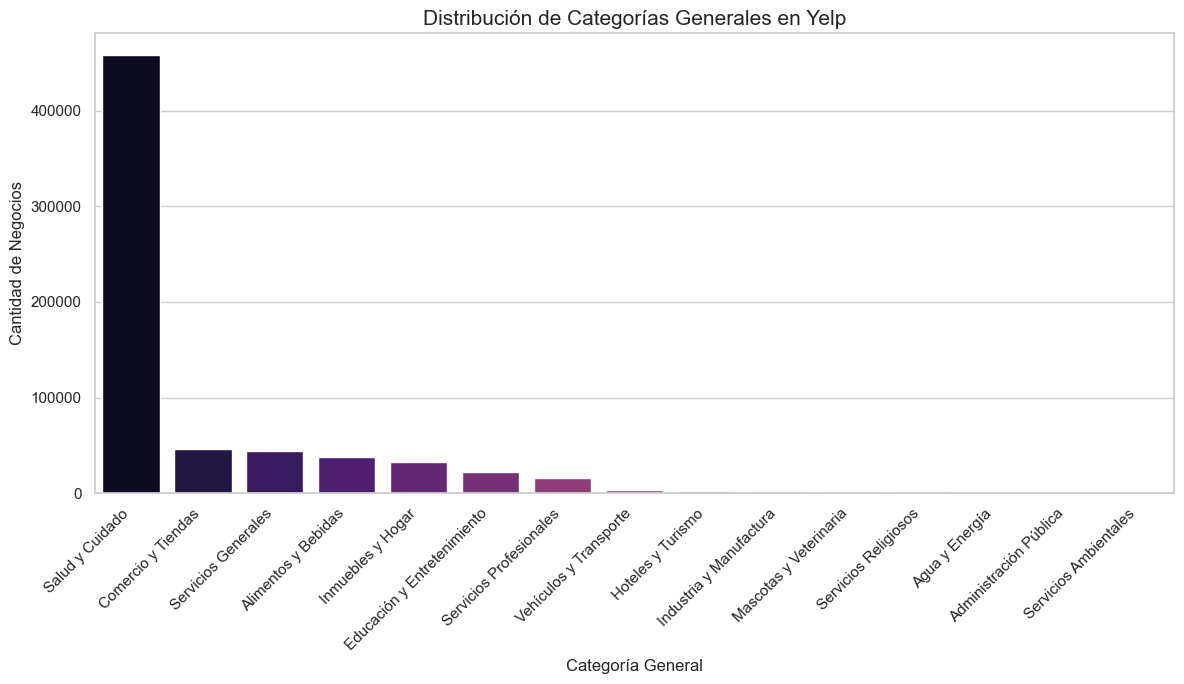

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar los datos por 'category_general' y contar la cantidad de apariciones de cada categoría
yelp_distribution = categorias_de_yelp['category_general'].value_counts()

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x=yelp_distribution.index, y=yelp_distribution.values, palette='magma')
plt.xlabel('Categoría General', fontsize=12)
plt.ylabel('Cantidad de Negocios', fontsize=12)
plt.title('Distribución de Categorías Generales en Yelp', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **Distribución de Categorías Generales en Google**

- ##### **Comercio y Tiendas** A diferencia de Yelp, en Google se observa un dominio significativo de la categoría Comercio y Tiendas con más de 3.5 millones de negocios, lo cual resalta la enorme oferta comercial presente en la plataforma.

- ##### **Educación y Entretenimiento** es otra categoría prominente, lo cual refleja que muchos usuarios buscan y registran actividades relacionadas con el entretenimiento, deportes, centros educativos, entre otros.
- ##### La categoría **Vehículos y Transporte** también tiene una representación significativa, lo cual destaca la cantidad de servicios relacionados al transporte (alquileres, estaciones de servicio, concesionarios, etc.).
- ##### Las categorías relacionadas con **Alimentos y Bebidas, Salud y Cuidado, e Inmuebles y Hogar** tienen una menor proporción en comparación con las principales, pero siguen siendo relevantes para los usuarios de Google Maps.

##### Estas diferencias con respecto a Yelp podrían deberse al tipo de usuarios y la forma en que cada plataforma categoriza y prioriza los negocios. En Google, parece haber una mayor diversidad y amplitud en la cobertura de categorías comerciales y de servicios.

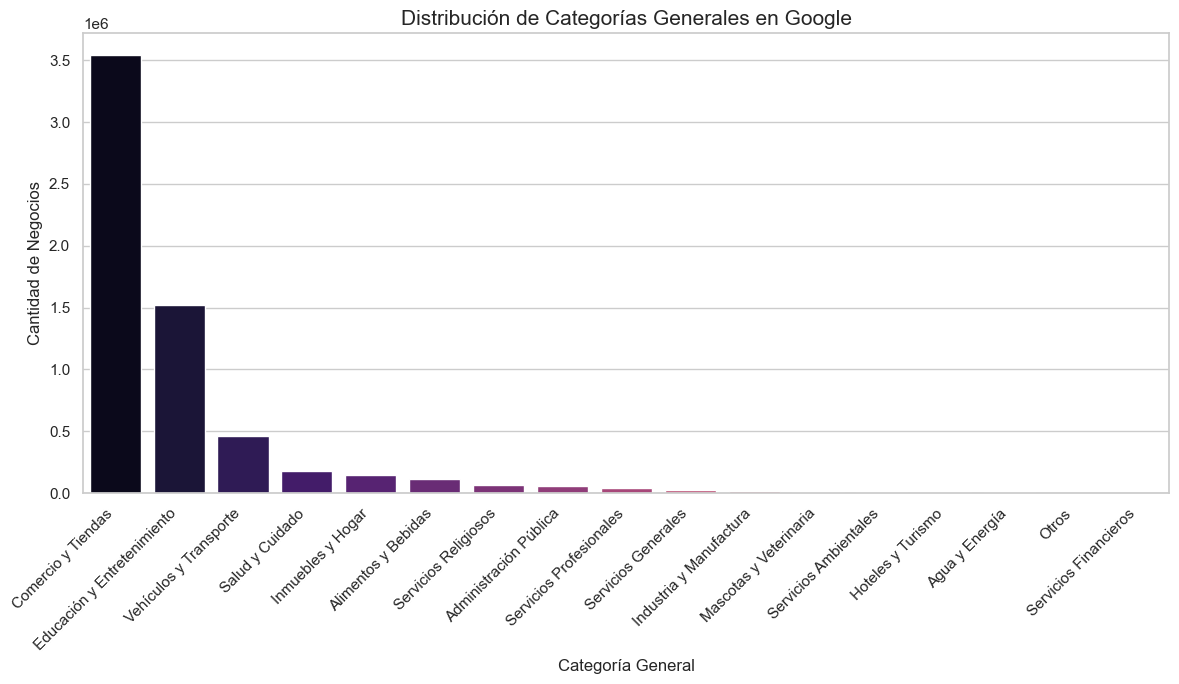

In [52]:
# Agrupar los datos por 'category_general' y contar la cantidad de apariciones de cada categoría
google_distribution = categorias_de_google['category_general'].value_counts()

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 7))
sns.barplot(x=google_distribution.index, y=google_distribution.values, palette='magma')
plt.xlabel('Categoría General', fontsize=12)
plt.ylabel('Cantidad de Negocios', fontsize=12)
plt.title('Distribución de Categorías Generales en Google', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### **Comparación de Alimentos y Bebidas entre Google y Yelp**

- ##### **Proporción:** **Google** tiene el **75.6%** de los negocios de **Alimentos y Bebidas**, mientras que **Yelp** representa el **24.4%.** Esto nos indica que Google tiene una mayor cantidad de negocios de esta categoría en su base de datos, lo cual es esperado debido a su enfoque general y la cobertura amplia de diferentes tipos de negocios.

- ##### **Enfoque de Yelp:** Aunque Yelp tiene una menor cantidad de negocios, su enfoque es más detallado y probablemente cuenta con reseñas más detalladas. Esto nos proporciona una buena oportunidad para combinar la cantidad de Google con la calidad de Yelp en futuras recomendaciones.

#### **Implicaciones para el KPI:**

- ##### La mayor cantidad de datos en Google puede facilitar el análisis para la identificación de tendencias. 
- ##### Por otro lado, el enfoque específico y detallado de Yelp podría ser más útil para evaluar la satisfacción del cliente. 

##### La combinación de ambas fuentes nos permitirá realizar un análisis más profundo y robusto, abarcando tanto la **cantidad** como la **calidad**.

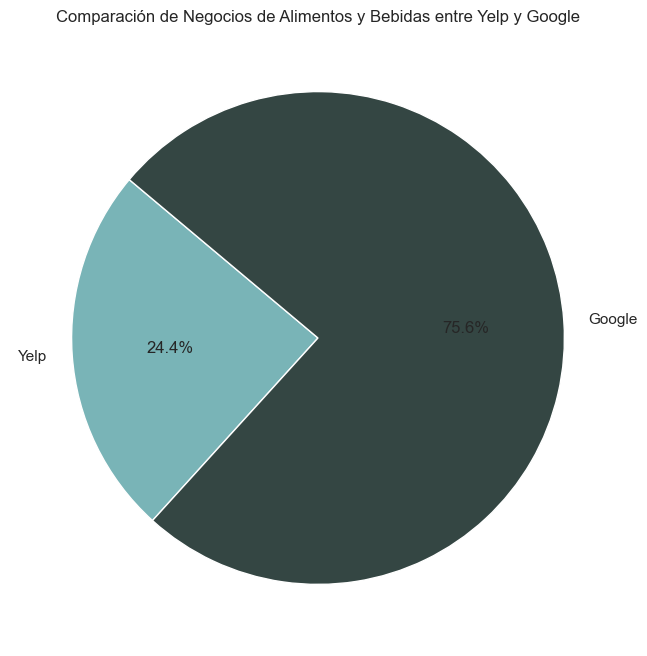

In [71]:
# Filtrar las categorías de Google y Yelp para "Alimentos y Bebidas"
alimentos_y_bebidas_yelp = categorias_de_yelp[categorias_de_yelp['category_general'] == 'Alimentos y Bebidas']
alimentos_y_bebidas_google = categorias_de_google[categorias_de_google['category_general'] == 'Alimentos y Bebidas']

# Obtener la cantidad de negocios en "Alimentos y Bebidas" para cada plataforma
count_yelp = len(alimentos_y_bebidas_yelp)
count_google = len(alimentos_y_bebidas_google)

# Crear los datos y etiquetas para el gráfico
data = [count_yelp, count_google]
labels = ['Yelp', 'Google']

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#79b4b7', '#344643'])
plt.title('Comparación de Negocios de Alimentos y Bebidas entre Yelp y Google')
plt.show()


### **Categorías Google filtradas solo por restaurantes**

In [2]:
import pandas as pd

In [2]:
categorias_google = pd.read_parquet('C:\DYNAMO\PFinal\Proyecto_final\Datos\google\categories_sitios_google_todavia_nombres.parquet')
categorias_google

gmap_id            category
0        0x88f16e41928ff687:0x883dad4fd048e8f8            Pharmacy
1        0x80c2c98c0e3c16fd:0x29ec8a728764fdf9    Textile exporter
2        0x80c2c778e3b73d33:0xbdc58662a4a97d49   Korean restaurant
3         0x80c2c89923b27a41:0x32041559418d447        Fabric store
4        0x80c2c632f933b073:0xc31785961fe826a6        Fabric store
...                                        ...                 ...
3025006  0x89c6c74f43a49b55:0x6be6995921c58b12  Seafood restaurant
3025007  0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc    Chevrolet dealer
3025008  0x89da6b9ce832726f:0xbd0d3630f1e3b42e        Veterinarian
3025009  0x88d9e872a9e39f3d:0x5de29f50507e5d73   Animal feed store
3025010  0x54956b3944b1654d:0x7797cead9a485c22             Lodging

[6228507 rows x 2 columns]

In [3]:
# Conteo de categorías únicas en Google
categorias_google_unicas = categorias_google['category'].nunique()
print(f"Número de categorías únicas en Google: {categorias_google_unicas}")

Número de categorías únicas en Google: 4471


#### **Se extraen las categorías únicas para identificar las relacionadas al área gastronómico**

In [4]:
# Extraer categorías únicas
categorias_unicas = pd.DataFrame(categorias_google['category'].unique(), columns=['category'])

# Guardar en un archivo CSV
categorias_unicas.to_csv('categorias_unicas_google.csv', index=False)


In [5]:
segunda_mitad = categorias_unicas.iloc[2236:]  # Segunda mitad (para ti)

# Guardar la segunda mitad en un nuevo archivo si deseas revisarlo por separado
segunda_mitad.to_csv('segunda_mitad_categorias.csv', index=False)


### **LISTA PARA FILTRAR**

In [6]:
categorias_gastronomicas = [
    "Californian restaurant",
    "Cold noodle restaurant",
    "Dan Dan noodle restaurant",
    "Soba noodle shop",
    "Udon noodle restaurant",
    "Cuban restaurant",
    "Colombian restaurant",
    "Fruit parlor",
    "Coffee vending machine",
    "South Asian restaurant",
    "Taiwanese restaurant",
    "Dog cafe",
    "Brewpub",
    "Tapas bar",
    "Pasta shop",
    "Vegetarian cafe and deli",
    "Pakistani restaurant",
    "Brasserie",
    "Greek restaurant",
    "Sweets and dessert buffet",
    "Mandarin restaurant",
    "Small plates restaurant",
    "Central American restaurant",
    "Ecuadorian restaurant",
    "Culinary school",
    "Beer hall",
    "Wine club",
    "Hot dog stand",
    "Cooking class",
    "Gastropub",
    "Doner kebab restaurant",
    "Gyro restaurant",
    "Shawarma restaurant",
    "Cooking school",
    "Fine dining restaurant",
    "Hoagie restaurant",
    "Nut store",
    "Lebanese restaurant",
    "Neapolitan restaurant",
    "Southern restaurant (US)",
    "Honduran restaurant",
    "Laotian restaurant",
    "Piano bar",
    "Fish & chips restaurant",
    "Contemporary Louisiana restaurant",
    "Traditional American restaurant",
    "Tofu shop",
    "Mexican torta restaurant",
    "Tamale shop",
    "Portuguese restaurant",
    "Dart bar",
    "Live music bar",
    "Confectionery",
    "Coffee wholesaler",
    "Irish restaurant",
    "Irish pub",
    "Coffee stand",
    "Argentinian restaurant",
    "Authentic Japanese restaurant",
    "Food and beverage consultant",
    "Pancake restaurant",
    "Jewish restaurant",
    "Teppanyaki restaurant",
    "Cantonese restaurant",
    "Charcuterie",
     "Korean barbecue restaurant",
    "Wholesale food store",
    "Dim sum restaurant",
    "Raw food restaurant",
    "Cider bar",
    "Yakiniku restaurant",
    "Liquor wholesaler",
    "Moroccan restaurant",
    "Japanese steakhouse",
    "Belgian restaurant",
    "Down home cooking restaurant",
    "Falafel restaurant",
    "Hawaiian restaurant",
    "Scandinavian restaurant",
    "Dance restaurant",
    "Mongolian barbecue restaurant",
    "Persian restaurant",
    "Food and beverage exporter",
    "Southern Italian restaurant",
    "Dairy store",
    "Sake brewery",
    "Barbecue area",
    "Modern Indian restaurant",
    "Norwegian restaurant",
    "Traditional restaurant",
    "Night market",
    "Polish restaurant",
    "Beverages",
    "Hong Kong style fast food restaurant",
    "Canadian restaurant",
    "Haitian restaurant",
    "Swedish restaurant",
    "Japanese curry restaurant",
    "Eastern European restaurant",
    "Russian restaurant",
    "Ukrainian restaurant",
    "Northern Italian restaurant",
    "Oyster supplier",
    "Shabu-shabu restaurant",
    "Chinese tea house",
    "Meat dish restaurant",
    "Chophouse restaurant",
    "Western restaurant",
    "Wok restaurant",
    "Conveyor belt sushi restaurant",
    "Pueblan restaurant",
    "Pozole restaurant",
    "Nepalese restaurant",
    "South American restaurant",
    "Seafood donburi restaurant",
    "Cape Verdean restaurant",
    "Cake decorating equipment shop",
    "Continental restaurant",
    "Fish and chips takeaway",
    "Brazilian pastelaria",
    "Biryani restaurant",
    "Country food restaurant",
    "Sundae restaurant",
    "North Eastern Indian restaurant",
    "Po’ boys restaurant",
    "Spices wholesalers",
    "Fondue restaurant",
    "Indian sweets shop",
    "Tonkatsu restaurant",
    "Non vegetarian restaurant",
    "Berry restaurant",
    "Cider mill",
    "Venezuelan restaurant",
    "Ethnic restaurant",
    "Wine",
    "Salsa bar",
    "Seafood",
    "Bangladeshi restaurant",
    "Sichuan restaurant",
    "Dry fruit store",
    "Coffee",
    "Cambodian restaurant",
    "Sweets",
    "Childrens party buffet",
    "Chocolate cafe",
    "Izakaya restaurant",
    "Sukiyaki and Shabu Shabu restaurant",
    "Indian Muslim restaurant",
    "Pacific Northwest restaurant (US)",
    "Patisserie",
    "British restaurant",
    "Churreria",
    "Armenian restaurant",
    "Kebab shop",
    "Uzbeki restaurant",
    "Egyptian restaurant",
    "Georgian restaurant",
    "French steakhouse restaurant",
    "Haute French restaurant",
    "Pan-Latin restaurant",
    "Nicaraguan restaurant",
    "Mid-Atlantic restaurant (US)",
    "Israeli restaurant",
    "Tea exporter",
    "Japanese grocery store",
    "Modern European restaurant",
    "Romanian restaurant",
    "Takoyaki restaurant",
    "Afghani restaurant",
    "Tea and coffee merchant",
    "Chinese food",
    "Greengrocer",
    "Fish and seafood restaurant",
    "Yucatan restaurant",
    "Chinese supermarket",
    "Fish spa",
    "Japanese sweets restaurant",
    "Punjabi restaurant",
    "Japanese delicatessen",
    "Anago restaurant",
    "Dried seafood store",
    "Shanghainese restaurant",
    "Polynesian restaurant",
    "Basque restaurant",
    "Self service restaurant",
    "Modern izakaya restaurants",
    "Tiki bar",
    "Eritrean restaurant",
    "Australian restaurant",
    "Cured ham bar",
    "Seafood farm",
    "Yemenite restaurant",
    "Burmese restaurant",
    "Rice shop",
    "Chilean restaurant",
    "Katsudon restaurant",
    "Tempura donburi restaurant",
    "Sri Lankan restaurant",
    "North African restaurant",
    "South African restaurant",
    "Czech restaurant",
    "Hungarian restaurant",
    "Seafood store",
    "Eatery",
    "Steamed bun shop",
    "Japanese regional restaurant",
    "Modern British restaurant",
    "Tofu restaurant",
    "Cold cut store",
    "Danish restaurant",
    "Beverage supplier",
    "Pacific Rim restaurant",
    "Tempura restaurant",
    "Bulgarian restaurant",
    "Pennsylvania Dutch restaurant",
    "Tibetan restaurant",
    "Childrens cafe",
    "New England restaurant",
    "Animal watering hole",
    "Bar tabac",
    "Pizza",
    "Dutch restaurant",
    "English restaurant",
    "Croatian restaurant",
    "Serbian restaurant",
    "Staple food package",
    "Thermal baths",
    "Kaiseki restaurant",
    "Syrian restaurant",
    "Chinese bakery",
    "Roman restaurant",
    "Austrian restaurant",
    "Swiss restaurant",
    "Ice cream and drink shop",
    "Indian sizzler restaurant",
    "Fujian restaurant",
    "Kyoto style Japanese restaurant",
    "Japanese confectionery shop",
    "Rice wholesaler",
    "Turkmen restaurant",
    "Rice cake shop",
    "Cured ham store",
    "Sicilian restaurant",
    "Western food",
    "Oaxacan restaurant",
    "Native American restaurant",
    "Korean beef restaurant",
    "Uruguayan restaurant",
    "Anhui restaurant",
    "Porridge restaurant",
    "Tortilla shop",
    "Shandong restaurant",
    "Madrilian restaurant",
    "Tuscan restaurant",
    "Costa Rican restaurant",
    "Hawker stall",
    "Macrobiotic restaurant",
    "Obanzai restaurant",
    "Indian food",
    "Tunisian restaurant",
    "Japanese cheap sweets shop",
    "Yakitori restaurant",
    "Icelandic restaurant",
    "Kushiyaki restaurant",
    "Yakisoba Restaurant",
    "Food and beverage distributors",
    "Champon noodle restaurant",
    "Korean rib restaurant",
    "Bodega",
    "Carvery",
    "South Indian restaurant",
    "Floridian restaurant",
    "Kazakhstani restaurant",
    "Jiangsu restaurant",
    "Valencian restaurant",
    "Sukiyaki restaurant",
    "Catalonian restaurant",
    "Scottish restaurant",
    "Provence restaurant",
    "Paraguayan restaurant",
    "Syokudo and Teishoku restaurant",
    "Pizza takeaway",
    "Takeout restaurant",
    "Satay restaurant",
    "Meal delivery",
    "Angler fish restaurant",
    "Chettinad restaurant",
    "Sfiha restaurant",
    "Fast food pizza",
    "American grocery store",
    "Shochu brewery",
    "Mutton barbecue restaurant",
    "Rice cracker shop",
    "Chesapeake restaurant",
    "Steamboat restaurant",
    "Hakka restaurant",
    "Japanized western restaurant",
    "Sundanese restaurant",
    "Tavern",
    "Soondae restaurant",
    "Fugu restaurant",
    "Momo restaurant",
    "Traditional teahouse",
    "Frituur",
    "Kerala restaurant",
    "Raclette restaurant",
    "Lithuanian restaurant",
    "Tongue restaurant",
    "Unagi restaurant",
    "Cosplay cafe",
    "Goan restaurant",
    "Couscous restaurant",
    "New Zealand restaurant",
    "Offal barbecue restaurant",
    "Asturian restaurant",
    "Food court",
    "Liquor store",
    "Cocktail bar",
    "Banquet hall",
    "Caterer",
    "Fast food restaurant",
    "Family restaurant",
    "Seafood restaurant",
    "Deli",
    "Dominican restaurant",
    "Taco restaurant",
    "Bar & grill",
    "Mexican restaurant",
    "Restaurant or cafe",
    "Food service",
    "Dessert shop",
    "Ice cream shop",
    "Breakfast restaurant",
    "Lunch restaurant"
    "Wine store",
    "Beer store",
    "Fried chicken takeaway",
    "Asian restaurant",
    "Hot pot restaurant",
    "Chinese restaurant",
    "Mediterranean restaurant",
    "Bagel shop",
    "Donut shop",
    "Takeout Restaurant",
    "Pizza Takeout",
    "Sports bar"
    "Italian restaurant",
    "Wine bar",
    "Ramen restaurant",
    "Bubble tea store",
    "Cafe",
    "American restaurant",
    "Modern French restaurant",
    "Flower delivery",
    "Seafood market",
    "Pizza restaurant",
    "Food products supplier",
    "Beer distributor",
    "Juice shop",
    "Health food store",
    "Vegetarian restaurant",
    "Delivery Restaurant"
    "Coffee roasters",
    "Sushi restaurant",
    "Japanese restaurant",
    "Creole restaurant",
    "Caribbean restaurant",
    "Barbecue restaurant",
    "Chocolate shop",
    "Coffee store",
    "Snack bar",
    "Soft drinks shop",
    "Pretzel store",
    "Hamburger restaurant",
    "Sandwich shop",
    "Soul food restaurant",
    "Burrito restaurant",
    "Gay bar",
    "Gay night club",
    "Latin American restaurant",
    "Spanish restaurant"
    "Fresh food market",
    "Supermarket",
    "Candy store",
    "Cheesesteak restaurant",
    "Jamaican restaurant",
    "Indian restaurant",
    "Cafeteria",
    "Ham shop",
    "Pub",
    "Vegan restaurant",
    "Bistro",
    "Kosher restaurant",
    "Chicken restaurant",
    "Southwestern restaurant (US)",
    "Wedding bakery",
    "Frozen yogurt shop",
    "Frozen dessert supplier",
    "Açaí shop",
    "Salad shop",
    "Soup kitchen",
    "Frozen food store",
    "Thai restaurant",
    "Asian fusion restaurant",
    "Chinese noodle restaurant",
    "Dumpling restaurant",
    "Soup restaurant",
    "Espresso bar",
    "Guatemalan restaurant",
    "Peruvian restaurant",
    "Organic food store",
    "Grill",
    "Fusion restaurant",
    "Middle Eastern restaurant",
    "Turkish restaurant"
    "Mexican goods store",
    "Tea store",
    "Vietnamese restaurant",
    "Crab house",
    "Seafood wholesaler",
    "Lounge",
    "New American restaurant",
    "Cake shop",
    "Rice restaurant",
    "Chicken wings restaurant",
    "Hookah bar",
    "Hot dog restaurant",
    "Vineyard",
    "Tea house",
    "Ethiopian restaurant",
    "Gluten-free restaurant",
    "Italian grocery store",
    "Food and drink",
    "Spiritist center",
    "Food",
    "Fish processing"
    "Karaoke bar",
    "Dessert restaurant",
    "Dinner theater",
    "Catering",
    "Food delivery",
    "Southeast Asian restaurant",
    "Food producer",
    "Brazilian restaurant",
    "Indonesian restaurant",
    "Restaurant supply store",
    "BBQ area",
    "Mobile caterer",
    "Food bank",
    "Cupcake shop",
    "Kosher grocery store",
    "Pastry shop",
    "Steak house",
    "Catering food and drink supplier",
    "Cajun restaurant",
    "Shared-use commercial kitchen"
    "French restaurant",
    "Crêperie",
    "Mexican grocery store",
    "Chicken shop",
    "Sushi takeaway",
    "Pho restaurant",
    "Spice store",
    "Gourmet grocery store",
    "Filipino restaurant",
    "Cookie shop",
    "Tapas restaurant",
    "Indian takeaway",
    "Tex-Mex restaurant",
    "Noodle shop",
    "African restaurant",
    "West African restaurant",
    "Cheese shop",
    "Brunch restaurant",
    "Organic restaurant"
    "Eclectic restaurant",
    "Pie shop",
    "German restaurant",
    "European restaurant",
    "Food store",
    "Chocolate factory",
    "Box lunch supplier",
    "Wedding buffet",
    "Butcher shop deli",
    "Beer garden",
    "Singaporean restaurant",
    "Wholesale bakery",
    "Hunan restaurant",
    "Chinese takeaway",
    "Delivery Chinese restaurant",
    "Pan-Asian restaurant",
    "Salvadoran restaurant",
    "Popcorn store",
    "Halal restaurant",
    "Oyster bar restaurant",
    "Nuevo Latino restaurant",
    "Puerto Rican restaurant",
    "East African restaurant",
    "Soup shop",
    "Art cafe",
    "Food broker",
    "Poke bar",
    "Wine wholesaler and importer",
]


In [11]:
# Filtrar las filas que tengan categorías gastronómicas
dataset_gastronomico = categorias_google[categorias_google['category'].isin(categorias_gastronomicas)]

In [12]:
dataset_gastronomico

gmap_id                category
121      0x7954d376a8b12db3:0xa51dd57e1cc14ca9              Food court
125      0x880e5523024703c1:0xb93a8ccb6918d616            Liquor store
126      0x80c8be4e73e8263f:0x3edb275a351e6266            Cocktail bar
142      0x88f3fb847f6a4833:0x91a0e1ef28d778ed            Banquet hall
142      0x88f3fb847f6a4833:0x91a0e1ef28d778ed                 Caterer
...                                        ...                     ...
3024992  0x89c6b993431d9a19:0xea378de3c317996e             Bar & grill
3025005    0x89da6b8177ee49d5:0xbc9dfc53722fe1             Bar & grill
3025006  0x89c6c74f43a49b55:0x6be6995921c58b12             Steak house
3025006  0x89c6c74f43a49b55:0x6be6995921c58b12  Fine dining restaurant
3025006  0x89c6c74f43a49b55:0x6be6995921c58b12      Seafood restaurant

[508929 rows x 2 columns]

In [13]:
# Guardar el dataset filtrado si es necesario
dataset_gastronomico.to_parquet('dataset_gastronomico_google.parquet')

In [5]:
orginal = pd.read_parquet('C:\DYNAMO\PFinal\Proyecto_final\Datos\google\google_sitios.parquet')

In [10]:
orginal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998428 entries, 0 to 3025010
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   name            object 
 1   address         object 
 2   gmap_id         object 
 3   description     object 
 4   latitude        float64
 5   longitude       float64
 6   avg_rating      float64
 7   num_of_reviews  int64  
 8   price           object 
 9   state           object 
 10  url             object 
 11  monday          object 
 12  tuesday         object 
 13  wednesday       object 
 14  thursday        object 
 15  friday          object 
 16  saturday        object 
 17  sunday          object 
dtypes: float64(3), int64(1), object(14)
memory usage: 434.6+ MB


In [ ]:
categoria_ulta_final = pd.read_parquet('C:/DYNAMO/PFinal/Proyecto_final/notebooks/EDA/dataset_gastronomico_google.parquet')

In [ ]:
categoria_ulta_final['category'].nunique()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'